In [ ]:
# Import google_streetview for the api module
import google_streetview.api

In [ ]:
import geopandas as gpd
from sys import platform

# Import county shape files
if platform == "win32":
    file_paths = {'TX' : "C:\\DataAnalyticsProjects\\UrbanDecay\\\Texas_City_Boundaries_Detailed"}
elif platform == "darwin":
    file_paths = {'TX' : '/Users/yao-chiyu/UrbanDecay/Texas_City_Boundaries_Detailed'}

# Defining geospatial dictionary for TX
g_frames = {}
states = ['TX']
for state in states:
    g_frames[state] = gpd.read_file(file_paths[state])

# Standardize column names for county
g_frames['TX']['city_name'] = g_frames['TX']['CITY_NM']

# making County Names Upper Case
for state in states:
    g_frames[state]['city_name'] = g_frames[state]['city_name'].str.upper()

In [ ]:
g_frames['TX']

,OBJECTID,GID,CITY_NM,TXDOT_CITY,CITY_FIPS,CNTY_SEAT_,POP1990,POP2000,POP2010,POP2020,POP_CD,MAP_COLOR_,COLOR_CD,SHAPE_Leng,SHAPE_Area,geometry,city_name
0,1,21,Spur,40550,4869848,N,1300.0,1088.0,1318.0,1167,1,1,1,0.218973,0.000397,"POLYGON ((-100.86058 33.44251, -100.86089 33.4...",SPUR
1,2,22,Runge,37050,4863788,N,1139.0,1080.0,1031.0,1166,1,1,1,0.081795,0.000293,"POLYGON ((-97.71744 28.87118, -97.72271 28.887...",RUNGE
2,3,23,Lometa,25150,4843516,N,625.0,782.0,856.0,874,1,1,1,0.114231,0.000221,"POLYGON ((-98.39270 31.20650, -98.39270 31.206...",LOMETA
3,4,24,Eden,12800,4822552,N,1567.0,2561.0,2766.0,1339,1,1,1,0.116755,0.000555,"POLYGON ((-99.82527 31.20487, -99.84261 31.204...",EDEN
4,5,25,Leona,24330,4842340,N,178.0,181.0,175.0,179,1,1,1,0.131349,0.000465,"POLYGON ((-95.99846 31.14166, -96.00018 31.144...",LEONA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,1219,835,Rule,37000,4863752,N,783.0,698.0,636.0,611,1,1,1,0.083594,0.000184,"POLYGON ((-99.89072 33.17347, -99.89450 33.173...",RULE
1219,1220,836,Jayton,20950,4837468,Y,608.0,513.0,534.0,517,1,1,1,0.095101,0.000438,"POLYGON ((-100.56572 33.23354, -100.57161 33.2...",JAYTON
1220,1221,837,Carthage,7450,4813108,Y,6496.0,6664.0,6779.0,6354,2,1,1,0.243740,0.002683,"POLYGON ((-94.33252 32.17878, -94.33065 32.173...",CARTHAGE
1221,1222,838,O'Brien,30720,4853304,N,152.0,132.0,106.0,103,1,1,1,0.044503,0.000125,"POLYGON ((-99.84865 33.37393, -99.84837 33.387...",O'BRIEN


In [ ]:
# import Police District of the Arlington TX area
# file_paths = {'ARLINGTON' : "C:\\DataAnalyticsProjects\\UrbanDecay\\APD_districts"}
file_paths = {'ARLINGTON' : "C:\\DataAnalyticsProjects\\UrbanDecay\\Arlington_Police_Districts"}
# Defining geospatial dictionary for TX
cd_frames = {}
cities = ['ARLINGTON']
for city in cities:
    cd_frames[city] = gpd.read_file(file_paths[city])

print(cd_frames)

{'ARLINGTON':   PoliceDist                                           geometry
0       West  POLYGON ((2385200.775 6962038.450, 2385507.382...
1       East  POLYGON ((2410425.434 6956028.415, 2410457.814...
2      South  POLYGON ((2411004.321 6934463.644, 2411023.060...
3      North  POLYGON ((2411097.665 6983113.347, 2411474.490...}


<Axes: >

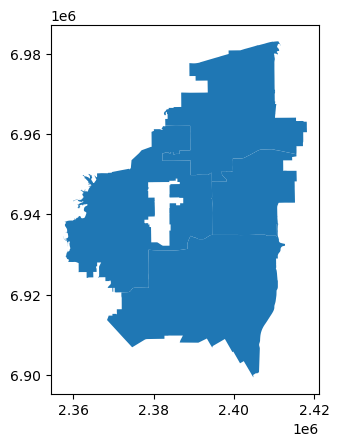

In [ ]:
cd_frames['ARLINGTON'].plot()

In [ ]:
import numpy as np

# assign string
s = 'ARLINGTON'

# check if string is present in list
res = np.any([s in i for i in g_frames[state]['city_name']])

if res:
    print(f'{s} is present in the list')

    # index
    ind = g_frames[state]['city_name'].index[g_frames[state]['city_name'].eq(s)]
    print(ind)
else:
    print(f'{s} is not present in the list')


ARLINGTON is present in the list
Index([727], dtype='int64')


In [ ]:
g_frames[state]['city_name'][ind]

727    ARLINGTON
Name: city_name, dtype: object

In [ ]:
print(g_frames[state].loc[ind])

     OBJECTID  GID    CITY_NM  TXDOT_CITY CITY_FIPS CNTY_SEAT_   POP1990  \
727       728  716  Arlington        1750   4804000          N  261721.0   

      POP2000   POP2010  POP2020 POP_CD  MAP_COLOR_  COLOR_CD  SHAPE_Leng  \
727  332969.0  365438.0   398864      4           5         5    1.232054   

     SHAPE_Area                                           geometry  city_name  
727    0.024733  POLYGON ((-97.05815 32.81536, -97.05700 32.813...  ARLINGTON  


In [ ]:
polygon = cd_frames[city].loc[3]['geometry']

In [ ]:
print(polygon)

# projection change: feet to degree
# Google API
# differentiate interstates/highways/street:

POLYGON ((2411097.6653025895 6983113.347221792, 2411474.490004316 6982477.21726048, 2411734.4413279593 6982020.856893644, 2411716.7278864235 6982033.315123096, 2411707.6940313578 6982036.8231218755, 2411699.15240635 6982041.148283571, 2411691.3589574695 6982045.668044195, 2411683.567639455 6982049.96910046, 2411674.777816996 6982054.104385033, 2411665.7382957637 6982058.206072152, 2411656.15298225 6982067.115211025, 2411649.579163611 6982074.834224865, 2411642.770562291 6982080.9572684765, 2411635.4541368335 6982087.88795875, 2411629.624716878 6982096.207828388, 2411623.062182158 6982102.739417136, 2411614.7081217915 6982113.629159674, 2411608.0525069535 6982129.941520467, 2411603.7247180045 6982138.088257238, 2411596.3381676823 6982152.393535927, 2411589.516151592 6982159.922708973, 2411581.662021458 6982170.81724596, 2411573.796316847 6982182.930396199, 2411567.224290088 6982190.461990684, 2411558.6050337553 6982202.943005875, 2411555.26591821 6982212.286611378, 2411553.630962804 698

In [ ]:
# To transform the projection to lat/lon
import pyproj
from shapely.geometry import Polygon

# # Define the projection using the WKT string (City Council District)
# wkt_string = """
# PROJCS["NAD_1983_StatePlane_Texas_North_Central_FIPS_4202_Feet",
# GEOGCS["GCS_North_American_1983",
# DATUM["D_North_American_1983",
# SPHEROID["GRS_1980",6378137.0,298.257222101]],
# PRIMEM["Greenwich",0.0],
# UNIT["Degree",0.0174532925199433]],
# PROJECTION["Lambert_Conformal_Conic"],
# PARAMETER["False_Easting",1968500.0],
# PARAMETER["False_Northing",6561666.667],
# PARAMETER["Central_Meridian",-98.5],
# PARAMETER["Standard_Parallel_1",33.9666666666667],
# PARAMETER["Standard_Parallel_2",32.1333333333333],
# PARAMETER["Latitude_Of_Origin",31.6666666666667],
# UNIT["US survey foot",0.304800609601219]]
# """

# Define the projection using the WKT string (Police District)
wkt_string = """
PROJCS["NAD_1983_StatePlane_Texas_North_Central_FIPS_4202_Feet",
GEOGCS["GCS_North_American_1983",
DATUM["D_North_American_1983",
SPHEROID["GRS_1980",6378137.0,298.257222101]],
PRIMEM["Greenwich",0.0],
UNIT["Degree",0.0174532925199433]],
PROJECTION["Lambert_Conformal_Conic"],
PARAMETER["False_Easting",1968500.0],
PARAMETER["False_Northing",6561666.666666666],
PARAMETER["Central_Meridian",-98.5],
PARAMETER["Standard_Parallel_1",32.13333333333333],
PARAMETER["Standard_Parallel_2",33.96666666666667],
PARAMETER["Latitude_Of_Origin",31.66666666666667],
UNIT["Foot_US",0.3048006096012192]]
"""

# Create pyproj CRS objects
projected_crs = pyproj.CRS(wkt_string)
geographic_crs = pyproj.CRS("EPSG:4269")  # NAD83

# Define a transformer to convert from the projected CRS to the geographic CRS
transformer = pyproj.Transformer.from_crs(projected_crs, geographic_crs, always_xy=True)

def transform_to_latlon(coord):
    x, y = coord
    lat, lon = transformer.transform(x, y)
    return lat, lon

def transform_shapely_polygon(polygon):
    # Transform the exterior coordinates
    transformed_exterior = [transform_to_latlon(coord) for coord in polygon.exterior.coords]

    # Transform the interior coordinates (if any)
    transformed_interiors = []
    for interior in polygon.interiors:
        transformed_interior = [transform_to_latlon(coord) for coord in interior.coords]
        transformed_interiors.append(transformed_interior)

    return Polygon(transformed_exterior, transformed_interiors)

transformed_polygon = transform_shapely_polygon(polygon)

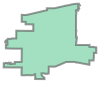

In [ ]:
transformed_polygon

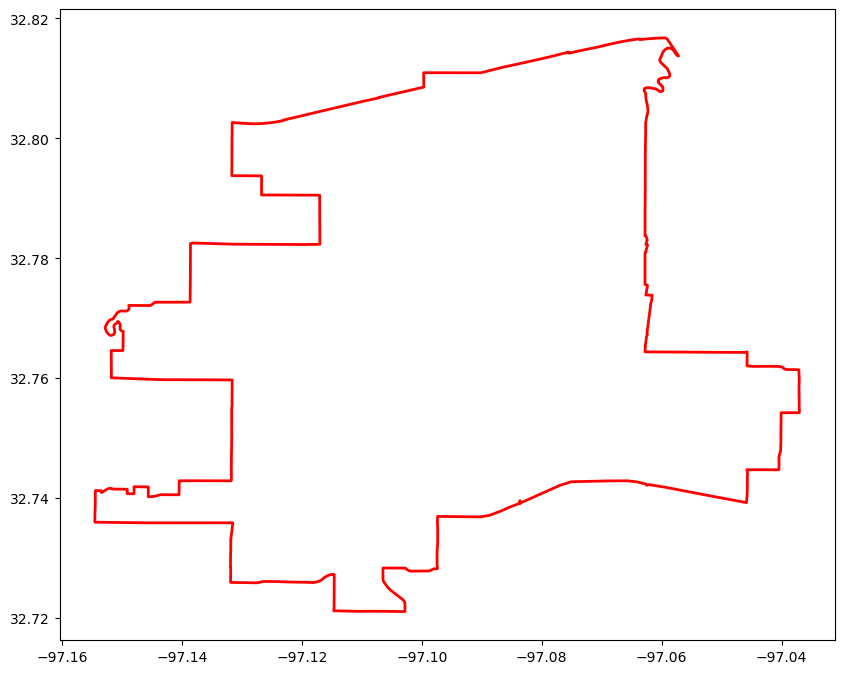

In [ ]:
import matplotlib.pyplot as plt

# Corrected plotting for the polygon
# If visualize the roads within the polygon
fig, ax = plt.subplots(figsize=(10, 10))
gpd.GeoSeries([transformed_polygon]).boundary.plot(ax=ax, color='red', linewidth=2)
plt.show()

In [ ]:
len(cd_frames[city])

4

In [ ]:
g_frames[state].loc[ind]['geometry'].values

<GeometryArray>
[<POLYGON ((-97.058 32.815, -97.057 32.814, -97.057 32.813, -97.057 32.813, -...>]
Length: 1, dtype: geometry

residential: Roads that primarily provide access to housing.

unclassified: The least important through roads in a country's system.

tertiary: Roads that are more important than residential/unclassified but less important than secondary roads.

service: Access roads, alleys, agricultural tracks, and other services roads.

living_street: Residential streets where pedestrians have legal priority over cars, speeds are kept very low, and where children can play legally in the street.

pedestrian: Roads mainly/exclusively for pedestrians.

'drive' - get drivable public streets (but not service roads)

'drive_service' - get drivable streets, including service roads

'walk' - get all streets and paths that pedestrians can use (this network type ignores one-way directionality)

'bike' - get all streets and paths that cyclists can use

'all' - download all non-private OSM streets and paths (this is the default network type unless you specify a different one)

'all_private' - download all OSM streets and paths, including private-access ones

In [ ]:
f'["highway"~"{ "|".join(["residential", "unclassified", "tertiary", "service", "living_street", "pedestrian", "drive_service", "drive", "all"]) }"]'

'["highway"~"residential|unclassified|tertiary|service|living_street|pedestrian|drive_service|drive|all"]'

["highway"~"primary|secondary|tertiary|unclassified|residential|living_street|pedestrian"]["service"!~"parking_aisle|emergency_access|driveway"]


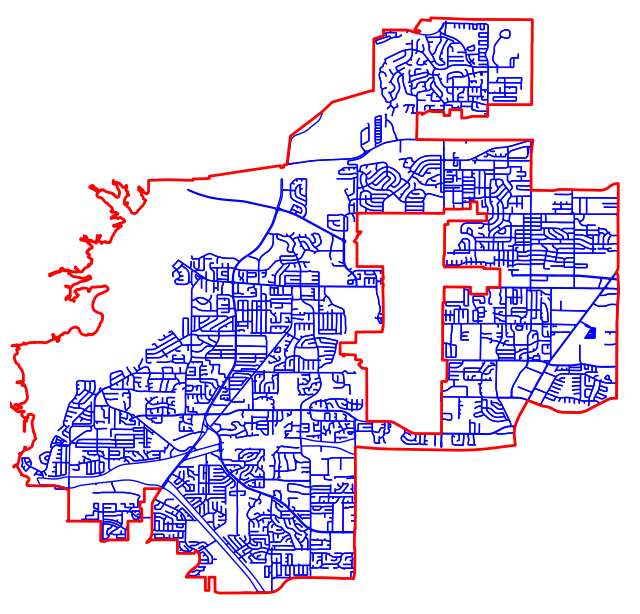

In [ ]:
import osmnx as ox
from collections import OrderedDict

def fetch_roads_in_polygon(polygon_coords,visualization=False):
    """
    Fetches all roads and streets within a given polygon using OSM data.

    Parameters:
    - polygon (list): List of (lat, lon) tuples defining the polygon.

    Returns:
    - list: List of roads and streets within the polygon.
    """

    # Create a GeoDataFrame from the polygon
    polygon = Polygon(polygon_coords)
    gdf_polygon = gpd.GeoDataFrame({'geometry': [polygon]})

    # https://wiki.openstreetmap.org/wiki/Map_features#Highway

#     # Define the road types we're interested in (excluding highways)
#     road_types = ["primary", "secondary", "tertiary", "unclassified", "residential",
#                  "primary_link", "secondary_link", "tertiary_link", "living_street", "pedestrian", "road"]
    road_types = ["primary", "secondary", "tertiary", "unclassified",
                  "residential", "living_street", "pedestrian"]
#     road_types = ["primary", "tertiary", "unclassified", "residential", "living_street", "pedestrian", "road"]
    # Exclude service roads that are specifically for parking lots/emergency access
    exclude_parking_lots = '["service"!~"parking_aisle|emergency_access|driveway"]'

    # Combine the filters
    custom_filter = f'["highway"~"{ "|".join(road_types) }"]{exclude_parking_lots}'
    print(custom_filter)

    # Download and project a street network with the specified road types
    graph = ox.graph_from_polygon(polygon, network_type='all', custom_filter=custom_filter)

    ###################################################
    # Extract road names and coordinates
    roads_info = {}
    for u, v, data in graph.edges(data=True):
        if 'name' in data:
            road_name = data['name']
            if isinstance(road_name, list):  # Handle roads with multiple names
                road_name = ', '.join(road_name)

            # Initialize the road in roads_info with an ordered dict if it doesn't exist
            if road_name not in roads_info:
                roads_info[road_name] = []

            # Extracting the coordinates of the road's geometry
            if 'geometry' in data:
                coords = [(lat, lon) for lon, lat in data['geometry'].coords]
            else:
                # If no explicit geometry, create a line from source to target node
                coords = [(graph.nodes[u]['y'], graph.nodes[u]['x']),
                          (graph.nodes[v]['y'], graph.nodes[v]['x'])]

            # Add new coordinates to the road's info
            for coord in coords:
                if coord not in roads_info[road_name]:
                    roads_info[road_name].append(coord)

    # Sort and eliminate close duplicates for each road
    for road_name in roads_info:
        # Sort the coordinates - either by latitude or longitude based on the road's orientation
        # Here we choose latitude for simplicity
        sorted_coords = sorted(roads_info[road_name], key=lambda x: x[0])

        # Optional: Implement a method to eliminate close duplicates if necessary
        roads_info[road_name] = sorted_coords

    # Convert the ordered dicts back to lists
    for road_name, ordered_coords in roads_info.items():
        roads_info[road_name] = list(ordered_coords)

    ###################################################


    if visualization:
        # Visualize
        fig, ax = ox.plot_graph(graph, bgcolor='white', edge_color='blue', node_size=0, show=False, close=False)
        gdf_polygon.boundary.plot(ax=ax, color='red', linewidth=2)  # Plot the polygon boundary in red
        plt.show()

        # Set axis limits to slightly beyond the extent of the polygon to ensure no cutoffs
        margin = 0.01  # Adjust as needed
        exterior_coords = [(lat, lon) for lon, lat in polygon.exterior.coords]
        ax.set_xlim([min(lon for lat, lon in exterior_coords) - margin, max(lon for lat, lon in exterior_coords) + margin])
        ax.set_ylim([min(lat for lat, lon in exterior_coords) - margin, max(lat for lat, lon in exterior_coords) + margin])

    return roads_info  # Remove duplicates

# Create a dictionary of roads and coordinates: North-west side
polygon = cd_frames[city].loc[0]['geometry']
transformed_polygon = transform_shapely_polygon(polygon)
roads_gdf = fetch_roads_in_polygon(transformed_polygon,visualization=True)


In [ ]:
len(roads_gdf)

1578

["highway"~"primary|secondary|tertiary|unclassified|residential|living_street|pedestrian"]["service"!~"parking_aisle|emergency_access|driveway"]


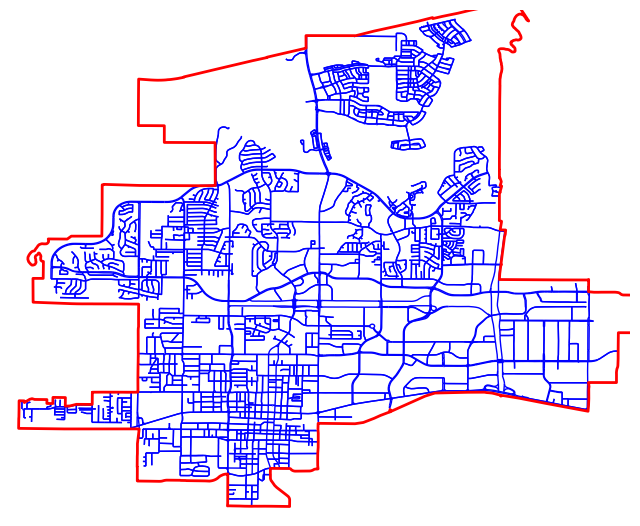

In [ ]:
# Create a dictionary of roads and coordinates: North-west side
polygon = cd_frames[city].loc[3]['geometry']
transformed_polygon = transform_shapely_polygon(polygon)
roads_gdf = fetch_roads_in_polygon(transformed_polygon,visualization=True)


In [ ]:
len(roads_gdf)

951

["highway"~"primary|secondary|tertiary|unclassified|residential|living_street|pedestrian"]["service"!~"parking_aisle|emergency_access|driveway"]


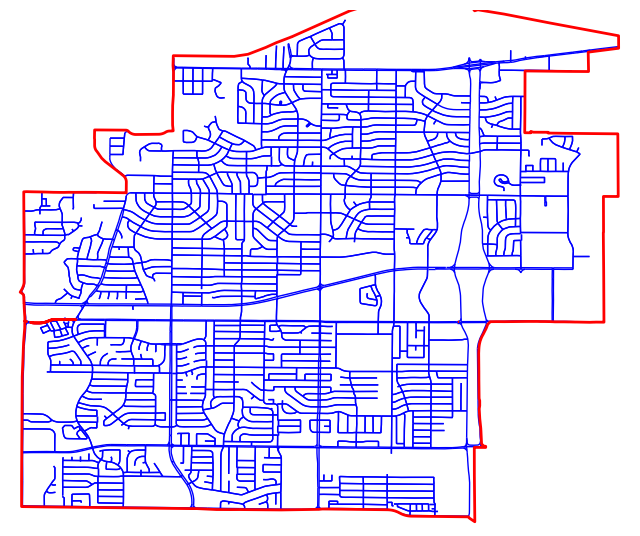

In [ ]:
# Create a dictionary of roads and coordinates: North-west side
polygon = cd_frames[city].loc[1]['geometry']
transformed_polygon = transform_shapely_polygon(polygon)
roads_gdf = fetch_roads_in_polygon(transformed_polygon,visualization=True)


In [ ]:
len(roads_gdf)

563

["highway"~"primary|secondary|tertiary|unclassified|residential|living_street|pedestrian"]["service"!~"parking_aisle|emergency_access|driveway"]


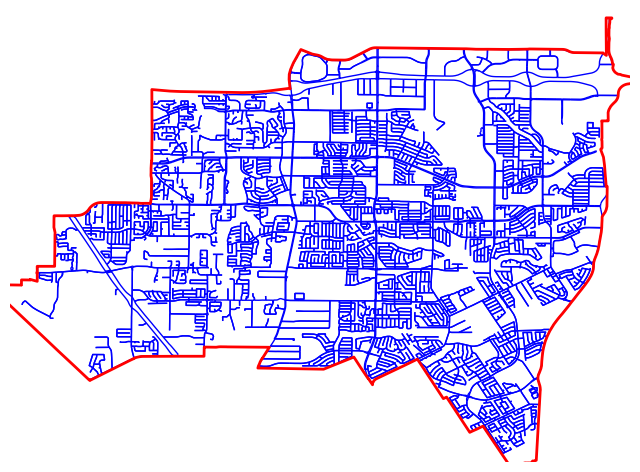

In [ ]:
# Create a dictionary of roads and coordinates: North-west side
polygon = cd_frames[city].loc[2]['geometry']
transformed_polygon = transform_shapely_polygon(polygon)
roads_gdf = fetch_roads_in_polygon(transformed_polygon,visualization=True)


In [ ]:
len(roads_gdf)

1774

In [ ]:
len(roads_gdf)

952

In [ ]:
roads_gdf.keys()


dict_keys(['Dartmouth Drive', 'Elgenwood Trail, Sexton Drive', 'Bainwood Trail, Elgenwood Trail', 'Glengate Drive', 'Park Springs Boulevard', 'Fort Hunt Drive', 'West Interstate 20', 'Shady Valley Drive', 'West Park Row Drive', 'West Pioneer Parkway', 'Woodland Park Boulevard', 'Willowrun Lane', 'San Ramon Drive', 'Park Square Drive', 'Appian Way', 'Park Springs Court', 'West Arkansas Lane', 'South Cooper Street', 'US 287 Frontage Road', 'Kelly Elliott Road', 'Treasure Island Trail', 'Bowman Springs Road', 'Green Oaks Boulevard West', 'West Green Oaks Boulevard', 'Melear Drive', 'West Arbrook Boulevard', 'Green Oaks Boulevard', 'Inniswood Circle', 'Little Road', 'West Pleasant Ridge Road', 'Valleywood Drive', 'East Lancaster Avenue', 'Greenbrook Drive', 'Lodgecreek Court', 'Rockland Drive', 'Bay Chase Drive', 'Lands End Drive', 'Spinnaker Drive', 'Mandalx Drive', 'Woodfield Drive', 'Shorewood Drive', 'Lake Powell Drive', 'Lake Tahoe Drive', 'Saddle Ridge Road', 'Dottie Lynn Parkway', '

In [ ]:
# Some functions for read in GoogleStreetView

from math import radians, cos, sin, asin, sqrt

def snap_to_road(lat, lon):
    try:
        snap_url = f"https://roads.googleapis.com/v1/snapToRoads?path={lat},{lon}&key={'???'}"
        response = urllib.request.urlopen(snap_url)
        json_data = json.loads(response.read())

        # Check if 'snappedPoints' key exists in the response
        if 'snappedPoints' in json_data:
            snapped_point = json_data['snappedPoints'][0]['location']
            return snapped_point['latitude'], snapped_point['longitude']
        else:
            print(f"No snapped point found for coordinates ({lat}, {lon}). Returning original coordinates.")
            return None, None
    except Exception as e:
        print(f"Error snapping coordinates ({lat}, {lon}): {e}")
        return lat, lon

def calculate_orientation(lat1, lon1, lat2, lon2):
    delta_lon = lon2 - lon1
    orientation = math.atan2(delta_lon, lat2 - lat1)
    return math.degrees(orientation) % 360


def get_sidewalk_orientation(orientation):
    return (orientation + 90) % 360

# Distance calculation function: we need a function to calculate the distance between two latitude-longitude points
import numpy as np
def haversine(coord1, coord2):
    # Coordinates in decimal degrees (e.g. 43.60, -79.49)
    lat1, lon1 = coord1
    lat2, lon2 = coord2

    R = 6371  # Earth radius in kilometers

    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return R * c  # output distance in kilometers

import numpy as np

def interpolate_points(start, end, interval):
    """
    Generates interpolated points between start and end coordinates at specified intervals.
    """
    # Calculate the number of segments based on the interval
    # distance = np.sqrt((start[0] - end[0])**2 + (start[1] - end[1])**2)
    distance = haversine(start, end)

    num_segments = int(np.ceil(distance / interval))

    # Generate interpolated points
    interpolated_points = [np.linspace(start[i], end[i], num_segments) for i in range(2)]


    return list(zip(interpolated_points[0], interpolated_points[1])), distance


In [ ]:
roads_gdf.items()

dict_items([('North Collins Street', [(32.7372254, -97.0973182), (32.7372627, -97.0973187), (32.7374451, -97.0973209), (32.7376594, -97.0973235), (32.737698, -97.097324), (32.738002, -97.0973391), (32.738162, -97.097347), (32.7382764, -97.09735), (32.7385449, -97.097357), (32.7386555, -97.0973599), (32.7389576, -97.0973677), (32.7393191, -97.0973872), (32.7397971, -97.0973943), (32.7398262, -97.0973947), (32.7406286, -97.0973997), (32.7410898, -97.0974023), (32.741145, -97.0974018), (32.7416876, -97.0973971), (32.7420092, -97.0973943), (32.7426863, -97.0973884), (32.7427784, -97.0973876), (32.7428782, -97.0973859), (32.7432634, -97.0973785), (32.7435198, -97.0973746), (32.7440181, -97.097367), (32.7440972, -97.0973657), (32.7443798, -97.097361), (32.7445274, -97.0973585), (32.7447756, -97.0973544), (32.7449681, -97.0973512), (32.7451975, -97.0973474), (32.7453264, -97.0973453), (32.7458938, -97.0973359), (32.7459991, -97.0973341), (32.746099, -97.0973336), (32.7464032, -97.0973319), (3

In [ ]:
#This code draws images running along a street in Google street view
#Need to submit lat-lon and orientation (can calculate those in a GIS from street centerline files)
#For grabbing sidewalk, found that 40 feet between photos was a good distance to prevent repeats

import urllib, os, json
import urllib.request
from urllib.error import HTTPError
import math
import time
import csv

#key is a global for use in the functions
key = "&key=" + "???"
DownLoc = r"C:\\DataAnalyticsProjects\\UrbanDecay\\PD_3_test"

# Add a global list to store image information
image_information = []

#set the path that you want to download the images into

def MetaParse(MetaUrl):
    response = urllib.request.urlopen(MetaUrl)
    jsonRaw = response.read()
    jsonData = json.loads(jsonRaw)
    #return jsonData
    if jsonData['status'] == "OK":
        if 'date' in jsonData:
            return (jsonData['date'],jsonData['pano_id']) #sometimes it does not have a date!
        else:
            return (None,jsonData['pano_id'])
    else:
        return (None,None)

PrevImage = [] #Global list that has previous images sampled, memoization kindof
def get_street_ll(lat, lon, head, file_name, save_loc):
    base = r"https://maps.googleapis.com/maps/api/streetview"
    size = r"?size=1200x800&fov=60&location="
    end = f"{lat},{lon}&heading={head}&key={'???'}"
    image_url = base + size + end
    file_path = os.path.join(save_loc, file_name + ".jpg")
    urllib.request.urlretrieve(image_url, file_path)


def GetStreetLL(Lat, Lon, Head, File, SaveLoc, StreetName):
    base = r"https://maps.googleapis.com/maps/api/streetview"
    size = r"?size=1200x800&fov=60&location="
    end = str(Lat) + "," + str(Lon) + "&heading=" + str(Head) + key
    MyUrl = base + size + end
    fi = File + ".jpg"
    MetaUrl = base + r"/metadata" + size + end
    met_lis = list(MetaParse(MetaUrl))
    if (met_lis[1], Head) not in PrevImage and met_lis[0] is not None:
        urllib.request.urlretrieve(MyUrl, os.path.join(SaveLoc,fi))
        met_lis.append(fi)
        PrevImage.append((met_lis[1],Head))

        # Record the latitude, longitude, and street name
        image_information.append((Lat, Lon, fi, StreetName))  # Include street name

    else:
        met_lis.append(None)
    return met_lis

# for roads in roads_gdf.keys():
#     coords = roads_gdf[roads]
#     snapped_points = []
#     # Snap each point to the nearest road
#     for lat, lon in coords:
#         result = snap_to_road(lat, lon)
#         if result:
#             snapped_points.append(result)
#         else:
#             continue
#     # Iterate over each pair of consecutive points to determine the sidewalk orientation
#     for idx in range(len(snapped_points) - 1):
#         lat1, lon1 = snapped_points[idx]
#         lat2, lon2 = snapped_points[idx + 1]

#         # Calculate orientation
#         orientation = calculate_orientation(lat1, lon1, lat2, lon2)
# #         sidewalk_orientation = get_sidewalk_orientation(orientation)

#         # Download the image
#         file_name = f"{roads}_{idx}"
#         GetStreetLL(lat1, lon1, orientation, file_name, DownLoc)

In [ ]:
# Code to measure elapsed time...
# start timer
interval_km = 0.4
start = time.time()
roads_info = roads_gdf
"""
Fetches Google Street View images for each road segment in 'roads_info'
with 'interval_km' distance between each image.
"""
# Existing code for setup...

for road_name, coords in roads_info.items():
    image_index = 0 # reset counter for each road
    # Iterate over each pair of consecutive points to get interpolated points
    for i in range(len(coords) - 1):
        start = coords[i]
        end = coords[i + 1]

        # Get interpolated points between start and end
        interpolated_points, distance = interpolate_points(start, end, interval_km)  # Set your distance_interval
        print(distance)
        # if distance > 0.01:
        for idx, point in enumerate(interpolated_points):
            try:
                lat, lon = point
                # Snap the point to the nearest road
                snapped_lat, snapped_lon = snap_to_road(lat, lon)

                # Calculate orientation for this segment
                if i < len(coords) - 2:
                    next_point = coords[i + 2]
                else:
                    next_point = end

                orientation = calculate_orientation(lat, lon, *next_point)
                sidewalk_orientation = get_sidewalk_orientation(orientation)

                # Download the image
                file_name = f"{road_name}_{image_index}"
                GetStreetLL(snapped_lat, snapped_lon, sidewalk_orientation, file_name, DownLoc, road_name)
                image_index += 1

            except HTTPError as e:
                print(f"Error downloading image for {road_name} at index {image_index}: {e}")
                # Optionally, log more details or take additional actions

# CSV file creation
csv_file_name = 'GoogleStreetViewImages.csv'
with open(csv_file_name, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Latitude', 'Longitude', 'FileName', 'StreetName'])
    for info in image_information:
        writer.writerow(info)

print(f"CSV file created: {csv_file_name}")

exit()

0.0041478344148501095
0.020282998426212732
0.023830313636764074
0.004292378938219406
0.03383274918290605
0.017806525618954624
0.012723793931416197
0.029863015744637674
0.012301149680528286
0.03359990840581203
0.04023832123952246
0.05315532314714967
0.003235988637414325
0.08922403468259446
0.051283676710602945
0.00613813809428788
0.060335968527862355
0.035761247281483076
0.07529210695300363
0.0102413260643346
0.01109839262278085
0.04283787692518397
0.02851271235540678
0.05541299091355549
0.00879635899826977
0.03142676056606265
0.016414036551883743
0.02760124448688798
0.021407115493131235
0.025510591814874695
0.014334371591091055
0.06309812594405313
0.01171003587504768
0.011108471595433841
0.033825870331269485
0.018313997842394358
0.0037250770032020803
0.019748398345404802
0.026100994890472757
0.03590983038895419
0.011310070796889936
0.0176047007827839
0.045418802409224135
0.01646937335105848
0.01217688240137868
0.014612596577784015
0.031182424812238922
0.04740744876026023
0.015057465987

0.4382102063088665
0.012372578744223662
0.4154022302738948
0.05752795110489817
0.5312230347826277
0.003315812412461419
0.5063888386017215
0.47847984682419503
0.5271060361921885
0.5704515478739477
0.5897524205313325
0.031179006559865118
0.020490397786299505
0.5779539762884134
0.03677707098717127
0.6274387654355557
0.6123181916129085
0.6548504102203087
0.019660463209453662
0.02868309255469297
0.7180597143800044
0.7034228386554013
0.7117466006584101
0.02139016730192912
0.0288614513843537
0.7579590248324446
0.7380484878572771
0.7194715356143107
0.7267470110961695
0.7650638752282718
0.02836521305859287
0.03281360289083753
0.024417631496756104
0.010342852308513053
0.7946279984181804
0.7982506971632422
0.0306672427784838
0.02343444767513608
0.02605965501381567
0.019869717883175833
0.8316252827574212
0.8349442237794636
0.02432538978360149
0.019200997546172372
0.857850154506132
0.8999967069058755
0.020304015658925697
0.02526796573305747
0.021094021886839624
0.007613279900162312
0.03308670624230

2.2333669888027483
No snapped point found for coordinates (32.78371798, -97.08683844). Returning original coordinates.
No snapped point found for coordinates (32.78373006, -97.08206038). Returning original coordinates.
No snapped point found for coordinates (32.78374214, -97.07728232). Returning original coordinates.
4.241799479664248
No snapped point found for coordinates (32.7837687, -97.07680114). Returning original coordinates.
No snapped point found for coordinates (32.7837699, -97.08133861). Returning original coordinates.
No snapped point found for coordinates (32.7837711, -97.08587608). Returning original coordinates.
No snapped point found for coordinates (32.7837747, -97.09948849). Returning original coordinates.
4.250223406332064
No snapped point found for coordinates (32.78379081, -97.09946146). Returning original coordinates.
No snapped point found for coordinates (32.78380332, -97.08582202000001). Returning original coordinates.
No snapped point found for coordinates (32.

No snapped point found for coordinates (32.7845012, -97.08515606666667). Returning original coordinates.
0.018818462481212866
0.03458120269930041
0.016079945443296408
0.016911795526029765
0.004870668582192833
2.812548891192715
No snapped point found for coordinates (32.784510728571426, -97.08704574285714). Returning original coordinates.
No snapped point found for coordinates (32.78451094285714, -97.08274771428572). Returning original coordinates.
No snapped point found for coordinates (32.78451115714286, -97.07844968571428). Returning original coordinates.
No snapped point found for coordinates (32.78451137142857, -97.07415165714285). Returning original coordinates.
2.8345641092167666
No snapped point found for coordinates (32.78451188571428, -97.07421894285714). Returning original coordinates.
No snapped point found for coordinates (32.784511928571426, -97.07855061428572). Returning original coordinates.
No snapped point found for coordinates (32.78451197142857, -97.08288228571428). 

0.010480848328970454
0.025690575499860292
0.019794739226523132
0.030717107521066298
0.016864221106858097
0.017392185444993095
0.02910970543597386
0.038313974390175726
0.030132849252132464
0.042279685188323646
0.012648788667712756
0.04225546420035251
0.051051475006586
0.04026531179788134
0.05681455100772452
0.0484132614122695
0.011222903218012416
0.010414995089045026
0.015161447358708235
0.05224552189889366
0.02328729207718224
0.023476075029494836
0.013382877312486023
0.04111772873401872
0.052612771613947375
0.03775187002583146
0.04717593492379102
0.03178017311080994
0.013441778141467797
0.033122225618008656
0.02296375762489242
0.03530204464129977
0.02217273866651413
0.034608838295322374
0.02136615351071749
0.03121365256716118
0.020312136314423985
0.030361491810519035
0.02051777035838305
Error downloading image for Ballpark Way at index 102: HTTP Error 500: Internal Server Error
0.029061262305291616
0.017831608649716873
0.023756640869141834
0.008932747211244298
0.019576232066859326
0.01

0.02631501879311349
0.028057099969194983
0.01788838355528702
0.01795905443999423
0.07412010575461972
0.04747349957149901
0.01750458575714285
0.0023333518411609616
0.006903448404944558
0.024845961136133438
0.020806521528807645
0.02207256640321828
0.027315007372061884
0.01838330402917584
0.034598021109989954
0.0032545949736349027
0.02165501173440447
0.014069350073318387
0.04471667408888807
0.016089032398035163
0.03771515193276651
0.016582857426228528
0.019361011847421616
0.038574948649560514
0.018596386070393305
0.02140729927563071
0.018303835089452165
0.019750815998172983
0.018158710090085912
0.032193137301992664
0.018637468537633192
0.017638676009034408
0.01574720380477262
0.001223144193162354
0.023240629163326493
0.018243121534582546
0.03195745612113254
0.015796014696451918
0.005048388242679627
0.04416776921467273
0.01607537427663602
0.02996060194786596
0.023008540320873943
0.01676084269227131
0.006016372284229449
0.015721485126668305
0.007796026297884619
0.03263563635624754
0.0142961

No snapped point found for coordinates (32.739617900000006, -97.09028412727272). Returning original coordinates.
4.502935001441455
No snapped point found for coordinates (32.73961951818182, -97.09029275454544). Returning original coordinates.
No snapped point found for coordinates (32.73962013636364, -97.08591600909091). Returning original coordinates.
No snapped point found for coordinates (32.73962199090909, -97.07278577272727). Returning original coordinates.
No snapped point found for coordinates (32.73962260909091, -97.06840902727272). Returning original coordinates.
No snapped point found for coordinates (32.73962446363636, -97.05527879090909). Returning original coordinates.
No snapped point found for coordinates (32.73962508181818, -97.05090204545455). Returning original coordinates.
4.484145825625229
No snapped point found for coordinates (32.73962940909091, -97.05088378181819). Returning original coordinates.
No snapped point found for coordinates (32.739633118181814, -97.055

No snapped point found for coordinates (32.74039744444445, -97.07332244444444). Returning original coordinates.
No snapped point found for coordinates (32.740398822222225, -97.08240682222221). Returning original coordinates.
No snapped point found for coordinates (32.740399511111114, -97.0869490111111). Returning original coordinates.
3.804887023048952
No snapped point found for coordinates (32.74040365555556, -97.08697106666666). Returning original coordinates.
No snapped point found for coordinates (32.74040711111111, -97.08245093333333). Returning original coordinates.
No snapped point found for coordinates (32.740414022222225, -97.07341066666666). Returning original coordinates.
No snapped point found for coordinates (32.740417477777775, -97.06889053333333). Returning original coordinates.
No snapped point found for coordinates (32.74042784444444, -97.05533013333333). Returning original coordinates.
3.7737228088694144
No snapped point found for coordinates (32.740435955555554, -97.

No snapped point found for coordinates (32.74148305, -97.07036415). Returning original coordinates.
0.018861180768817005
0.009459190522047557
0.030888428591888707
0.02975760662523866
0.012828117587433654
2.4755182979787187
No snapped point found for coordinates (32.741667899999996, -97.0703525). Returning original coordinates.
2.455505851455435
No snapped point found for coordinates (32.7416867, -97.0702455). Returning original coordinates.
0.009749061233571403
0.02612415889359016
0.0023925429857308347
2.3709514078975764
No snapped point found for coordinates (32.741764419999996, -97.06775938). Returning original coordinates.
0.05878245751466901
2.270338332810509
No snapped point found for coordinates (32.74180192, -97.06795715999999). Returning original coordinates.
No snapped point found for coordinates (32.741819639999996, -97.07766692). Returning original coordinates.
2.295622365499339
No snapped point found for coordinates (32.741829599999996, -97.07761284). Returning original coo

0.011578542820996242
0.013397135128898358
0.012839852404322312
0.05242997593810381
0.004413878101208187
0.015397858650497346
0.02411232496389277
0.011258800259167694
0.02314302306333301
0.010977493007933504
0.03238807600660594
0.04321308773740667
0.016350221352864014
0.033388311833675764
0.011573094907409466
0.037223636806649286
0.008754090224801532
0.020974969359026218
0.01184984832250651
0.019036897168063352
0.011132336017803321
0.011131090837302328
0.011675364407562271
0.014619273847089529
0.01844106430646187
0.013008013459412507
0.004266760128730225
0.0193011316853887
0.014313499220401675
0.015968929529226336
0.01738071174627927
0.012984661133474651
0.033656085831495645
0.016615807321866228
0.016474203893600915
0.017617449920110124
0.023844617853935504
0.014788668971830232
0.025146471288665383
0.014776767525702082
0.013166408602960476
0.01837298933895746
0.015790932773816484
0.01715544950248417
0.015848319572899068
0.012745380522500243
0.005081522057285384
0.012338147438592864
0.02

0.2841711930874961
0.25881780100491053
0.016057473894287192
0.01353241132653492
0.08572083583400396
0.04347765085700524
0.5585975649411193
0.5449622950545242
0.6490785424706288
0.1260187906007415
0.29414045963832364
0.41893411058460694
0.8585362352084908
0.4709127651356938
1.3475171359288896
1.3455438392085928
0.4365720539430024
1.3414663501862083
0.8900151689036465
0.5105092968339188
0.32444112202745495
0.33772094184973217
0.36980805723042404
0.013682258226828687
0.01581455235844086
0.7470971854196065
0.7904251918582508
0.027682479553300342
0.600148534292303
0.009539399364579267
0.01603930516221229
0.007219989564230811
0.17552852090672405
0.0444262050030171
1.7252923161264357
1.6147886121317354
0.023389490180554726
1.6498120405366665
0.043055986849558664
0.028261430591618036
0.006066515460580363
3.201865122367043
3.218998446550776
0.01251427382902877
0.00763267917492481
3.231030881364847
0.03729251834534069
3.300021490585083
0.025682722930729013
3.3362585115064896
0.021667104653850217

0.1234531886810416
0.01564149416431547
0.04312235343421789
0.07882697075610379
0.0646031086951346
0.01552189743804164
0.02780346277953532
0.022974218738460225
0.016904714770244553
0.10165008645464817
0.0012684839162412948
0.04577898567242078
0.020137420750236095
0.08397447158290532
0.01816021240541873
0.03778069636649384
0.017272226604831777
0.08191991119483835
0.14286985253571402
0.08165001246308937
0.04481138462241021
0.05686767089947885
0.004659301933955667
0.08051749250306448
0.02091158739738445
0.044503041100617154
0.00402543005824964
0.020865703620542457
0.023498351964075282
0.04316899945632173
0.022065781861869593
0.020015875022469192
0.04079921924983831
0.020616387331405688
0.024608460204945694
0.0558144036814364
0.01875942512035549
0.023213342954291685
0.036239989449636835
0.03578817419039252
0.02292888210533397
0.016456891631097217
0.022767061655728126
0.10949919169528712
0.0459169743688202
0.01551186644658082
0.007975551065203033
0.02140018700161779
0.019752190453984804
0.01

0.05084004198689434
0.7066720736700582
0.4221949431630475
0.043476085560957
0.36049242040293383
0.7280062456301185
0.1549952566948014
0.03274956505489933
0.059169214559853606
0.009442774600187887
0.07265045543559583
0.5438710561065562
0.7264723174952538
0.08210747517283928
0.8404337220787664
0.8206063371144403
0.7419399079201591
0.06313290701523187
0.18062354407080486
0.46536718484576467
0.43747962228645637
0.024364694560602754
0.12519987473754843
0.44592158837624585
0.4688542614974634
0.05291790552490098
0.022767061655728126
0.1671586903876717
0.03538808419620661
0.763800994467644
0.07083823884768613
0.0077615091553978706
0.03443221609852805
0.06301073721393856
0.019459990684479376
0.04416727657873531
0.039703786833305714
0.02653074101189894
0.04999440192806646
0.006756269723473335
0.012767849590638487
0.024281179646381497
0.02756300763775209
0.024162266259061968
0.013207811382307009
0.0037698183831015395
0.08218230301694825
0.08340216364298557
0.06371901077430302
0.01836869275792895


0.003333695070335743
1.412829973895621
0.045817070547782654
0.03018765071159043
0.0009527049594683168
0.06485630379968102
0.005891257153087626
0.06257004418931594
0.09261985619400659
0.04509860154842301
0.11176922769760592
0.054028572509876756
0.034747312152627254
0.004104963794955694
0.029295843090520253
0.9463826388140777
0.9094204450390078
0.013436992733799958
0.008640125170087968
0.01221203935777542
0.02513468594798705
0.026574781391526633
0.03486885767974966
0.03961906785482574
0.03248440013591352
0.007041073697263571
0.01662403143882633
0.004352541839462729
0.7235826515010537
0.7002053107486225
0.6241486174102422
0.6388090370970749
0.005087657753188456
0.616474408371957
0.019935471046324107
0.05696415267398081
0.03767345011869049
0.15336661051976205
0.05495235728768521
0.19023387764686459
0.3118916323899337
0.2729005150530605
0.023452425206734854
0.04518492495474528
0.07761046491344226
0.03693947151823884
0.017215976723317587
0.01608950218116864
0.07434306516009606
0.060726332238

0.029288749650750664
0.04572336244425853
0.002057106142471168
0.012878016152682336
0.06889394663796862
0.03233900200276368
0.01648329924160085
0.015069028219044489
0.007717018575328346
0.049549055912754325
0.02334279721146107
0.004819968844140682
0.005027298235082983
0.013390654803512324
0.005403990174342316
0.011330244960646278
0.017763666135102822
0.008756064509898206
0.02168848390676099
0.016113311940781614
0.009880839178716919
0.019471616756866924
0.010893971043559408
0.0353823744625668
0.02072314457859261
0.016613445710575353
0.03098994975053889
0.013513626187983498
0.02143981352278674
0.013364863874195767
0.04322637916089076
0.01452328588975052
0.019114932873732914
0.013305544512944585
0.026905302750345233
0.02184121717968539
0.012730160026816782
0.01953965877464945
0.013178036753891145
0.008671000888775392
0.013542582221413215
0.013395877578087247
0.013744289407101744
0.005082305079038596
0.011414178815260478
0.007527074990273725
0.013638289815988821
0.012346370573188862
0.00771

0.06518749879024119
0.011036530208457141
0.054516094769511095
0.012023511990766
0.024285016971617897
0.01779802993928331
0.04697695960543944
0.03898531258677317
0.011780205582048712
0.00760573298208927
0.011650658638891405
0.03911212353004038
0.011043166030422668
0.04042316183861504
0.03015613512041318
0.05361226775279646
0.04217850834249453
0.011032107399127574
0.10435105237647176
0.04334620320135088
0.011024124701153949
0.007877933672543375
0.011285056419133306
0.03795680843864486
0.011029704962977942
0.01759203444134418
0.011028933091392589
0.11841033231603497
0.010293193782287435
0.018269017010482266
0.011065148939898021
0.02734692873699761
0.011075780069756997
0.025323807520547418
0.011117021143258191
0.02399243909343886
0.012095264557958667
0.017636899683077398
0.007201129715920615
0.014381029168807465
0.0075056836746963725
0.021269515752042976
0.013207811382307009
0.010612938310494618
0.019756659173702847
0.00895738916071821
0.06526840629471982
0.026435493489397586
0.05173902048

0.04665752610657645
Error snapping coordinates (32.7749406, -97.1064489): HTTP Error 404: Not Found
0.01094161673063561
Error snapping coordinates (32.7753602, -97.1064477): HTTP Error 404: Not Found
0.06621679266186868
Error snapping coordinates (32.7754586, -97.1064474): HTTP Error 404: Not Found
Error downloading image for Lincoln Drive at index 91: HTTP Error 403: Forbidden
0.18723097356126728
Error snapping coordinates (32.7760541, -97.1064456): HTTP Error 404: Not Found
0.10827056828810125
Error snapping coordinates (32.7777379, -97.1064392): HTTP Error 404: Not Found
0.09318209890143762
Error snapping coordinates (32.7787116, -97.1064405): HTTP Error 404: Not Found
0.12968703247423677
Error snapping coordinates (32.7795496, -97.1064365): HTTP Error 404: Not Found
0.025023716819265664
Error snapping coordinates (32.7807159, -97.1064331): HTTP Error 404: Not Found
0.0225972548359295
Error snapping coordinates (32.7809405, -97.1064499): HTTP Error 404: Not Found
0.02600774761556701

Error snapping coordinates (32.767468, -97.140346): HTTP Error 404: Not Found
0.020264959463424805
Error snapping coordinates (32.767603, -97.140492): HTTP Error 404: Not Found
0.024220207081122127
Error snapping coordinates (32.767758, -97.140606): HTTP Error 404: Not Found
0.035704381400073336
Error snapping coordinates (32.767954, -97.140719): HTTP Error 404: Not Found
0.04007805986733165
Error snapping coordinates (32.76825, -97.140867): HTTP Error 404: Not Found
0.0772294845475886
Error snapping coordinates (32.768607, -97.140926): HTTP Error 404: Not Found
0.014215995411672332
Error snapping coordinates (32.7658481, -97.1412605): HTTP Error 404: Not Found
0.06643707923736765
Error snapping coordinates (32.7659734, -97.1412907): HTTP Error 404: Not Found
0.01768154306198578
Error snapping coordinates (32.7664842, -97.1416593): HTTP Error 404: Not Found
0.02585911660015939
Error snapping coordinates (32.7666338, -97.1417234): HTTP Error 404: Not Found
0.03476008865246495
Error snap

0.069764129617539
Error snapping coordinates (32.7696386, -97.1165607): HTTP Error 404: Not Found
0.5467520754500965
Error snapping coordinates (32.769854, -97.1172615): HTTP Error 404: Not Found
Error snapping coordinates (32.7700897, -97.1231025): HTTP Error 404: Not Found
0.466518615540024
Error snapping coordinates (32.7700897, -97.1231025): HTTP Error 404: Not Found
Error snapping coordinates (32.7700929, -97.1181129): HTTP Error 404: Not Found
0.6299626375152699
Error snapping coordinates (32.7700929, -97.1181129): HTTP Error 404: Not Found
Error snapping coordinates (32.7700943, -97.1248506): HTTP Error 404: Not Found
0.01198651166633676
Error snapping coordinates (32.7700943, -97.1248506): HTTP Error 404: Not Found
0.08088370861470963
Error snapping coordinates (32.7700946, -97.1249788): HTTP Error 404: Not Found
0.03558891587734048
Error snapping coordinates (32.7701047, -97.1258438): HTTP Error 404: Not Found
0.01158546704092673
Error snapping coordinates (32.7701092, -97.126

0.0032966245534762698
Error snapping coordinates (32.7508782, -97.0926569): HTTP Error 404: Not Found
0.01829204689274015
Error snapping coordinates (32.7509074, -97.092663): HTTP Error 404: Not Found
0.010240706077398593
Error snapping coordinates (32.7510694, -97.092697): HTTP Error 404: Not Found
0.009741701239606455
Error snapping coordinates (32.7511601, -97.092716): HTTP Error 404: Not Found
0.005333137066109896
Error snapping coordinates (32.7512476, -97.0927108): HTTP Error 404: Not Found
0.013308838415106716
Error snapping coordinates (32.7512955, -97.0927079): HTTP Error 404: Not Found
0.031682375446696685
Error snapping coordinates (32.751415, -97.0926999): HTTP Error 404: Not Found
0.01919175262756684
Error snapping coordinates (32.7515066, -97.0930207): HTTP Error 404: Not Found
0.07297767618389682
Error snapping coordinates (32.7515146, -97.0928157): HTTP Error 404: Not Found
0.07846635591464007
Error snapping coordinates (32.7515346, -97.0935957): HTTP Error 404: Not Fou

0.02236736552713336
Error snapping coordinates (32.7466933, -97.0896127): HTTP Error 404: Not Found
0.02020508996115814
Error snapping coordinates (32.7468305, -97.0894378): HTTP Error 404: Not Found
0.02688114204271864
Error snapping coordinates (32.7469472, -97.0896034): HTTP Error 404: Not Found
0.01939006611778693
Error snapping coordinates (32.7471325, -97.0894188): HTTP Error 404: Not Found
0.04573471811853914
Error snapping coordinates (32.7472268, -97.0895932): HTTP Error 404: Not Found
0.015870645027931334
Error snapping coordinates (32.7476381, -97.0895916): HTTP Error 404: Not Found
0.09622715045529132
Error snapping coordinates (32.7476382, -97.0894219): HTTP Error 404: Not Found
0.017376194269334778
Error snapping coordinates (32.7484922, -97.0895883): HTTP Error 404: Not Found
0.08433757678454928
Error snapping coordinates (32.7485513, -97.0894163): HTTP Error 404: Not Found
0.017660295641143582
Error snapping coordinates (32.7492962, -97.0895861): HTTP Error 404: Not Fou

0.013634303516807248
Error snapping coordinates (32.7560069, -97.085229): HTTP Error 404: Not Found
0.13967326994129536
Error snapping coordinates (32.7560074, -97.0853748): HTTP Error 404: Not Found
0.0152351934756152
Error snapping coordinates (32.7572635, -97.0853683): HTTP Error 404: Not Found
0.08499197550691091
Error snapping coordinates (32.7572658, -97.0852054): HTTP Error 404: Not Found
0.016122802476867804
Error snapping coordinates (32.7580299, -97.0851821): HTTP Error 404: Not Found
0.03145744334436213
Error snapping coordinates (32.7580319, -97.0853545): HTTP Error 404: Not Found
0.07953874739255237
Error snapping coordinates (32.7582731, -97.0851787): HTTP Error 404: Not Found
0.016252069883580175
Error snapping coordinates (32.7589884, -97.0851744): HTTP Error 404: Not Found
0.020082614703988273
Error snapping coordinates (32.7589888, -97.0853482): HTTP Error 404: Not Found
0.016242946985651055
Error snapping coordinates (32.7590942, -97.0851738): HTTP Error 404: Not Fou

0.007370968296178762
Error snapping coordinates (32.733705, -97.104485): HTTP Error 404: Not Found
0.0166689087832038
Error snapping coordinates (32.7337056, -97.1045638): HTTP Error 404: Not Found
0.04098389698770825
Error snapping coordinates (32.733707, -97.104742): HTTP Error 404: Not Found
0.027481364560420544
Error snapping coordinates (32.7337131, -97.1051801): HTTP Error 404: Not Found
0.016144437915073306
Error snapping coordinates (32.7337144, -97.1054739): HTTP Error 404: Not Found
0.05032264280021256
Error snapping coordinates (32.7337148, -97.1053013): HTTP Error 404: Not Found
0.011009319890714766
Error snapping coordinates (32.7337156, -97.1058393): HTTP Error 404: Not Found
0.009189819489335721
Error snapping coordinates (32.733716, -97.105957): HTTP Error 404: Not Found
0.03031263717083788
Error snapping coordinates (32.7337186, -97.1060552): HTTP Error 404: Not Found
0.02018019080307201
Error snapping coordinates (32.7337386, -97.1063784): HTTP Error 404: Not Found
0.

0.01639089828299546
Error snapping coordinates (32.7411109, -97.1146893): HTTP Error 404: Not Found
0.010104410204122147
Error snapping coordinates (32.742786, -97.1093): HTTP Error 404: Not Found
0.02935837600906544
Error snapping coordinates (32.7427966, -97.1091927): HTTP Error 404: Not Found
0.12757185079792513
Error snapping coordinates (32.7427978, -97.1095066): HTTP Error 404: Not Found
0.5463181938176473
Error snapping coordinates (32.7428126, -97.1081427): HTTP Error 404: Not Found
Error snapping coordinates (32.742813, -97.113984): HTTP Error 404: Not Found
0.02138508977537764
Error snapping coordinates (32.742813, -97.113984): HTTP Error 404: Not Found
0.5389856671039727
Error snapping coordinates (32.7428171, -97.1137554): HTTP Error 404: Not Found
Error snapping coordinates (32.7428178, -97.1079925): HTTP Error 404: Not Found
0.590921099301373
Error snapping coordinates (32.7428178, -97.1079925): HTTP Error 404: Not Found
Error snapping coordinates (32.7428184, -97.1143107

Error snapping coordinates (32.742864, -97.125006): HTTP Error 404: Not Found
Error snapping coordinates (32.7428641, -97.12022756666667): HTTP Error 404: Not Found
Error snapping coordinates (32.7428642, -97.11544913333333): HTTP Error 404: Not Found
Error snapping coordinates (32.7428643, -97.1106707): HTTP Error 404: Not Found
0.7007306187847344
Error snapping coordinates (32.7428643, -97.1106707): HTTP Error 404: Not Found
Error snapping coordinates (32.7428671, -97.118163): HTTP Error 404: Not Found
0.6513951743240104
Error snapping coordinates (32.7428671, -97.118163): HTTP Error 404: Not Found
Error snapping coordinates (32.7428677, -97.1111982): HTTP Error 404: Not Found
0.007912559091015724
Error snapping coordinates (32.7428677, -97.1111982): HTTP Error 404: Not Found
0.676628795427739
Error snapping coordinates (32.7428682, -97.1112828): HTTP Error 404: Not Found
Error snapping coordinates (32.7428719, -97.1185174): HTTP Error 404: Not Found
0.4966083871717106
Error snapping

Error snapping coordinates (32.7465283, -97.1257627): HTTP Error 404: Not Found
0.011409063293092256
Error snapping coordinates (32.7466036, -97.1257665): HTTP Error 404: Not Found
0.013399931883631646
Error snapping coordinates (32.7467062, -97.1257676): HTTP Error 404: Not Found
0.16002395671637176
Error snapping coordinates (32.7468267, -97.1257693): HTTP Error 404: Not Found
0.1182681382596944
Error snapping coordinates (32.7482657, -97.1257923): HTTP Error 404: Not Found
0.0969842262920905
Error snapping coordinates (32.7493269, -97.1257072): HTTP Error 404: Not Found
0.0175382502989492
Error snapping coordinates (32.7458479, -97.1215142): HTTP Error 404: Not Found
0.08180526442794532
Error snapping coordinates (32.7458506, -97.1217017): HTTP Error 404: Not Found
0.1335053116694177
Error snapping coordinates (32.745852, -97.120827): HTTP Error 404: Not Found
0.2081181600071841
Error snapping coordinates (32.7458547, -97.1222545): HTTP Error 404: Not Found
0.24589633410289036
Error

0.24199958700456137
Error snapping coordinates (32.7500873, -97.1115404): HTTP Error 404: Not Found
0.23712723070385228
Error snapping coordinates (32.7500878, -97.1141281): HTTP Error 404: Not Found
0.06541668927303115
Error snapping coordinates (32.7500878, -97.1115925): HTTP Error 404: Not Found
0.024118606399776497
Error snapping coordinates (32.7500883, -97.110893): HTTP Error 404: Not Found
0.03288134500044088
Error snapping coordinates (32.7500885, -97.1106351): HTTP Error 404: Not Found
0.06482749441997951
Error snapping coordinates (32.7500886, -97.1109867): HTTP Error 404: Not Found
0.21472938759397966
Error snapping coordinates (32.7500886, -97.1116799): HTTP Error 404: Not Found
0.1943142381729643
Error snapping coordinates (32.7500889, -97.113976): HTTP Error 404: Not Found
0.2209109989643029
Error snapping coordinates (32.7500906, -97.1118982): HTTP Error 404: Not Found
0.2089592753143181
Error snapping coordinates (32.7500908, -97.1142604): HTTP Error 404: Not Found
0.01

0.014776239061514033
Error snapping coordinates (32.7634128, -97.1353693): HTTP Error 404: Not Found
0.017502890707506175
Error snapping coordinates (32.7635343, -97.1354333): HTTP Error 404: Not Found
0.07469832881576612
Error snapping coordinates (32.7636917, -97.1354351): HTTP Error 404: Not Found
0.03382089722845005
Error snapping coordinates (32.7391488, -97.1129244): HTTP Error 404: Not Found
0.05983478609414405
Error snapping coordinates (32.7394529, -97.1129173): HTTP Error 404: Not Found
0.04871001951829981
Error snapping coordinates (32.739991, -97.112914): HTTP Error 404: Not Found
0.07728048307350364
Error snapping coordinates (32.740429, -97.1129054): HTTP Error 404: Not Found
0.05219542229552532
Error snapping coordinates (32.741124, -97.112905): HTTP Error 404: Not Found
0.1429202961989419
Error snapping coordinates (32.7415934, -97.1129025): HTTP Error 404: Not Found
0.11777942996348491
Error snapping coordinates (32.739956, -97.110034): HTTP Error 404: Not Found
0.0551

0.009452438179469289
Error snapping coordinates (32.8108391, -97.0881131): HTTP Error 404: Not Found
0.018784523090636208
Error snapping coordinates (32.810845, -97.088214): HTTP Error 404: Not Found
0.23207278225194383
Error snapping coordinates (32.810845, -97.088013): HTTP Error 404: Not Found
0.05796099365669612
Error snapping coordinates (32.810858, -97.0904962): HTTP Error 404: Not Found
0.031167887707637208
Error snapping coordinates (32.8108581, -97.089876): HTTP Error 404: Not Found
0.09240360644405007
Error snapping coordinates (32.8108701, -97.0895428): HTTP Error 404: Not Found
0.21399734048061705
Error snapping coordinates (32.8108921, -97.0905312): HTTP Error 404: Not Found
0.12317409613112734
Error snapping coordinates (32.810903, -97.092821): HTTP Error 404: Not Found
0.08533404843107562
Error snapping coordinates (32.8109039, -97.091503): HTTP Error 404: Not Found
0.3108611395825362
Error snapping coordinates (32.8109046, -97.0905899): HTTP Error 404: Not Found
0.04699

0.08443083785362447
Error snapping coordinates (32.7756058, -97.1223324): HTTP Error 404: Not Found
0.08528706676654187
Error snapping coordinates (32.7763651, -97.1223292): HTTP Error 404: Not Found
0.0851758392078935
Error snapping coordinates (32.7771321, -97.1223259): HTTP Error 404: Not Found
0.30437751099505517
Error snapping coordinates (32.7778981, -97.1223227): HTTP Error 404: Not Found
0.012186102360130655
Error snapping coordinates (32.778664, -97.119197): HTTP Error 404: Not Found
0.2790095877994099
Error snapping coordinates (32.778672, -97.119327): HTTP Error 404: Not Found
0.04324336982647267
Error snapping coordinates (32.779637, -97.120961): HTTP Error 404: Not Found
0.022004099063147382
Error snapping coordinates (32.779707, -97.121416): HTTP Error 404: Not Found
0.03694451138429041
Error snapping coordinates (32.779735, -97.121649): HTTP Error 404: Not Found
0.022925225013412796
Error snapping coordinates (32.779186, -97.120989): HTTP Error 404: Not Found
0.027294680

0.260986803896854
Error snapping coordinates (32.7472047, -97.110774): HTTP Error 404: Not Found
0.24143368629109974
Error snapping coordinates (32.7472509, -97.1135641): HTTP Error 404: Not Found
0.22660436642635268
Error snapping coordinates (32.7472756, -97.1109827): HTTP Error 404: Not Found
0.12528614554871373
Error snapping coordinates (32.7472786, -97.1134057): HTTP Error 404: Not Found
0.060734191087523856
Error snapping coordinates (32.7628575, -97.1334761): HTTP Error 404: Not Found
0.024060623428571647
Error snapping coordinates (32.763379, -97.133283): HTTP Error 404: Not Found
0.08511481172262232
Error snapping coordinates (32.7635953, -97.1332759): HTTP Error 404: Not Found
0.1429723538253899
Error snapping coordinates (32.761619, -97.143138): HTTP Error 404: Not Found
0.08715113988784819
Error snapping coordinates (32.76162, -97.144667): HTTP Error 404: Not Found
0.16937141229792932
Error snapping coordinates (32.761626, -97.145599): HTTP Error 404: Not Found
0.097338999

0.0067547767309968625
Error snapping coordinates (32.7291783, -97.1098564): HTTP Error 404: Not Found
0.005052211941287605
Error snapping coordinates (32.7291794, -97.1099286): HTTP Error 404: Not Found
0.09068751642175615
Error snapping coordinates (32.7291803, -97.1099826): HTTP Error 404: Not Found
0.008938219091318044
Error snapping coordinates (32.7291966, -97.1109519): HTTP Error 404: Not Found
0.9872860360315453
Error snapping coordinates (32.7291993, -97.1110474): HTTP Error 404: Not Found
Error snapping coordinates (32.7292808, -97.1163238): HTTP Error 404: Not Found
Error snapping coordinates (32.7293623, -97.1216002): HTTP Error 404: Not Found
0.007531432361166169
Error snapping coordinates (32.7293623, -97.1216002): HTTP Error 404: Not Found
0.14137889643043644
Error snapping coordinates (32.7293636, -97.1215197): HTTP Error 404: Not Found
0.03592936007036718
Error snapping coordinates (32.7293687, -97.1230311): HTTP Error 404: Not Found
0.031242668711098678
Error snapping 

0.0040126493968146056
Error snapping coordinates (32.7381419, -97.0946535): HTTP Error 404: Not Found
0.01403019834947713
Error snapping coordinates (32.7381422, -97.0946964): HTTP Error 404: Not Found
0.010410371111071962
Error snapping coordinates (32.7381432, -97.0948464): HTTP Error 404: Not Found
0.029669179149872747
Error snapping coordinates (32.7381439, -97.0949577): HTTP Error 404: Not Found
0.04236240405135491
Error snapping coordinates (32.738146, -97.0952749): HTTP Error 404: Not Found
0.15145281210630815
Error snapping coordinates (32.7381496, -97.0957278): HTTP Error 404: Not Found
0.003182021140769851
Error snapping coordinates (32.738162, -97.097347): HTTP Error 404: Not Found
0.04134812738353975
Error snapping coordinates (32.738163, -97.097313): HTTP Error 404: Not Found
0.015528951658618608
Error snapping coordinates (32.7381699, -97.096871): HTTP Error 404: Not Found
0.06796095675628591
Error snapping coordinates (32.737527, -97.094097): HTTP Error 404: Not Found
0.

0.020509252553330158
Error snapping coordinates (32.784658, -97.104105): HTTP Error 404: Not Found
0.0075083284008592875
Error snapping coordinates (32.784669, -97.103886): HTTP Error 404: Not Found
0.058997775787478016
Error snapping coordinates (32.7699488, -97.0716934): HTTP Error 404: Not Found
0.05795365693906988
Error snapping coordinates (32.7702308, -97.0722279): HTTP Error 404: Not Found
0.021130017142685874
Error snapping coordinates (32.7705894, -97.0726777): HTTP Error 404: Not Found
0.030038824093494787
Error snapping coordinates (32.7707197, -97.0728422): HTTP Error 404: Not Found
0.06383065503754146
Error snapping coordinates (32.7689296, -97.0725637): HTTP Error 404: Not Found
0.06397537471180983
Error snapping coordinates (32.7693966, -97.0721667): HTTP Error 404: Not Found
0.011714355755519268
Error snapping coordinates (32.7698646, -97.0717687): HTTP Error 404: Not Found
0.06604269079233284
Error snapping coordinates (32.7699488, -97.0716934): HTTP Error 404: Not Fou

0.04686858061001618
Error snapping coordinates (32.769854, -97.1172615): HTTP Error 404: Not Found
0.056925201166201596
Error snapping coordinates (32.7702423, -97.1170665): HTTP Error 404: Not Found
0.08830728981717718
Error snapping coordinates (32.7707235, -97.1168587): HTTP Error 404: Not Found
0.08868214341422524
Error snapping coordinates (32.7714716, -97.1165417): HTTP Error 404: Not Found
0.11751909168217002
Error snapping coordinates (32.772219, -97.1162107): HTTP Error 404: Not Found
0.022736260414624294
Error snapping coordinates (32.7732091, -97.115771): HTTP Error 404: Not Found
0.018559241612159636
Error snapping coordinates (32.7734043, -97.1156986): HTTP Error 404: Not Found
0.020167363968547094
Error snapping coordinates (32.7735704, -97.1156791): HTTP Error 404: Not Found
0.017414863485696826
Error snapping coordinates (32.7737501, -97.1157083): HTTP Error 404: Not Found
0.05351774631096146
Error snapping coordinates (32.7707235, -97.1168587): HTTP Error 404: Not Foun

0.36740934525807856
Error snapping coordinates (32.773407, -97.0863632): HTTP Error 404: Not Found
0.38023132312334224
Error snapping coordinates (32.7734502, -97.0824338): HTTP Error 404: Not Found
2.2254181837866134
Error snapping coordinates (32.7735027, -97.0865002): HTTP Error 404: Not Found
Error snapping coordinates (32.773540600000004, -97.08173988): HTTP Error 404: Not Found
Error snapping coordinates (32.7735785, -97.07697956): HTTP Error 404: Not Found
Error snapping coordinates (32.7736164, -97.07221924000001): HTTP Error 404: Not Found
Error snapping coordinates (32.7736543, -97.06745892): HTTP Error 404: Not Found
Error snapping coordinates (32.7736922, -97.0626986): HTTP Error 404: Not Found
0.011261962512127644
Error snapping coordinates (32.7736922, -97.0626986): HTTP Error 404: Not Found
0.01329517260186043
Error snapping coordinates (32.7736988, -97.0628188): HTTP Error 404: Not Found
0.015471479283949
Error snapping coordinates (32.7737066, -97.0629607): HTTP Error 

0.1329013567903284
Error snapping coordinates (32.7743143, -97.0667365): HTTP Error 404: Not Found
1.1239536360214888
Error snapping coordinates (32.7743148, -97.065315): HTTP Error 404: Not Found
Error snapping coordinates (32.774315200000004, -97.07132585): HTTP Error 404: Not Found
Error snapping coordinates (32.7743156, -97.0773367): HTTP Error 404: Not Found
0.9786830837561212
Error snapping coordinates (32.7743156, -97.0773367): HTTP Error 404: Not Found
Error snapping coordinates (32.77431675, -97.07210275): HTTP Error 404: Not Found
Error snapping coordinates (32.7743179, -97.0668688): HTTP Error 404: Not Found
0.008190322639992795
Error snapping coordinates (32.7743179, -97.0668688): HTTP Error 404: Not Found
0.006555759086669795
Error snapping coordinates (32.7743185, -97.0669564): HTTP Error 404: Not Found
0.04978549046432253
Error snapping coordinates (32.7743199, -97.0670265): HTTP Error 404: Not Found
0.07394566342410977
Error snapping coordinates (32.7743207, -97.066494)

Error snapping coordinates (32.7745476, -97.0736217): HTTP Error 404: Not Found
Error snapping coordinates (32.77454813333333, -97.0789237): HTTP Error 404: Not Found
Error snapping coordinates (32.77454866666667, -97.0842257): HTTP Error 404: Not Found
Error snapping coordinates (32.7745492, -97.0895277): HTTP Error 404: Not Found
1.4748597863384618
Error snapping coordinates (32.7745492, -97.0895277): HTTP Error 404: Not Found
Error snapping coordinates (32.77454933333333, -97.08426936666667): HTTP Error 404: Not Found
Error snapping coordinates (32.77454946666667, -97.07901103333333): HTTP Error 404: Not Found
Error snapping coordinates (32.7745496, -97.0737527): HTTP Error 404: Not Found
0.007987440381359184
Error snapping coordinates (32.7745496, -97.0737527): HTTP Error 404: Not Found
0.0028806511533869214
Error snapping coordinates (32.7745516, -97.0738381): HTTP Error 404: Not Found
0.04928943066586286
Error snapping coordinates (32.7745523, -97.0738689): HTTP Error 404: Not Fo

0.021460639181547683
Error snapping coordinates (32.7500064, -97.1293445): HTTP Error 404: Not Found
0.0677561683388303
Error snapping coordinates (32.7501994, -97.1293442): HTTP Error 404: Not Found
0.03869590437967608
Error snapping coordinates (32.7502036, -97.1300687): HTTP Error 404: Not Found
0.1058724815136504
Error snapping coordinates (32.750551, -97.130093): HTTP Error 404: Not Found
0.20888047440366903
Error snapping coordinates (32.751503, -97.130074): HTTP Error 404: Not Found
0.022129689487171315
Error snapping coordinates (32.7493474, -97.1284321): HTTP Error 404: Not Found
0.05099819514205219
Error snapping coordinates (32.7495464, -97.128429): HTTP Error 404: Not Found
0.010452323104271828
Error snapping coordinates (32.750005, -97.128422): HTTP Error 404: Not Found
0.006640663698966678
Error snapping coordinates (32.750099, -97.128422): HTTP Error 404: Not Found
0.003920386030091753
Error snapping coordinates (32.750158, -97.128433): HTTP Error 404: Not Found
0.011313

Error snapping coordinates (32.7499244, -97.1176508): HTTP Error 404: Not Found
0.01712402891739217
Error snapping coordinates (32.7500009, -97.1176503): HTTP Error 404: Not Found
0.05393485916248889
Error snapping coordinates (32.7501392, -97.1162104): HTTP Error 404: Not Found
0.018549162091282028
Error snapping coordinates (32.7506242, -97.1162023): HTTP Error 404: Not Found
0.017070153029709847
Error snapping coordinates (32.750791, -97.1161995): HTTP Error 404: Not Found
0.01821401948331997
Error snapping coordinates (32.7509445, -97.1161969): HTTP Error 404: Not Found
0.004330827232963309
Error snapping coordinates (32.7511083, -97.1161958): HTTP Error 404: Not Found
0.03953011611398124
Error snapping coordinates (32.7511472, -97.1161935): HTTP Error 404: Not Found
0.01234470503309506
Error snapping coordinates (32.7515027, -97.1161918): HTTP Error 404: Not Found
0.006455405052030988
Error snapping coordinates (32.7516136, -97.1161857): HTTP Error 404: Not Found
0.008459823789939

Error snapping coordinates (32.7573349, -97.1115697): HTTP Error 404: Not Found
0.05042600338489911
Error snapping coordinates (32.7573385, -97.1112939): HTTP Error 404: Not Found
0.06824533113105057
Error snapping coordinates (32.757357, -97.1118327): HTTP Error 404: Not Found
0.11301320983431098
Error snapping coordinates (32.7573716, -97.1111031): HTTP Error 404: Not Found
0.8158418569781907
Error snapping coordinates (32.7573807, -97.1123116): HTTP Error 404: Not Found
Error snapping coordinates (32.75738525, -97.10794935): HTTP Error 404: Not Found
Error snapping coordinates (32.7573898, -97.1035871): HTTP Error 404: Not Found
0.6876564498879163
Error snapping coordinates (32.7573898, -97.1035871): HTTP Error 404: Not Found
Error snapping coordinates (32.7573997, -97.1109408): HTTP Error 404: Not Found
0.16832089533033529
Error snapping coordinates (32.7573997, -97.1109408): HTTP Error 404: Not Found
0.005123882159142209
Error snapping coordinates (32.757402, -97.1127408): HTTP Er

0.04726015765530165
Error snapping coordinates (32.73912, -97.145228): HTTP Error 404: Not Found
0.16066932816866758
Error snapping coordinates (32.739545, -97.145223): HTTP Error 404: Not Found
0.04024692275396073
Error snapping coordinates (32.73959, -97.143506): HTTP Error 404: Not Found
0.16300657388847578
Error snapping coordinates (32.7399519, -97.1435131): HTTP Error 404: Not Found
0.16544446375530097
Error snapping coordinates (32.7401066, -97.1452462): HTTP Error 404: Not Found
0.015034717869578041
Error snapping coordinates (32.7376504, -97.1457657): HTTP Error 404: Not Found
0.014156115329369013
Error snapping coordinates (32.7377856, -97.1457637): HTTP Error 404: Not Found
0.010453143297606108
Error snapping coordinates (32.7379129, -97.1457619): HTTP Error 404: Not Found
0.00755071483742465
Error snapping coordinates (32.7380069, -97.1457605): HTTP Error 404: Not Found
0.016202407497411437
Error snapping coordinates (32.7380748, -97.1457595): HTTP Error 404: Not Found
0.00

0.008884743233815967
Error snapping coordinates (32.7698285, -97.1070552): HTTP Error 404: Not Found
0.5841784819908743
Error snapping coordinates (32.7698565, -97.1071442): HTTP Error 404: Not Found
Error snapping coordinates (32.7698625, -97.1008962): HTTP Error 404: Not Found
0.5929719048852551
Error snapping coordinates (32.7698625, -97.1008962): HTTP Error 404: Not Found
Error snapping coordinates (32.7698845, -97.1072382): HTTP Error 404: Not Found
0.01207281585902656
Error snapping coordinates (32.7698845, -97.1072382): HTTP Error 404: Not Found
0.026447675547908722
Error snapping coordinates (32.7699465, -97.1073442): HTTP Error 404: Not Found
0.6831887136039222
Error snapping coordinates (32.7701095, -97.1075502): HTTP Error 404: Not Found
Error snapping coordinates (32.770172, -97.1002436): HTTP Error 404: Not Found
0.029439497476494426
Error snapping coordinates (32.770172, -97.1002436): HTTP Error 404: Not Found
0.020741950625242034
Error snapping coordinates (32.7702565, -

0.12044460879761025
Error snapping coordinates (32.746997, -97.118032): HTTP Error 404: Not Found
0.06551595880782687
Error snapping coordinates (32.7470082, -97.1193198): HTTP Error 404: Not Found
0.030098692723532567
Error snapping coordinates (32.740024, -97.119687): HTTP Error 404: Not Found
0.1858670793115503
Error snapping coordinates (32.740026, -97.1193652): HTTP Error 404: Not Found
0.05953071519883398
Error snapping coordinates (32.740038, -97.117378): HTTP Error 404: Not Found
0.08361495170139134
Error snapping coordinates (32.740059, -97.116742): HTTP Error 404: Not Found
0.11784487940178139
Error snapping coordinates (32.741988, -97.118428): HTTP Error 404: Not Found
0.21335330496666666
Error snapping coordinates (32.741988, -97.119688): HTTP Error 404: Not Found
0.03863988203929257
Error snapping coordinates (32.742012, -97.117407): HTTP Error 404: Not Found
0.19098453875457325
Error snapping coordinates (32.742021, -97.116994): HTTP Error 404: Not Found
0.083339403001447

0.008059939538622924
Error snapping coordinates (32.7846304, -97.064895): HTTP Error 404: Not Found
0.017220921804795473
Error snapping coordinates (32.7644786, -97.0897288): HTTP Error 404: Not Found
0.022395724020559008
Error snapping coordinates (32.7646332, -97.0897179): HTTP Error 404: Not Found
0.011761780169619459
Error snapping coordinates (32.7648345, -97.08971): HTTP Error 404: Not Found
0.012218116672070976
Error snapping coordinates (32.7649399, -97.0896994): HTTP Error 404: Not Found
0.019762378971913033
Error snapping coordinates (32.7650486, -97.0896803): HTTP Error 404: Not Found
0.02440866874791746
Error snapping coordinates (32.7652196, -97.0896227): HTTP Error 404: Not Found
0.009883520689176585
Error snapping coordinates (32.7654344, -97.0895689): HTTP Error 404: Not Found
0.03661945122501597
Error snapping coordinates (32.7655221, -97.0895517): HTTP Error 404: Not Found
0.04591336015882687
Error snapping coordinates (32.7658504, -97.0895208): HTTP Error 404: Not Fo

Error snapping coordinates (32.7395796, -97.1105647): HTTP Error 404: Not Found
0.05726569273801137
Error snapping coordinates (32.7399796, -97.1105747): HTTP Error 404: Not Found
0.017124018703482864
Error snapping coordinates (32.7404946, -97.1105767): HTTP Error 404: Not Found
0.018914298003113773
Error snapping coordinates (32.7406486, -97.1105767): HTTP Error 404: Not Found
0.006624979948256171
Error snapping coordinates (32.7408182, -97.1105922): HTTP Error 404: Not Found
0.010180863394787255
Error snapping coordinates (32.7408776, -97.1105977): HTTP Error 404: Not Found
0.008525017404887045
Error snapping coordinates (32.7409676, -97.1106177): HTTP Error 404: Not Found
0.029687294163416065
Error snapping coordinates (32.7410436, -97.1106297): HTTP Error 404: Not Found
0.005331902063668675
Error snapping coordinates (32.7413081, -97.1106729): HTTP Error 404: Not Found
0.011609946079375738
Error snapping coordinates (32.7413556, -97.1106807): HTTP Error 404: Not Found
0.0057475496

0.1950999860175992
Error snapping coordinates (32.745699, -97.1296193): HTTP Error 404: Not Found
0.14978770536451072
Error snapping coordinates (32.7456997, -97.1275332): HTTP Error 404: Not Found
0.14288832710969185
Error snapping coordinates (32.7447234, -97.1275548): HTTP Error 404: Not Found
0.016881227373047567
Error snapping coordinates (32.7447285, -97.1290826): HTTP Error 404: Not Found
0.021410327762703837
Error snapping coordinates (32.7447285, -97.1289021): HTTP Error 404: Not Found
0.004827755574037134
Error snapping coordinates (32.7447492, -97.1291297): HTTP Error 404: Not Found
0.06482899058365738
Error snapping coordinates (32.7447894, -97.1291492): HTTP Error 404: Not Found
0.03645836473756505
Error snapping coordinates (32.7453724, -97.1291433): HTTP Error 404: Not Found
0.02746271264672693
Error snapping coordinates (32.7775263, -97.0795853): HTTP Error 404: Not Found
0.029821240498885355
Error snapping coordinates (32.7742006, -97.0788197): HTTP Error 404: Not Foun

0.016892787375494506
Error snapping coordinates (32.7818176, -97.077672): HTTP Error 404: Not Found
0.010977732520903697
Error snapping coordinates (32.7819454, -97.0775743): HTTP Error 404: Not Found
0.006460851991140598
Error snapping coordinates (32.7820319, -97.0775177): HTTP Error 404: Not Found
0.00633052484576708
Error snapping coordinates (32.7820886, -97.0775026): HTTP Error 404: Not Found
0.006834811182640088
Error snapping coordinates (32.7821452, -97.0774953): HTTP Error 404: Not Found
0.0073334015796633545
Error snapping coordinates (32.7822046, -97.0775141): HTTP Error 404: Not Found
0.015131228189142474
Error snapping coordinates (32.782265, -97.0775456): HTTP Error 404: Not Found
0.11457248173544231
Error snapping coordinates (32.782064, -97.071994): HTTP Error 404: Not Found
0.01286588301181757
Error snapping coordinates (32.782873, -97.072753): HTTP Error 404: Not Found
0.059816813131568856
Error snapping coordinates (32.782964, -97.072838): HTTP Error 404: Not Found


0.012704175613610534
Error snapping coordinates (32.7337798, -97.11472): HTTP Error 404: Not Found
0.01834929073918691
Error snapping coordinates (32.7337818, -97.1148558): HTTP Error 404: Not Found
0.0396402509633581
Error snapping coordinates (32.7337863, -97.1150519): HTTP Error 404: Not Found
0.036523428046319355
Error snapping coordinates (32.7338806, -97.1154606): HTTP Error 404: Not Found
0.045547529927536475
Error snapping coordinates (32.733993, -97.1158275): HTTP Error 404: Not Found
0.01884819867651381
Error snapping coordinates (32.7341269, -97.1162877): HTTP Error 404: Not Found
0.019588556542670194
Error snapping coordinates (32.7341915, -97.116474): HTTP Error 404: Not Found
0.19806420942330658
Error snapping coordinates (32.7342479, -97.1166724): HTTP Error 404: Not Found
0.2113224628360763
Error snapping coordinates (32.7342562, -97.1145549): HTTP Error 404: Not Found
0.15558952978232618
Error snapping coordinates (32.734271, -97.1168141): HTTP Error 404: Not Found
0.0

0.0076421907605119755
Error snapping coordinates (32.7306629, -97.1163343): HTTP Error 404: Not Found
0.05171975185293775
Error snapping coordinates (32.730663, -97.116416): HTTP Error 404: Not Found
0.209491254848654
Error snapping coordinates (32.7306668, -97.1158631): HTTP Error 404: Not Found
0.4995470605481357
Error snapping coordinates (32.7306681, -97.1181027): HTTP Error 404: Not Found
Error snapping coordinates (32.730715, -97.1234429): HTTP Error 404: Not Found
0.25757140757501806
Error snapping coordinates (32.730715, -97.1234429): HTTP Error 404: Not Found
0.14853154662537718
Error snapping coordinates (32.7307215, -97.1206893): HTTP Error 404: Not Found
0.1560519549054673
Error snapping coordinates (32.7307235, -97.1222772): HTTP Error 404: Not Found
0.10291316967654704
Error snapping coordinates (32.7307236, -97.1206089): HTTP Error 404: Not Found
0.0077231672397417754
Error snapping coordinates (32.7307277, -97.1217091): HTTP Error 404: Not Found
0.17201995473561815
Erro

Error snapping coordinates (32.7730646, -97.0743487): HTTP Error 404: Not Found
0.004850568002810131
Error snapping coordinates (32.7720626, -97.0744587): HTTP Error 404: Not Found
0.12408370303844606
Error snapping coordinates (32.7720706, -97.0744077): HTTP Error 404: Not Found
0.0043110666153368974
Error snapping coordinates (32.7720876, -97.0757347): HTTP Error 404: Not Found
0.13155064139883574
Error snapping coordinates (32.7721036, -97.0757767): HTTP Error 404: Not Found
0.13419119038786942
Error snapping coordinates (32.7721096, -97.0743697): HTTP Error 404: Not Found
0.135484677431415
Error snapping coordinates (32.7721326, -97.0758047): HTTP Error 404: Not Found
0.1364195548822028
Error snapping coordinates (32.7721466, -97.0743557): HTTP Error 404: Not Found
0.1699734491185649
Error snapping coordinates (32.7721606, -97.0758147): HTTP Error 404: Not Found
0.17562044427690107
Error snapping coordinates (32.7730646, -97.0743487): HTTP Error 404: Not Found
0.09985742108112132
E

0.01712062408860972
Error snapping coordinates (32.7547241, -97.105971): HTTP Error 404: Not Found
0.03722705348855756
Error snapping coordinates (32.7547383, -97.1061533): HTTP Error 404: Not Found
0.1552220714627781
Error snapping coordinates (32.754867, -97.1065208): HTTP Error 404: Not Found
0.35406381969547446
Error snapping coordinates (32.7549316, -97.1048627): HTTP Error 404: Not Found
0.04455785368978505
Error snapping coordinates (32.7555876, -97.1085677): HTTP Error 404: Not Found
0.01261991559191601
Error snapping coordinates (32.754867, -97.1065208): HTTP Error 404: Not Found
0.032914177854003725
Error snapping coordinates (32.7549767, -97.1064862): HTTP Error 404: Not Found
0.05981597328781551
Error snapping coordinates (32.7552727, -97.1064843): HTTP Error 404: Not Found
0.014108002293841649
Error snapping coordinates (32.7542361, -97.1073899): HTTP Error 404: Not Found
0.025729580102329248
Error snapping coordinates (32.7542436, -97.1072393): HTTP Error 404: Not Found
0

0.013097675966123195
Error snapping coordinates (32.7779894, -97.0809508): HTTP Error 404: Not Found
0.016722792148171194
Error snapping coordinates (32.7780521, -97.0808322): HTTP Error 404: Not Found
0.013488568574869122
Error snapping coordinates (32.7781535, -97.0807001): HTTP Error 404: Not Found
0.021371565038670572
Error snapping coordinates (32.7782461, -97.0806069): HTTP Error 404: Not Found
0.019166382717982097
Error snapping coordinates (32.787016, -97.070698): HTTP Error 404: Not Found
0.08001990471094181
Error snapping coordinates (32.787019, -97.070493): HTTP Error 404: Not Found
0.10480211252853727
Error snapping coordinates (32.787022, -97.071349): HTTP Error 404: Not Found
0.04363819801647929
Error snapping coordinates (32.787064, -97.070229): HTTP Error 404: Not Found
0.04068344029911395
Error snapping coordinates (32.78723, -97.069806): HTTP Error 404: Not Found
0.024133973738291854
Error snapping coordinates (32.787399, -97.06942): HTTP Error 404: Not Found
0.024122

Error snapping coordinates (32.739679, -97.139798): HTTP Error 404: Not Found
0.32736888930861296
Error snapping coordinates (32.7527939, -97.1113258): HTTP Error 404: Not Found
0.006220960844766607
Error snapping coordinates (32.7528466, -97.1078257): HTTP Error 404: Not Found
0.006213283556390006
Error snapping coordinates (32.7528536, -97.1077597): HTTP Error 404: Not Found
0.006521572131456004
Error snapping coordinates (32.7528776, -97.1076997): HTTP Error 404: Not Found
0.006828097904656842
Error snapping coordinates (32.7529241, -97.1076572): HTTP Error 404: Not Found
0.05373194063714109
Error snapping coordinates (32.7529846, -97.1076447): HTTP Error 404: Not Found
0.004848277449266165
Error snapping coordinates (32.7534678, -97.1076391): HTTP Error 404: Not Found
0.004993110431066768
Error snapping coordinates (32.753507, -97.1076618): HTTP Error 404: Not Found
0.0042405991218085574
Error snapping coordinates (32.7535412, -97.1076964): HTTP Error 404: Not Found
0.0872372800169

0.012775477726484808
Error snapping coordinates (32.7731226, -97.0703017): HTTP Error 404: Not Found
0.1872400550579158
Error snapping coordinates (32.7732366, -97.0702847): HTTP Error 404: Not Found
0.18739754062917885
Error snapping coordinates (32.7733622, -97.0722818): HTTP Error 404: Not Found
0.20263574841218868
Error snapping coordinates (32.7733896, -97.0702777): HTTP Error 404: Not Found
0.20954814515979367
Error snapping coordinates (32.7734924, -97.0724416): HTTP Error 404: Not Found
0.0033104490339331888
Error snapping coordinates (32.7723263, -97.0720948): HTTP Error 404: Not Found
0.030855997841493173
Error snapping coordinates (32.7723466, -97.0721207): HTTP Error 404: Not Found
0.031322657423341484
Error snapping coordinates (32.7724902, -97.0724031): HTTP Error 404: Not Found
0.022342554087730743
Error snapping coordinates (32.7726543, -97.0726754): HTTP Error 404: Not Found
0.04174864775507551
Error snapping coordinates (32.772804, -97.0728348): HTTP Error 404: Not Fo

0.037052733539061765
Error snapping coordinates (32.7283646, -97.1111811): HTTP Error 404: Not Found
0.05986402779402999
Error snapping coordinates (32.7283754, -97.111577): HTTP Error 404: Not Found
0.009270247778402919
Error snapping coordinates (32.7283878, -97.1122168): HTTP Error 404: Not Found
0.016613051075985968
Error snapping coordinates (32.7283884, -97.1121177): HTTP Error 404: Not Found
0.0037979498382726806
Error snapping coordinates (32.7283884, -97.1122953): HTTP Error 404: Not Found
0.08837280827175027
Error snapping coordinates (32.7283887, -97.1123359): HTTP Error 404: Not Found
0.08406029119312176
Error snapping coordinates (32.728396, -97.1132806): HTTP Error 404: Not Found
0.024144198424249818
Error snapping coordinates (32.7284029, -97.1141792): HTTP Error 404: Not Found
0.015201251958378568
Error snapping coordinates (32.7284049, -97.1144373): HTTP Error 404: Not Found
0.015817976455439704
Error snapping coordinates (32.7284062, -97.1145998): HTTP Error 404: Not 

0.013154071709386712
Error snapping coordinates (32.7301067, -97.112207): HTTP Error 404: Not Found
0.006833216454310434
Error snapping coordinates (32.7301348, -97.1123436): HTTP Error 404: Not Found
0.03165908782739825
Error snapping coordinates (32.7211868, -97.1145876): HTTP Error 404: Not Found
0.06900103386550893
Error snapping coordinates (32.7214715, -97.1145839): HTTP Error 404: Not Found
0.047049702104043654
Error snapping coordinates (32.722092, -97.1145754): HTTP Error 404: Not Found
0.018892577364976345
Error snapping coordinates (32.7225151, -97.1145696): HTTP Error 404: Not Found
0.023459384318838105
Error snapping coordinates (32.7226849, -97.1145625): HTTP Error 404: Not Found
0.03829115276893439
Error snapping coordinates (32.7228958, -97.1145558): HTTP Error 404: Not Found
0.01583051367055117
Error snapping coordinates (32.72324, -97.1145433): HTTP Error 404: Not Found
0.02855652581392126
Error snapping coordinates (32.7233823, -97.1145381): HTTP Error 404: Not Found

Error snapping coordinates (32.7428258, -97.0508026): HTTP Error 404: Not Found
0.024305818594172305
Error snapping coordinates (32.7650127, -97.1346574): HTTP Error 404: Not Found
0.0093699978491154
Error snapping coordinates (32.7652156, -97.1345607): HTTP Error 404: Not Found
0.005030684382351557
Error snapping coordinates (32.765282, -97.134499): HTTP Error 404: Not Found
0.010525897702217171
Error snapping coordinates (32.765324, -97.134479): HTTP Error 404: Not Found
0.02363408828556567
Error snapping coordinates (32.765417, -97.134458): HTTP Error 404: Not Found
0.022052497160029008
Error snapping coordinates (32.765625, -97.13451): HTTP Error 404: Not Found
0.07836095074195361
Error snapping coordinates (32.765803, -97.134614): HTTP Error 404: Not Found
0.06832551032486145
Error snapping coordinates (32.766129, -97.135357): HTTP Error 404: Not Found
0.018548494171493658
Error snapping coordinates (32.7664409, -97.1359866): HTTP Error 404: Not Found
0.009063529120364238
Error sn

0.10325858283325996
Error snapping coordinates (32.7682746, -97.0761427): HTTP Error 404: Not Found
0.009991420749433355
Error snapping coordinates (32.7689956, -97.0754467): HTTP Error 404: Not Found
0.014691552139317075
Error snapping coordinates (32.7690656, -97.0753797): HTTP Error 404: Not Found
0.019116554252945568
Error snapping coordinates (32.7691826, -97.0753067): HTTP Error 404: Not Found
0.009321544104604512
Error snapping coordinates (32.7693456, -97.0752417): HTTP Error 404: Not Found
0.06410564631231012
Error snapping coordinates (32.7694286, -97.0752277): HTTP Error 404: Not Found
0.02235330910467419
Error snapping coordinates (32.7700046, -97.0751987): HTTP Error 404: Not Found
0.0351893163070644
Error snapping coordinates (32.7702056, -97.0751947): HTTP Error 404: Not Found
0.03298796109034168
Error snapping coordinates (32.7705176, -97.0751317): HTTP Error 404: Not Found
0.03757385532798998
Error snapping coordinates (32.7682746, -97.0761427): HTTP Error 404: Not Fou

0.056376138239787994
Error snapping coordinates (32.726441, -97.106492): HTTP Error 404: Not Found
0.02135127022390908
Error snapping coordinates (32.726948, -97.106494): HTTP Error 404: Not Found
0.041911122705155866
Error snapping coordinates (32.72714, -97.106491): HTTP Error 404: Not Found
0.03621766744698079
Error snapping coordinates (32.7275169, -97.1064869): HTTP Error 404: Not Found
0.0022350963251874
Error snapping coordinates (32.7278426, -97.1064834): HTTP Error 404: Not Found
0.05418747099700213
Error snapping coordinates (32.7278627, -97.1064832): HTTP Error 404: Not Found
0.017889282138657175
Error snapping coordinates (32.72835, -97.106478): HTTP Error 404: Not Found
0.012023895944757312
Error snapping coordinates (32.72851, -97.106498): HTTP Error 404: Not Found
0.04170253371316074
Error snapping coordinates (32.728614, -97.1065332): HTTP Error 404: Not Found
0.0460010486308811
Error snapping coordinates (32.7289747, -97.1066553): HTTP Error 404: Not Found
0.0254254363

0.016716204283790063
Error snapping coordinates (32.7350234, -97.1046778): HTTP Error 404: Not Found
0.007278695862400231
Error snapping coordinates (32.7351736, -97.1046703): HTTP Error 404: Not Found
0.03169863773100425
Error snapping coordinates (32.735239, -97.104667): HTTP Error 404: Not Found
0.0069944818465913165
Error snapping coordinates (32.7355221, -97.1046272): HTTP Error 404: Not Found
0.04182272278872576
Error snapping coordinates (32.72833, -97.102983): HTTP Error 404: Not Found
0.010508520100629437
Error snapping coordinates (32.7287061, -97.1029783): HTTP Error 404: Not Found
0.013855696215623476
Error snapping coordinates (32.7288006, -97.1029771): HTTP Error 404: Not Found
0.02775576850177469
Error snapping coordinates (32.7289252, -97.1029755): HTTP Error 404: Not Found
0.01247675806062056
Error snapping coordinates (32.7291748, -97.1029724): HTTP Error 404: Not Found
0.006506624742455641
Error snapping coordinates (32.729287, -97.102971): HTTP Error 404: Not Found


0.02872905450516981
Error snapping coordinates (32.7747953, -97.0838413): HTTP Error 404: Not Found
0.02551115103813123
Error snapping coordinates (32.7750386, -97.0839447): HTTP Error 404: Not Found
0.020655868851514148
Error snapping coordinates (32.7752626, -97.0840037): HTTP Error 404: Not Found
0.040958271267322245
Error snapping coordinates (32.7754476, -97.0840237): HTTP Error 404: Not Found
0.012818221505836955
Error snapping coordinates (32.7758156, -97.0840047): HTTP Error 404: Not Found
0.019802089146751453
Error snapping coordinates (32.7759266, -97.0839677): HTTP Error 404: Not Found
0.014730492949187926
Error snapping coordinates (32.7760952, -97.0838995): HTTP Error 404: Not Found
0.010369672956822147
Error snapping coordinates (32.7762206, -97.0838487): HTTP Error 404: Not Found
0.027888530573526058
Error snapping coordinates (32.7763006, -97.0837917): HTTP Error 404: Not Found
0.01743742462615713
Error snapping coordinates (32.7765006, -97.0836117): HTTP Error 404: Not

Error snapping coordinates (32.778509, -97.116724): HTTP Error 404: Not Found
0.07101506955595921
Error snapping coordinates (32.778793, -97.117525): HTTP Error 404: Not Found
0.0360365345529438
Error snapping coordinates (32.779041, -97.118225): HTTP Error 404: Not Found
0.017808762709792716
Error snapping coordinates (32.779116, -97.1186): HTTP Error 404: Not Found
0.03684605640757091
Error snapping coordinates (32.779136, -97.118789): HTTP Error 404: Not Found
0.08264874470238943
Error snapping coordinates (32.779161, -97.119182): HTTP Error 404: Not Found
0.2810566518405824
Error snapping coordinates (32.779169, -97.120066): HTTP Error 404: Not Found
0.010293193782287435
Error snapping coordinates (32.779178, -97.1230723): HTTP Error 404: Not Found
0.18447368353723248
Error snapping coordinates (32.7791784, -97.1229622): HTTP Error 404: Not Found
0.012074564554356777
Error snapping coordinates (32.736663, -97.108348): HTTP Error 404: Not Found
0.0064467711543321855
Error snapping c

0.1179899542365414
Error snapping coordinates (32.780338, -97.062902): HTTP Error 404: Not Found
0.12144058009527639
Error snapping coordinates (32.780351, -97.064164): HTTP Error 404: Not Found
0.12168581531156798
Error snapping coordinates (32.780354, -97.062865): HTTP Error 404: Not Found
0.12360007670921633
Error snapping coordinates (32.780388, -97.064166): HTTP Error 404: Not Found
0.12121772862374354
Error snapping coordinates (32.780402, -97.062844): HTTP Error 404: Not Found
0.11851178355755695
Error snapping coordinates (32.780645, -97.064108): HTTP Error 404: Not Found
0.02006948478240502
Error snapping coordinates (32.7807924, -97.0628525): HTTP Error 404: Not Found
0.11976502174855651
Error snapping coordinates (32.7809522, -97.0627527): HTTP Error 404: Not Found
0.021248310572496123
Error snapping coordinates (32.781098, -97.064022): HTTP Error 404: Not Found
0.05965053744150246
Error snapping coordinates (32.7809522, -97.0627527): HTTP Error 404: Not Found
0.004968455952

0.00858513426197477
Error snapping coordinates (32.7724219, -97.1074737): HTTP Error 404: Not Found
0.021057678828389537
Error snapping coordinates (32.7724409, -97.1075627): HTTP Error 404: Not Found
0.018465948479396498
Error snapping coordinates (32.7725439, -97.1077517): HTTP Error 404: Not Found
0.015631109188012755
Error snapping coordinates (32.7726659, -97.1078857): HTTP Error 404: Not Found
0.021884933801965635
Error snapping coordinates (32.7727849, -97.1079747): HTTP Error 404: Not Found
0.013095527622322186
Error snapping coordinates (32.7729719, -97.1080477): HTTP Error 404: Not Found
0.048734599500880854
Error snapping coordinates (32.7730889, -97.1080637): HTTP Error 404: Not Found
0.04569581479749523
Error snapping coordinates (32.7735264, -97.1080948): HTTP Error 404: Not Found
0.028391715340712706
Error snapping coordinates (32.7723469, -97.1057039): HTTP Error 404: Not Found
0.02393111697403939
Error snapping coordinates (32.7727849, -97.1079747): HTTP Error 404: Not

0.03073655415437051
Error snapping coordinates (32.7497382, -97.1014067): HTTP Error 404: Not Found
0.007783644865219485
Error snapping coordinates (32.7500146, -97.1014027): HTTP Error 404: Not Found
0.018461281625154893
Error snapping coordinates (32.748005, -97.0973377): HTTP Error 404: Not Found
0.03297590306589631
Error snapping coordinates (32.7480057, -97.0975351): HTTP Error 404: Not Found
0.00596670444806827
Error snapping coordinates (32.7480069, -97.0978877): HTTP Error 404: Not Found
0.014561382412084772
Error snapping coordinates (32.7480071, -97.0979515): HTTP Error 404: Not Found
0.019293614135332388
Error snapping coordinates (32.7480076, -97.0981072): HTTP Error 404: Not Found
0.05700174796404891
Error snapping coordinates (32.7480083, -97.0983135): HTTP Error 404: Not Found
0.018966291478929503
Error snapping coordinates (32.7480104, -97.098923): HTTP Error 404: Not Found
0.03834407306161308
Error snapping coordinates (32.7480111, -97.0991258): HTTP Error 404: Not Fou

0.4883308981512209
Error snapping coordinates (32.7635116, -97.0733267): HTTP Error 404: Not Found
Error snapping coordinates (32.7635186, -97.0681042): HTTP Error 404: Not Found
0.050005615965609956
Error snapping coordinates (32.7635186, -97.0681042): HTTP Error 404: Not Found
0.004293322567960159
Error snapping coordinates (32.7635306, -97.0686388): HTTP Error 404: Not Found
0.4407929634023693
Error snapping coordinates (32.7635316, -97.0686847): HTTP Error 404: Not Found
Error snapping coordinates (32.763539, -97.0733988): HTTP Error 404: Not Found
0.013425017326987972
Error snapping coordinates (32.763539, -97.0733988): HTTP Error 404: Not Found
0.005495022200452807
Error snapping coordinates (32.7635886, -97.0735297): HTTP Error 404: Not Found
0.009448438105780397
Error snapping coordinates (32.7636133, -97.0735806): HTTP Error 404: Not Found
0.01420377533863635
Error snapping coordinates (32.7636558, -97.0736681): HTTP Error 404: Not Found
0.015214111764976676
Error snapping coo

Error snapping coordinates (32.767289, -97.0795523): HTTP Error 404: Not Found
0.05343773849777285
Error snapping coordinates (32.7645176, -97.0824267): HTTP Error 404: Not Found
0.03272993032906055
Error snapping coordinates (32.7649976, -97.0823987): HTTP Error 404: Not Found
0.020350604914905795
Error snapping coordinates (32.7652916, -97.0823817): HTTP Error 404: Not Found
0.016005259679631796
Error snapping coordinates (32.7654746, -97.0823847): HTTP Error 404: Not Found
0.013165564565218486
Error snapping coordinates (32.7656166, -97.0824127): HTTP Error 404: Not Found
0.025900988255787218
Error snapping coordinates (32.7657276, -97.0824617): HTTP Error 404: Not Found
0.024402305024634807
Error snapping coordinates (32.7659276, -97.0826037): HTTP Error 404: Not Found
0.04744243590991144
Error snapping coordinates (32.7661296, -97.0827057): HTTP Error 404: Not Found
0.04435670951030976
Error snapping coordinates (32.7665316, -97.0828757): HTTP Error 404: Not Found
0.02047083868602

Error snapping coordinates (32.7456339, -97.0951186): HTTP Error 404: Not Found
0.02484175580097895
Error snapping coordinates (32.7456421, -97.093409): HTTP Error 404: Not Found
0.2104666910736727
Error snapping coordinates (32.7457232, -97.0931615): HTTP Error 404: Not Found
1.0822263544993118
Error snapping coordinates (32.7457285, -97.0954119): HTTP Error 404: Not Found
Error snapping coordinates (32.7457461, -97.0896261): HTTP Error 404: Not Found
Error snapping coordinates (32.7457637, -97.0838403): HTTP Error 404: Not Found
0.004789128318074267
Error snapping coordinates (32.7457637, -97.0838403): HTTP Error 404: Not Found
1.1128019406553744
Error snapping coordinates (32.7457876, -97.0838829): HTTP Error 404: Not Found
Error snapping coordinates (32.745817599999995, -97.0898321): HTTP Error 404: Not Found
Error snapping coordinates (32.7458476, -97.0957813): HTTP Error 404: Not Found
0.27700897667342295
Error snapping coordinates (32.7458476, -97.0957813): HTTP Error 404: Not F

0.014845907356046385
Error snapping coordinates (32.7356915, -97.1115373): HTTP Error 404: Not Found
0.01033706990562027
Error snapping coordinates (32.7356937, -97.111696): HTTP Error 404: Not Found
0.016913469850223666
Error snapping coordinates (32.7356953, -97.1118065): HTTP Error 404: Not Found
0.009831868029601419
Error snapping coordinates (32.7356979, -97.1119873): HTTP Error 404: Not Found
0.04462303345677655
Error snapping coordinates (32.7356994, -97.1120924): HTTP Error 404: Not Found
0.02782139492586441
Error snapping coordinates (32.7357066, -97.1125694): HTTP Error 404: Not Found
0.01858096692219296
Error snapping coordinates (32.735711, -97.1128668): HTTP Error 404: Not Found
0.03066904908420643
Error snapping coordinates (32.7357149, -97.1130654): HTTP Error 404: Not Found
0.0031429281403031403
Error snapping coordinates (32.7357214, -97.1133932): HTTP Error 404: Not Found
0.006156522664749327
Error snapping coordinates (32.7357217, -97.1134268): HTTP Error 404: Not Fo

0.0465807053165258
Error snapping coordinates (32.7296781, -97.1087779): HTTP Error 404: Not Found
0.004814885704523508
Error snapping coordinates (32.730097, -97.1087744): HTTP Error 404: Not Found
0.003538088982612733
Error snapping coordinates (32.7301403, -97.108774): HTTP Error 404: Not Found
0.0019803524683109806
Error snapping coordinates (32.7301721, -97.1087727): HTTP Error 404: Not Found
0.09538787386718403
Error snapping coordinates (32.7301899, -97.108772): HTTP Error 404: Not Found
0.006594184239528188
Error snapping coordinates (32.7310477, -97.1087617): HTTP Error 404: Not Found
0.0017015137935220504
Error snapping coordinates (32.731107, -97.108761): HTTP Error 404: Not Found
0.003903491123722209
Error snapping coordinates (32.7311223, -97.1087607): HTTP Error 404: Not Found
0.0945174774416016
Error snapping coordinates (32.7311574, -97.10876): HTTP Error 404: Not Found
0.007384344400041269
Error snapping coordinates (32.7320073, -97.1087433): HTTP Error 404: Not Found


0.02503182758911197
Error snapping coordinates (32.7378656, -97.1094587): HTTP Error 404: Not Found
0.07857785779300819
Error snapping coordinates (32.7378749, -97.1097261): HTTP Error 404: Not Found
0.007723122194434263
Error snapping coordinates (32.7379041, -97.1105655): HTTP Error 404: Not Found
0.00956643673665552
Error snapping coordinates (32.737907, -97.110648): HTTP Error 404: Not Found
0.05424092038411437
Error snapping coordinates (32.7379121, -97.1107501): HTTP Error 404: Not Found
0.05084700828543666
Error snapping coordinates (32.737941, -97.111329): HTTP Error 404: Not Found
0.01824421858009821
Error snapping coordinates (32.7379663, -97.1118718): HTTP Error 404: Not Found
0.015610463213960276
Error snapping coordinates (32.738, -97.1120627): HTTP Error 404: Not Found
0.011829471495496974
Error snapping coordinates (32.769594, -97.122903): HTTP Error 404: Not Found
0.19049510819792448
Error snapping coordinates (32.7695959, -97.1230295): HTTP Error 404: Not Found
0.30004

0.023678785202037367
Error snapping coordinates (32.7538177, -97.0908283): HTTP Error 404: Not Found
0.005544805173256326
Error snapping coordinates (32.7540306, -97.0908337): HTTP Error 404: Not Found
0.010517548778820825
Error snapping coordinates (32.7540796, -97.0908447): HTTP Error 404: Not Found
0.013583367062030952
Error snapping coordinates (32.7541651, -97.0908928): HTTP Error 404: Not Found
0.019390658812609908
Error snapping coordinates (32.7542647, -97.0909769): HTTP Error 404: Not Found
0.03129507210011743
Error snapping coordinates (32.7543851, -97.0911269): HTTP Error 404: Not Found
0.016601086123863656
Error snapping coordinates (32.7545409, -97.0914056): HTTP Error 404: Not Found
0.05343297391193892
Error snapping coordinates (32.7545807, -97.0915767): HTTP Error 404: Not Found
0.20426152209065856
Error snapping coordinates (32.7545891, -97.092148): HTTP Error 404: Not Found
0.051123726309616487
Error snapping coordinates (32.7546046, -97.0943322): HTTP Error 404: Not 

0.8118125230897051
Error snapping coordinates (32.7496386, -97.0796253): HTTP Error 404: Not Found
Error snapping coordinates (32.7496526, -97.07528500000001): HTTP Error 404: Not Found
Error snapping coordinates (32.7496666, -97.0709447): HTTP Error 404: Not Found
0.8056216517111132
Error snapping coordinates (32.7496666, -97.0709447): HTTP Error 404: Not Found
Error snapping coordinates (32.749704449999996, -97.0752517): HTTP Error 404: Not Found
Error snapping coordinates (32.7497423, -97.0795587): HTTP Error 404: Not Found
0.7868930808919947
Error snapping coordinates (32.7497423, -97.0795587): HTTP Error 404: Not Found
Error snapping coordinates (32.7497926, -97.0711447): HTTP Error 404: Not Found
0.7785663476420908
Error snapping coordinates (32.7497926, -97.0711447): HTTP Error 404: Not Found
Error snapping coordinates (32.7498386, -97.0794697): HTTP Error 404: Not Found
0.7727325343043807
Error snapping coordinates (32.7498386, -97.0794697): HTTP Error 404: Not Found
Error snap

0.018639205523758865
Error snapping coordinates (32.7706976, -97.0742987): HTTP Error 404: Not Found
0.060412556592873395
Error snapping coordinates (32.7707076, -97.0744977): HTTP Error 404: Not Found
0.007477408034435822
Error snapping coordinates (32.7707137, -97.0738516): HTTP Error 404: Not Found
0.0132882827375917
Error snapping coordinates (32.7707166, -97.0737717): HTTP Error 404: Not Found
0.10444831215735444
Error snapping coordinates (32.7707216, -97.0736297): HTTP Error 404: Not Found
0.027458677541744716
Error snapping coordinates (32.7707356, -97.0747467): HTTP Error 404: Not Found
0.05375380496947781
Error snapping coordinates (32.7708016, -97.0750297): HTTP Error 404: Not Found
0.03050258309837128
Error snapping coordinates (32.7709396, -97.0755807): HTTP Error 404: Not Found
0.021211304163525062
Error snapping coordinates (32.7710458, -97.0758815): HTTP Error 404: Not Found
0.05563074318126386
Error snapping coordinates (32.7711196, -97.0760907): HTTP Error 404: Not Fo

0.016153250459455367
Error snapping coordinates (32.778959, -97.090001): HTTP Error 404: Not Found
0.022369945465074106
Error snapping coordinates (32.779038, -97.089856): HTTP Error 404: Not Found
0.03677845990610893
Error snapping coordinates (32.779128, -97.089642): HTTP Error 404: Not Found
0.040924075420672876
Error snapping coordinates (32.779274, -97.089289): HTTP Error 404: Not Found
0.03262065936119583
Error snapping coordinates (32.779446, -97.088902): HTTP Error 404: Not Found
0.0071213314449062644
Error snapping coordinates (32.77959, -97.088598): HTTP Error 404: Not Found
0.028930000374782994
Error snapping coordinates (32.779626, -97.088535): HTTP Error 404: Not Found
0.022203644810223664
Error snapping coordinates (32.779777, -97.088283): HTTP Error 404: Not Found
0.05751858876957688
Error snapping coordinates (32.779912, -97.088108): HTTP Error 404: Not Found
0.03276515462706839
Error snapping coordinates (32.78029, -97.087688): HTTP Error 404: Not Found
0.0622996500342

0.009854342386751045
Error snapping coordinates (32.780172, -97.06954): HTTP Error 404: Not Found
0.08613053655997104
Error snapping coordinates (32.780246, -97.069598): HTTP Error 404: Not Found
0.05507375859954659
Error snapping coordinates (32.779392, -97.070399): HTTP Error 404: Not Found
0.051802233865889974
Error snapping coordinates (32.779401, -97.070988): HTTP Error 404: Not Found
0.005755664811562992
Error snapping coordinates (32.77941, -97.071542): HTTP Error 404: Not Found
0.004803042394126103
Error snapping coordinates (32.779417, -97.071603): HTTP Error 404: Not Found
0.017744914032419793
Error snapping coordinates (32.779459, -97.071615): HTTP Error 404: Not Found
0.014098161183616929
Error snapping coordinates (32.779615, -97.071575): HTTP Error 404: Not Found
0.07834966435497115
Error snapping coordinates (32.779729, -97.071509): HTTP Error 404: Not Found
0.14617778506924847
Error snapping coordinates (32.7427342, -97.0989678): HTTP Error 404: Not Found
0.015628442703

0.01535428616797247
Error snapping coordinates (32.734754, -97.1025382): HTTP Error 404: Not Found
0.012901145022269434
Error snapping coordinates (32.73476, -97.1027022): HTTP Error 404: Not Found
0.06451568002460441
Error snapping coordinates (32.734765, -97.10284): HTTP Error 404: Not Found
0.01259428477440109
Error snapping coordinates (32.734792, -97.103529): HTTP Error 404: Not Found
0.07950962637116538
Error snapping coordinates (32.7347973, -97.1036635): HTTP Error 404: Not Found
0.01633057048699047
Error snapping coordinates (32.7348311, -97.1045126): HTTP Error 404: Not Found
0.11236550783276213
Error snapping coordinates (32.734838, -97.104687): HTTP Error 404: Not Found
0.05131676310844936
Error snapping coordinates (32.7348835, -97.1058871): HTTP Error 404: Not Found
0.06795462338139643
Error snapping coordinates (32.7349039, -97.1064352): HTTP Error 404: Not Found
0.0448448438060916
Error snapping coordinates (32.730092, -97.10482): HTTP Error 404: Not Found
0.02876464001

0.23842110107236678
Error snapping coordinates (32.7524635, -97.0817488): HTTP Error 404: Not Found
0.3754508271554083
Error snapping coordinates (32.752467, -97.0791993): HTTP Error 404: Not Found
0.4678546906671928
Error snapping coordinates (32.7524689, -97.0832141): HTTP Error 404: Not Found
Error snapping coordinates (32.7524717, -97.0782112): HTTP Error 404: Not Found
0.07419673724829007
Error snapping coordinates (32.7524717, -97.0782112): HTTP Error 404: Not Found
1.0594224247550557
Error snapping coordinates (32.7524744, -97.0774178): HTTP Error 404: Not Found
Error snapping coordinates (32.752476599999994, -97.07175345): HTTP Error 404: Not Found
Error snapping coordinates (32.7524788, -97.0660891): HTTP Error 404: Not Found
0.047917961641254996
Error snapping coordinates (32.7524788, -97.0660891): HTTP Error 404: Not Found
0.006303023449736508
Error snapping coordinates (32.7524792, -97.0666015): HTTP Error 404: Not Found
0.23409093029060557
Error snapping coordinates (32.75

0.008785375165555784
Error snapping coordinates (32.7355777, -97.1083757): HTTP Error 404: Not Found
0.010176811928292744
Error snapping coordinates (32.7356567, -97.1083743): HTTP Error 404: Not Found
0.046024172464902945
Error snapping coordinates (32.7357482, -97.1083719): HTTP Error 404: Not Found
0.05572152153102251
Error snapping coordinates (32.736162, -97.1083608): HTTP Error 404: Not Found
0.11011828103845711
Error snapping coordinates (32.7651427, -97.1156311): HTTP Error 404: Not Found
0.046236466853402804
Error snapping coordinates (32.7733884, -97.1333585): HTTP Error 404: Not Found
0.01672982926157513
Error snapping coordinates (32.7732275, -97.1342237): HTTP Error 404: Not Found
0.042772390329456275
Error snapping coordinates (32.7733009, -97.1340675): HTTP Error 404: Not Found
0.025671737850536676
Error snapping coordinates (32.773602, -97.1337828): HTTP Error 404: Not Found
0.03510343364603773
Error snapping coordinates (32.7737881, -97.1336203): HTTP Error 404: Not Fo

0.10753359128857834
Error snapping coordinates (32.722512, -97.1140384): HTTP Error 404: Not Found
0.0015815887426298635
Error snapping coordinates (32.7225127, -97.1128889): HTTP Error 404: Not Found
0.05245244056114303
Error snapping coordinates (32.7225131, -97.112872): HTTP Error 404: Not Found
0.19437434077248958
Error snapping coordinates (32.7225134, -97.1123113): HTTP Error 404: Not Found
0.01688546798975126
Error snapping coordinates (32.7225148, -97.1143891): HTTP Error 404: Not Found
0.18322384997410215
Error snapping coordinates (32.7225151, -97.1145696): HTTP Error 404: Not Found
0.014113572028519681
Error snapping coordinates (32.7480006, -97.0765909): HTTP Error 404: Not Found
0.03515754269782501
Error snapping coordinates (32.7481266, -97.0765727): HTTP Error 404: Not Found
0.04329325265299606
Error snapping coordinates (32.7484425, -97.0765569): HTTP Error 404: Not Found
0.016861018546122167
Error snapping coordinates (32.7488315, -97.0765374): HTTP Error 404: Not Foun

1.642443382377859
Error snapping coordinates (32.7565105, -97.0626549): HTTP Error 404: Not Found
Error snapping coordinates (32.756513125, -97.058263925): HTTP Error 404: Not Found
Error snapping coordinates (32.75651575, -97.05387295): HTTP Error 404: Not Found
Error snapping coordinates (32.756518375, -97.04948197499999): HTTP Error 404: Not Found
Error snapping coordinates (32.756521, -97.045091): HTTP Error 404: Not Found
0.02647362858872288
Error snapping coordinates (32.756521, -97.045091): HTTP Error 404: Not Found
0.46924835620875394
Error snapping coordinates (32.756566, -97.045369): HTTP Error 404: Not Found
Error snapping coordinates (32.7565818, -97.050387): HTTP Error 404: Not Found
0.015177072408741724
Error snapping coordinates (32.7565818, -97.050387): HTTP Error 404: Not Found
0.09004310701916385
Error snapping coordinates (32.756582, -97.0505493): HTTP Error 404: Not Found
0.32534820112440516
Error snapping coordinates (32.7565829, -97.0515122): HTTP Error 404: Not F

0.01955395815403615
Error snapping coordinates (32.7627168, -97.1091311): HTTP Error 404: Not Found
0.01690964588322656
Error snapping coordinates (32.7628922, -97.1091461): HTTP Error 404: Not Found
0.012350127178278525
Error snapping coordinates (32.7630435, -97.1091279): HTTP Error 404: Not Found
0.005565870020321807
Error snapping coordinates (32.7631529, -97.1091051): HTTP Error 404: Not Found
0.019780922555629743
Error snapping coordinates (32.7632022, -97.1090948): HTTP Error 404: Not Found
0.04736465902907413
Error snapping coordinates (32.7633776, -97.1090595): HTTP Error 404: Not Found
0.08473131883495578
Error snapping coordinates (32.7638026, -97.1090255): HTTP Error 404: Not Found
0.0030022775803592383
Error snapping coordinates (32.7645646, -97.1090294): HTTP Error 404: Not Found
0.008601956588289206
Error snapping coordinates (32.7645916, -97.1090295): HTTP Error 404: Not Found
0.041467894190700405
Error snapping coordinates (32.7646689, -97.1090259): HTTP Error 404: Not

0.005057749092801128
Error snapping coordinates (32.7799133, -97.079625): HTTP Error 404: Not Found
0.004738212022205703
Error snapping coordinates (32.7799496, -97.0795924): HTTP Error 404: Not Found
0.006644080909780813
Error snapping coordinates (32.7799789, -97.0795556): HTTP Error 404: Not Found
0.005283461102695374
Error snapping coordinates (32.7799981, -97.0794883): HTTP Error 404: Not Found
0.005635254242067106
Error snapping coordinates (32.7800045, -97.0794323): HTTP Error 404: Not Found
0.003975087910478749
Error snapping coordinates (32.780018, -97.0793742): HTTP Error 404: Not Found
0.02004083255588851
Error snapping coordinates (32.7800435, -97.0793444): HTTP Error 404: Not Found
0.003578271149484802
Error snapping coordinates (32.7802153, -97.0792796): HTTP Error 404: Not Found
0.007197981459766789
Error snapping coordinates (32.7802474, -97.0792769): HTTP Error 404: Not Found
0.007699760275666624
Error snapping coordinates (32.7803111, -97.0792906): HTTP Error 404: Not

Error snapping coordinates (32.7322469, -97.1121541): HTTP Error 404: Not Found
0.025219024974956688
Error snapping coordinates (32.7323587, -97.112154): HTTP Error 404: Not Found
0.001813346000025293
Error snapping coordinates (32.7325855, -97.1121537): HTTP Error 404: Not Found
0.016930589790119445
Error snapping coordinates (32.7326018, -97.1121531): HTTP Error 404: Not Found
0.09708251513539559
Error snapping coordinates (32.732754, -97.112148): HTTP Error 404: Not Found
0.009607897324727102
Error snapping coordinates (32.733627, -97.1121336): HTTP Error 404: Not Found
0.113297934002539
Error snapping coordinates (32.7337134, -97.1121324): HTTP Error 404: Not Found
0.003892227052637979
Error snapping coordinates (32.7347316, -97.1120871): HTTP Error 404: Not Found
0.0038031540544841897
Error snapping coordinates (32.7347666, -97.1120865): HTTP Error 404: Not Found
0.01934944555832137
Error snapping coordinates (32.7348008, -97.112086): HTTP Error 404: Not Found
0.010675761970258796

0.0401921332159844
Error snapping coordinates (32.7644864, -97.1003792): HTTP Error 404: Not Found
0.013323485069824382
Error snapping coordinates (32.7647112, -97.1007158): HTTP Error 404: Not Found
0.0234522069571013
Error snapping coordinates (32.7647681, -97.1005904): HTTP Error 404: Not Found
0.02634947461878719
Error snapping coordinates (32.7652226, -97.1040356): HTTP Error 404: Not Found
0.011375250122144163
Error snapping coordinates (32.7654076, -97.1038595): HTTP Error 404: Not Found
0.07224123849609339
Error snapping coordinates (32.7654816, -97.1037755): HTTP Error 404: Not Found
0.025447777447396038
Error snapping coordinates (32.7659878, -97.1032912): HTTP Error 404: Not Found
0.02151845208901447
Error snapping coordinates (32.7661421, -97.1030902): HTTP Error 404: Not Found
0.06502190927118327
Error snapping coordinates (32.7662466, -97.1028965): HTTP Error 404: Not Found
0.007395006945906885
Error snapping coordinates (32.7665111, -97.1022763): HTTP Error 404: Not Foun

0.01963356895572595
Error snapping coordinates (32.786811, -97.10753): HTTP Error 404: Not Found
0.023321194661248653
Error snapping coordinates (32.786853, -97.107326): HTTP Error 404: Not Found
0.03438710188180453
Error snapping coordinates (32.786921, -97.10709): HTTP Error 404: Not Found
0.04946500241766017
Error snapping coordinates (32.787061, -97.106762): HTTP Error 404: Not Found
0.020616814834756195
Error snapping coordinates (32.787303, -97.106318): HTTP Error 404: Not Found
0.1717377590539602
Error snapping coordinates (32.787418, -97.106145): HTTP Error 404: Not Found
0.018882917253757882
Error snapping coordinates (32.787588, -97.107971): HTTP Error 404: Not Found
0.04982178040544733
Error snapping coordinates (32.787588, -97.108173): HTTP Error 404: Not Found
0.012558329863950562
Error snapping coordinates (32.787615, -97.107641): HTTP Error 404: Not Found
0.021338262253926207
Error snapping coordinates (32.787636, -97.107509): HTTP Error 404: Not Found
0.155193794554215


0.004685909103839672
Error snapping coordinates (32.7427268, -97.0862667): HTTP Error 404: Not Found
0.11804051642594109
Error snapping coordinates (32.7427272, -97.0863168): HTTP Error 404: Not Found
0.058941661874556454
Error snapping coordinates (32.7427292, -97.0875789): HTTP Error 404: Not Found
0.07416688535049556
Error snapping coordinates (32.7427323, -97.0869487): HTTP Error 404: Not Found
1.0499423318256225
Error snapping coordinates (32.7427331, -97.0877417): HTTP Error 404: Not Found
Error snapping coordinates (32.742733650000005, -97.09335475): HTTP Error 404: Not Found
Error snapping coordinates (32.7427342, -97.0989678): HTTP Error 404: Not Found
1.0980338481745247
Error snapping coordinates (32.7427342, -97.0989678): HTTP Error 404: Not Found
Error snapping coordinates (32.74273435, -97.09309765): HTTP Error 404: Not Found
Error snapping coordinates (32.7427345, -97.0872275): HTTP Error 404: Not Found
0.106050542724798
Error snapping coordinates (32.7427345, -97.0872275

Error snapping coordinates (32.7660586, -97.0845417): HTTP Error 404: Not Found
0.07750562747698406
Error snapping coordinates (32.7667366, -97.0847627): HTTP Error 404: Not Found
0.015178116257420216
Error snapping coordinates (32.7674336, -97.0847697): HTTP Error 404: Not Found
0.004161746516840199
Error snapping coordinates (32.7675686, -97.0847457): HTTP Error 404: Not Found
0.004084104195269277
Error snapping coordinates (32.7676016, -97.0847247): HTTP Error 404: Not Found
0.15381019385278405
Error snapping coordinates (32.7676266, -97.0846927): HTTP Error 404: Not Found
0.14576873296111753
Error snapping coordinates (32.7676326, -97.0830477): HTTP Error 404: Not Found
0.04965149467705764
Error snapping coordinates (32.7649896, -97.0830287): HTTP Error 404: Not Found
0.10855901635081132
Error snapping coordinates (32.7649926, -97.0835597): HTTP Error 404: Not Found
0.125395314796821
Error snapping coordinates (32.7649976, -97.0823987): HTTP Error 404: Not Found
0.01442824833177205

0.013035448064261011
Error snapping coordinates (32.7610166, -97.0551814): HTTP Error 404: Not Found
0.03321566634659021
Error snapping coordinates (32.7610176, -97.055042): HTTP Error 404: Not Found
0.013258746604220516
Error snapping coordinates (32.7612075, -97.0553162): HTTP Error 404: Not Found
0.038592700587833276
Error snapping coordinates (32.7612978, -97.0552236): HTTP Error 404: Not Found
0.014676086422399476
Error snapping coordinates (32.7615455, -97.0555127): HTTP Error 404: Not Found
0.04308829014528239
Error snapping coordinates (32.7616099, -97.0553757): HTTP Error 404: Not Found
0.01153649615749974
Error snapping coordinates (32.7619107, -97.0556662): HTTP Error 404: Not Found
0.012463069210411374
Error snapping coordinates (32.7619301, -97.055545): HTTP Error 404: Not Found
0.006366634394757088
Error snapping coordinates (32.7620002, -97.055649): HTTP Error 404: Not Found
0.008051651101048869
Error snapping coordinates (32.7620117, -97.0555823): HTTP Error 404: Not Fo

0.02864880421005393
Error snapping coordinates (32.767524, -97.0902685): HTTP Error 404: Not Found
0.0034052475416806154
Error snapping coordinates (32.7675248, -97.0905749): HTTP Error 404: Not Found
0.046673713886914686
Error snapping coordinates (32.7633819, -97.0956932): HTTP Error 404: Not Found
0.02439358106906754
Error snapping coordinates (32.7638015, -97.0957064): HTTP Error 404: Not Found
0.022669426095710064
Error snapping coordinates (32.7640208, -97.0957133): HTTP Error 404: Not Found
0.022606555127604604
Error snapping coordinates (32.7642246, -97.0957197): HTTP Error 404: Not Found
0.05278569256809867
Error snapping coordinates (32.7644279, -97.0957215): HTTP Error 404: Not Found
0.006546184027592063
Error snapping coordinates (32.7649026, -97.0957257): HTTP Error 404: Not Found
0.005363937052766802
Error snapping coordinates (32.7649606, -97.0957137): HTTP Error 404: Not Found
0.007159315695930957
Error snapping coordinates (32.7650036, -97.0956877): HTTP Error 404: Not

0.016995956157781725
Error snapping coordinates (32.7302065, -97.1121371): HTTP Error 404: Not Found
0.008606034065428828
Error snapping coordinates (32.7302291, -97.1123168): HTTP Error 404: Not Found
0.04731995774620529
Error snapping coordinates (32.7685731, -97.1159121): HTTP Error 404: Not Found
0.04272289612764875
Error snapping coordinates (32.7567281, -97.1248734): HTTP Error 404: Not Found
0.011477939565830294
Error snapping coordinates (32.7269021, -97.1120294): HTTP Error 404: Not Found
0.0047813664429993685
Error snapping coordinates (32.7269063, -97.1119068): HTTP Error 404: Not Found
0.007869554655800193
Error snapping coordinates (32.7269073, -97.1118557): HTTP Error 404: Not Found
0.05583835958938316
Error snapping coordinates (32.7269091, -97.1117716): HTTP Error 404: Not Found
0.02393217335629908
Error snapping coordinates (32.7269136, -97.1123685): HTTP Error 404: Not Found
0.02294914962035641
Error snapping coordinates (32.7269356, -97.112623): HTTP Error 404: Not F

0.03341940634309195
Error snapping coordinates (32.766442, -97.0996638): HTTP Error 404: Not Found
0.01968638955570227
Error snapping coordinates (32.7667236, -97.0997887): HTTP Error 404: Not Found
0.02684149328092115
Error snapping coordinates (32.7668924, -97.0998522): HTTP Error 404: Not Found
0.005532585634170481
Error snapping coordinates (32.7671276, -97.0999168): HTTP Error 404: Not Found
0.010400243609883264
Error snapping coordinates (32.7671773, -97.0999196): HTTP Error 404: Not Found
0.029116136883888755
Error snapping coordinates (32.76727, -97.0999344): HTTP Error 404: Not Found
0.023400860181731983
Error snapping coordinates (32.7675304, -97.0999671): HTTP Error 404: Not Found
0.011486896380321278
Error snapping coordinates (32.7677408, -97.0999725): HTTP Error 404: Not Found
0.010619613557922293
Error snapping coordinates (32.7678441, -97.0999736): HTTP Error 404: Not Found
0.0224042092708444
Error snapping coordinates (32.7679396, -97.0999747): HTTP Error 404: Not Foun

0.016025046426082056
Error snapping coordinates (32.781813, -97.108807): HTTP Error 404: Not Found
0.06460851318430709
Error snapping coordinates (32.782736, -97.109194): HTTP Error 404: Not Found
0.0038119451918920584
Error snapping coordinates (32.776604, -97.088066): HTTP Error 404: Not Found
0.06877865332688562
Error snapping coordinates (32.776614, -97.088105): HTTP Error 404: Not Found
0.07503020153252973
Error snapping coordinates (32.7766636, -97.0873717): HTTP Error 404: Not Found
0.009578780199180875
Error snapping coordinates (32.77668, -97.088174): HTTP Error 404: Not Found
0.0186716311564361
Error snapping coordinates (32.77676, -97.088212): HTTP Error 404: Not Found
0.07092578284790851
Error snapping coordinates (32.7769265, -97.0882379): HTTP Error 404: Not Found
0.07461820997053653
Error snapping coordinates (32.7770156, -97.0874867): HTTP Error 404: Not Found
0.03150837863966614
Error snapping coordinates (32.77714, -97.088271): HTTP Error 404: Not Found
0.070224299456

Error snapping coordinates (32.766773, -97.1464283): HTTP Error 404: Not Found
0.025224313930631112
Error snapping coordinates (32.767132, -97.1464183): HTTP Error 404: Not Found
0.03493038400583421
Error snapping coordinates (32.7673488, -97.1463389): HTTP Error 404: Not Found
0.011471912138362048
Error snapping coordinates (32.7663402, -97.1462296): HTTP Error 404: Not Found
0.014210071204617493
Error snapping coordinates (32.7664071, -97.146323): HTTP Error 404: Not Found
0.016946148092785013
Error snapping coordinates (32.7665006, -97.1464266): HTTP Error 404: Not Found
0.13062500768247803
Error snapping coordinates (32.7653697, -97.1452602): HTTP Error 404: Not Found
0.13764492576854173
Error snapping coordinates (32.7653746, -97.1466572): HTTP Error 404: Not Found
0.044877663918349846
Error snapping coordinates (32.7654264, -97.1451864): HTTP Error 404: Not Found
0.008577789776155507
Error snapping coordinates (32.7658298, -97.1451715): HTTP Error 404: Not Found
0.133013103433010

0.2712015738429225
Error snapping coordinates (32.773611, -97.1135075): HTTP Error 404: Not Found
0.23231925889266392
Error snapping coordinates (32.7738126, -97.1106167): HTTP Error 404: Not Found
0.21713327174472832
Error snapping coordinates (32.7739619, -97.1130952): HTTP Error 404: Not Found
0.021654591784333013
Error snapping coordinates (32.7740171, -97.1107737): HTTP Error 404: Not Found
0.18888219160545272
Error snapping coordinates (32.7742049, -97.110835): HTTP Error 404: Not Found
0.18477274457699883
Error snapping coordinates (32.7743375, -97.1128491): HTTP Error 404: Not Found
0.015070423815395922
Error snapping coordinates (32.7744546, -97.1108777): HTTP Error 404: Not Found
0.16355282949245162
Error snapping coordinates (32.7745676, -97.1109667): HTTP Error 404: Not Found
0.15219267169530865
Error snapping coordinates (32.7746586, -97.1127127): HTTP Error 404: Not Found
0.13950385026393203
Error snapping coordinates (32.7747, -97.1110856): HTTP Error 404: Not Found
0.10

0.035903979954479935
Error snapping coordinates (32.76605, -97.0752543): HTTP Error 404: Not Found
0.03875067739111244
Error snapping coordinates (32.7660754, -97.0756371): HTTP Error 404: Not Found
0.010056234282128023
Error snapping coordinates (32.7660843, -97.0752228): HTTP Error 404: Not Found
0.0510217851568332
Error snapping coordinates (32.7661722, -97.0751975): HTTP Error 404: Not Found
0.0514299670576361
Error snapping coordinates (32.7401337, -97.1006826): HTTP Error 404: Not Found
0.05465398579552236
Error snapping coordinates (32.740153, -97.101232): HTTP Error 404: Not Found
0.03819753057269877
Error snapping coordinates (32.74017, -97.101816): HTTP Error 404: Not Found
0.09497436440528582
Error snapping coordinates (32.7401928, -97.1022235): HTTP Error 404: Not Found
0.11051961449583175
Error snapping coordinates (32.7402496, -97.1032367): HTTP Error 404: Not Found
0.10999735018596385
Error snapping coordinates (32.7402592, -97.1044183): HTTP Error 404: Not Found
0.00709

0.02162547044250871
Error snapping coordinates (32.783192, -97.101558): HTTP Error 404: Not Found
0.014672132536725505
Error snapping coordinates (32.78333, -97.101721): HTTP Error 404: Not Found
0.0047584434076184436
Error snapping coordinates (32.783417, -97.101839): HTTP Error 404: Not Found
0.006001434562453484
Error snapping coordinates (32.783437, -97.101884): HTTP Error 404: Not Found
0.00588950056296166
Error snapping coordinates (32.783451, -97.101946): HTTP Error 404: Not Found
0.07882091402373272
Error snapping coordinates (32.7845167, -97.1011226): HTTP Error 404: Not Found
0.01724640950201209
Error snapping coordinates (32.7845799, -97.1019624): HTTP Error 404: Not Found
0.008460269458721761
Error snapping coordinates (32.7846139, -97.1017824): HTTP Error 404: Not Found
0.004004725667714404
Error snapping coordinates (32.7846142, -97.1018729): HTTP Error 404: Not Found
0.00517640954847192
Error snapping coordinates (32.780831, -97.067567): HTTP Error 404: Not Found
0.01813

0.005881755155004713
Error snapping coordinates (32.7826391, -97.07835): HTTP Error 404: Not Found
0.13685694597814516
Error snapping coordinates (32.7826622, -97.0782934): HTTP Error 404: Not Found
0.11663208199190157
Error snapping coordinates (32.7827109, -97.0768306): HTTP Error 404: Not Found
0.014586259833535724
Error snapping coordinates (32.7827133, -97.0780782): HTTP Error 404: Not Found
0.10284637770565941
Error snapping coordinates (32.7827634, -97.077934): HTTP Error 404: Not Found
0.09531443950267479
Error snapping coordinates (32.7827827, -97.0768341): HTTP Error 404: Not Found
0.00838743960730302
Error snapping coordinates (32.7828138, -97.077853): HTTP Error 404: Not Found
0.08710915448340682
Error snapping coordinates (32.7828728, -97.0777971): HTTP Error 404: Not Found
0.08250664104765885
Error snapping coordinates (32.7828738, -97.0768653): HTTP Error 404: Not Found
0.07614096242879534
Error snapping coordinates (32.7829151, -97.0777465): HTTP Error 404: Not Found
0.

0.10671221752326017
Error snapping coordinates (32.763717, -97.14608): HTTP Error 404: Not Found
0.02328376139849842
Error snapping coordinates (32.7616935, -97.1214391): HTTP Error 404: Not Found
0.0358602222062724
Error snapping coordinates (32.7616949, -97.1211901): HTTP Error 404: Not Found
0.007733099993812667
Error snapping coordinates (32.7616962, -97.1208066): HTTP Error 404: Not Found
0.15169766231281948
Error snapping coordinates (32.7616965, -97.1207239): HTTP Error 404: Not Found
0.1674169186251962
Error snapping coordinates (32.7617021, -97.1223462): HTTP Error 404: Not Found
0.016006080742786283
Error snapping coordinates (32.7617095, -97.1205558): HTTP Error 404: Not Found
0.005680616025676148
Error snapping coordinates (32.7617422, -97.1203891): HTTP Error 404: Not Found
0.013506011399894987
Error snapping coordinates (32.7617616, -97.1203329): HTTP Error 404: Not Found
0.01655269281992585
Error snapping coordinates (32.7618111, -97.120201): HTTP Error 404: Not Found
0.

0.08290155337797306
Error snapping coordinates (32.7233818, -97.1136519): HTTP Error 404: Not Found
0.09140850918757809
Error snapping coordinates (32.7233823, -97.1145381): HTTP Error 404: Not Found
0.006019869038109886
Error snapping coordinates (32.723412, -97.1135616): HTTP Error 404: Not Found
0.007444490575099901
Error snapping coordinates (32.7234507, -97.1135166): HTTP Error 404: Not Found
0.02376244605100946
Error snapping coordinates (32.7235163, -97.1135007): HTTP Error 404: Not Found
0.16636527867426956
Error snapping coordinates (32.7441699, -97.110977): HTTP Error 404: Not Found
0.059651301170022514
Error snapping coordinates (32.7441778, -97.1127558): HTTP Error 404: Not Found
0.04713332234389556
Error snapping coordinates (32.743754, -97.112746): HTTP Error 404: Not Found
0.011917303293301372
Error snapping coordinates (32.7401337, -97.1006826): HTTP Error 404: Not Found
0.008365038426972433
Error snapping coordinates (32.7401383, -97.1005553): HTTP Error 404: Not Found

0.011102696003739825
Error snapping coordinates (32.7521941, -97.0842204): HTTP Error 404: Not Found
0.004183363423087847
Error snapping coordinates (32.7522084, -97.0841029): HTTP Error 404: Not Found
0.011521266704783348
Error snapping coordinates (32.7522454, -97.0840948): HTTP Error 404: Not Found
0.013552263065372275
Error snapping coordinates (32.7522579, -97.0842171): HTTP Error 404: Not Found
0.004030706404381769
Error snapping coordinates (32.7522864, -97.0840762): HTTP Error 404: Not Found
0.004822662757359853
Error snapping coordinates (32.7523191, -97.0840576): HTTP Error 404: Not Found
0.003965589381467265
Error snapping coordinates (32.752356, -97.0840305): HTTP Error 404: Not Found
0.019161536441116594
Error snapping coordinates (32.7523835, -97.0840035): HTTP Error 404: Not Found
0.024901474200929852
Error snapping coordinates (32.7524005, -97.0842074): HTTP Error 404: Not Found
0.02666574840758635
Error snapping coordinates (32.7524469, -97.0839469): HTTP Error 404: No

0.055433174812991884
Error snapping coordinates (32.7555363, -97.0948481): HTTP Error 404: Not Found
0.06346028169918985
Error snapping coordinates (32.7555517, -97.0954406): HTTP Error 404: Not Found
0.007528127331236769
Error snapping coordinates (32.7555563, -97.0961192): HTTP Error 404: Not Found
0.0058914409526473295
Error snapping coordinates (32.7555569, -97.0961997): HTTP Error 404: Not Found
0.01455120471749492
Error snapping coordinates (32.7555572, -97.0962627): HTTP Error 404: Not Found
0.061225199513482965
Error snapping coordinates (32.7555583, -97.0964183): HTTP Error 404: Not Found
0.016421500451450126
Error snapping coordinates (32.7555627, -97.097073): HTTP Error 404: Not Found
0.01579583101428221
Error snapping coordinates (32.7555639, -97.0972486): HTTP Error 404: Not Found
0.175123582084436
Error snapping coordinates (32.7555658, -97.0974175): HTTP Error 404: Not Found
0.1290672267187965
Error snapping coordinates (32.7555711, -97.0992902): HTTP Error 404: Not Foun

0.021765194951468808
Error snapping coordinates (32.779142, -97.082776): HTTP Error 404: Not Found
0.01030076295142364
Error snapping coordinates (32.779263, -97.082593): HTTP Error 404: Not Found
0.025745048640419523
Error snapping coordinates (32.779339, -97.08253): HTTP Error 404: Not Found
0.014233227124415698
Error snapping coordinates (32.779544, -97.082402): HTTP Error 404: Not Found
0.055243376957549856
Error snapping coordinates (32.7624489, -97.1217809): HTTP Error 404: Not Found
0.059689648186755505
Error snapping coordinates (32.762458, -97.1223716): HTTP Error 404: Not Found
0.08408579453608518
Error snapping coordinates (32.7617021, -97.1223462): HTTP Error 404: Not Found
0.042158034542273265
Error snapping coordinates (32.775726, -97.091087): HTTP Error 404: Not Found
0.5132417117977346
Error snapping coordinates (32.775761, -97.091536): HTTP Error 404: Not Found
Error snapping coordinates (32.779626, -97.088535): HTTP Error 404: Not Found
0.03718089413116121
Error snapp

0.07593077062877135
Error snapping coordinates (32.7739161, -97.0894792): HTTP Error 404: Not Found
0.008257693904378213
Error snapping coordinates (32.7682399, -97.072539): HTTP Error 404: Not Found
0.0175298647016
Error snapping coordinates (32.768271, -97.0724588): HTTP Error 404: Not Found
0.027576549197190197
Error snapping coordinates (32.7682863, -97.0726454): HTTP Error 404: Not Found
0.02888197417666405
Error snapping coordinates (32.7683301, -97.0723551): HTTP Error 404: Not Found
0.003858509268835119
Error snapping coordinates (32.7685166, -97.0721401): HTTP Error 404: Not Found
0.004201835991339543
Error snapping coordinates (32.7685513, -97.0721403): HTTP Error 404: Not Found
0.004341426504835383
Error snapping coordinates (32.7685868, -97.0721557): HTTP Error 404: Not Found
0.016130987884205514
Error snapping coordinates (32.7686166, -97.0721857): HTTP Error 404: Not Found
0.09163068381739917
Error snapping coordinates (32.7687336, -97.0722877): HTTP Error 404: Not Found


0.2290699783480404
Error snapping coordinates (32.7709696, -97.1093365): HTTP Error 404: Not Found
0.011431887677927398
Error snapping coordinates (32.7709776, -97.1068865): HTTP Error 404: Not Found
0.19018751619861765
Error snapping coordinates (32.7710636, -97.1069535): HTTP Error 404: Not Found
0.028326010570583256
Error snapping coordinates (32.7712166, -97.1089795): HTTP Error 404: Not Found
0.1447978045387465
Error snapping coordinates (32.7713676, -97.1087355): HTTP Error 404: Not Found
0.1384500842792779
Error snapping coordinates (32.7713929, -97.1071871): HTTP Error 404: Not Found
0.1286708608135265
Error snapping coordinates (32.7713935, -97.1086679): HTTP Error 404: Not Found
0.11600229481785562
Error snapping coordinates (32.7714575, -97.1072938): HTTP Error 404: Not Found
0.10822336217274732
Error snapping coordinates (32.7714616, -97.1085345): HTTP Error 404: Not Found
0.011793985460180862
Error snapping coordinates (32.771498, -97.1073778): HTTP Error 404: Not Found
0.

0.014180003613429111
Error snapping coordinates (32.767865, -97.141709): HTTP Error 404: Not Found
0.011729780700806798
Error snapping coordinates (32.767981, -97.141772): HTTP Error 404: Not Found
0.06452585300846404
Error snapping coordinates (32.768085, -97.141793): HTTP Error 404: Not Found
0.047257843823926095
Error snapping coordinates (32.768665, -97.141815): HTTP Error 404: Not Found
0.051272415336374416
Error snapping coordinates (32.76909, -97.141815): HTTP Error 404: Not Found
0.006106416729896013
Error snapping coordinates (32.769547, -97.141888): HTTP Error 404: Not Found
0.009007366854759728
Error snapping coordinates (32.769599, -97.141909): HTTP Error 404: Not Found
0.06709437810251966
Error snapping coordinates (32.7397872, -97.08371): HTTP Error 404: Not Found
0.023456999043055923
Error snapping coordinates (32.7403903, -97.0837324): HTTP Error 404: Not Found
0.019241457198564096
Error snapping coordinates (32.7404694, -97.0834999): HTTP Error 404: Not Found
0.0378174

0.015607416166709001
Error snapping coordinates (32.7480876, -97.0813067): HTTP Error 404: Not Found
0.020330021771220598
Error snapping coordinates (32.7482213, -97.0812559): HTTP Error 404: Not Found
0.018479325043133682
Error snapping coordinates (32.7482646, -97.0810447): HTTP Error 404: Not Found
0.019268844234046022
Error snapping coordinates (32.7483666, -97.0812007): HTTP Error 404: Not Found
0.016078267317512596
Error snapping coordinates (32.7484356, -97.0810117): HTTP Error 404: Not Found
0.007096630530249299
Error snapping coordinates (32.7484926, -97.0811697): HTTP Error 404: Not Found
0.02133150888132911
Error snapping coordinates (32.7485546, -97.0811517): HTTP Error 404: Not Found
0.015060436447036736
Error snapping coordinates (32.7486756, -97.0809747): HTTP Error 404: Not Found
0.002571823411421585
Error snapping coordinates (32.7486976, -97.0811336): HTTP Error 404: Not Found
0.006994667314733694
Error snapping coordinates (32.7487206, -97.0811307): HTTP Error 404: N

0.06221423687510833
Error snapping coordinates (32.7533602, -97.0494156): HTTP Error 404: Not Found
0.03175806411108519
Error snapping coordinates (32.7539197, -97.0494125): HTTP Error 404: Not Found
0.0826290394194085
Error snapping coordinates (32.7542053, -97.0494101): HTTP Error 404: Not Found
0.023575728174429062
Error snapping coordinates (32.7549484, -97.0494088): HTTP Error 404: Not Found
0.02186749540674154
Error snapping coordinates (32.7551604, -97.0494124): HTTP Error 404: Not Found
0.044167702932094294
Error snapping coordinates (32.7553568, -97.0494004): HTTP Error 404: Not Found
0.08800024976871887
Error snapping coordinates (32.755754, -97.0493971): HTTP Error 404: Not Found
0.04187702918012102
Error snapping coordinates (32.7564474, -97.0489435): HTTP Error 404: Not Found
0.014913538337324051
Error snapping coordinates (32.7564512, -97.0493913): HTTP Error 404: Not Found
0.04215643895895846
Error snapping coordinates (32.7565853, -97.0493941): HTTP Error 404: Not Found

Error snapping coordinates (32.7662086, -97.0808077): HTTP Error 404: Not Found
0.012681793404498116
Error snapping coordinates (32.7663126, -97.0807137): HTTP Error 404: Not Found
0.008926442534529748
Error snapping coordinates (32.7664136, -97.0806507): HTTP Error 404: Not Found
0.010092793258771859
Error snapping coordinates (32.7664906, -97.0806237): HTTP Error 404: Not Found
0.07574244611608276
Error snapping coordinates (32.7665806, -97.0806097): HTTP Error 404: Not Found
0.049650205639571295
Error snapping coordinates (32.7388935, -97.1370649): HTTP Error 404: Not Found
0.022995451786652927
Error snapping coordinates (32.7777, -97.068773): HTTP Error 404: Not Found
0.018093135104662334
Error snapping coordinates (32.777898, -97.068702): HTTP Error 404: Not Found
0.014648738426414242
Error snapping coordinates (32.778048, -97.068627): HTTP Error 404: Not Found
0.005763026835541454
Error snapping coordinates (32.778157, -97.068539): HTTP Error 404: Not Found
0.011787366518862925
E

0.021060765774477682
Error snapping coordinates (32.7438546, -97.0808787): HTTP Error 404: Not Found
0.05891720131447317
Error snapping coordinates (32.7440016, -97.0807367): HTTP Error 404: Not Found
0.004101501351257478
Error snapping coordinates (32.7444151, -97.0803428): HTTP Error 404: Not Found
0.02343845652601879
Error snapping coordinates (32.7444439, -97.0803154): HTTP Error 404: Not Found
0.014683480226383496
Error snapping coordinates (32.7446084, -97.0801587): HTTP Error 404: Not Found
0.002542696557060193
Error snapping coordinates (32.7447115, -97.0800606): HTTP Error 404: Not Found
0.05711413862973346
Error snapping coordinates (32.744729, -97.0800431): HTTP Error 404: Not Found
0.00842970786369268
Error snapping coordinates (32.7451225, -97.0796506): HTTP Error 404: Not Found
0.0010029839101650389
Error snapping coordinates (32.7451806, -97.0795927): HTTP Error 404: Not Found
0.007886853129200977
Error snapping coordinates (32.7451861, -97.0795842): HTTP Error 404: Not 

Error snapping coordinates (32.7402145, -97.1484211): HTTP Error 404: Not Found
0.003625159594323163
Error snapping coordinates (32.7402395, -97.1483971): HTTP Error 404: Not Found
0.0055628922620404985
Error snapping coordinates (32.7402705, -97.1483851): HTTP Error 404: Not Found
0.003971336590979669
Error snapping coordinates (32.7403205, -97.1483831): HTTP Error 404: Not Found
0.01587799563134136
Error snapping coordinates (32.7403545, -97.1483961): HTTP Error 404: Not Found
0.04737080910100674
Error snapping coordinates (32.7427895, -97.0762226): HTTP Error 404: Not Found
0.008743216387136963
Error snapping coordinates (32.7432061, -97.0763285): HTTP Error 404: Not Found
0.015753022833470253
Error snapping coordinates (32.743283, -97.076348): HTTP Error 404: Not Found
0.017595533824793695
Error snapping coordinates (32.743409, -97.076425): HTTP Error 404: Not Found
0.28268422762067763
Error snapping coordinates (32.7435245, -97.0765536): HTTP Error 404: Not Found
0.048321395435464

0.037164433342184715
Error snapping coordinates (32.7609474, -97.0578354): HTTP Error 404: Not Found
0.0190456141607734
Error snapping coordinates (32.7611794, -97.0581215): HTTP Error 404: Not Found
0.013612755636939129
Error snapping coordinates (32.7612465, -97.0579341): HTTP Error 404: Not Found
0.021649499704827987
Error snapping coordinates (32.7613664, -97.0579635): HTTP Error 404: Not Found
0.01936278306226424
Error snapping coordinates (32.7614458, -97.0581749): HTTP Error 404: Not Found
0.02901303937048217
Error snapping coordinates (32.7614742, -97.0579706): HTTP Error 404: Not Found
0.021586005096761705
Error snapping coordinates (32.761657, -97.058192): HTTP Error 404: Not Found
0.010393440255922062
Error snapping coordinates (32.787953, -97.070319): HTTP Error 404: Not Found
0.025480386916508696
Error snapping coordinates (32.7880405, -97.0702799): HTTP Error 404: Not Found
0.012636835806168107
Error snapping coordinates (32.788255, -97.070184): HTTP Error 404: Not Found


0.015670748036615115
Error snapping coordinates (32.7450596, -97.0994797): HTTP Error 404: Not Found
0.0688111039531398
Error snapping coordinates (32.7450633, -97.0996472): HTTP Error 404: Not Found
0.0405044734617026
Error snapping coordinates (32.7689956, -97.0754467): HTTP Error 404: Not Found
0.043382869059123405
Error snapping coordinates (32.7692306, -97.0757777): HTTP Error 404: Not Found
0.02633060219417588
Error snapping coordinates (32.7694496, -97.0761617): HTTP Error 404: Not Found
0.026937307588803385
Error snapping coordinates (32.7695536, -97.0764147): HTTP Error 404: Not Found
0.03828395754694603
Error snapping coordinates (32.7696506, -97.0766787): HTTP Error 404: Not Found
0.05348192963125775
Error snapping coordinates (32.72714, -97.106491): HTTP Error 404: Not Found
0.05454837732558065
Error snapping coordinates (32.7271453, -97.1070627): HTTP Error 404: Not Found
0.009196893389265267
Error snapping coordinates (32.72618, -97.1077757): HTTP Error 404: Not Found
0.0

Error snapping coordinates (32.786883, -97.067793): HTTP Error 404: Not Found
0.027900651062146408
Error snapping coordinates (32.786907, -97.067863): HTTP Error 404: Not Found
0.016190844534542188
Error snapping coordinates (32.786921, -97.068161): HTTP Error 404: Not Found
0.08937105086245481
Error snapping coordinates (32.784954, -97.071354): HTTP Error 404: Not Found
0.02468039522395358
Error snapping coordinates (32.784959, -97.070398): HTTP Error 404: Not Found
0.007519000174433189
Error snapping coordinates (32.784961, -97.070134): HTTP Error 404: Not Found
0.005867404858113442
Error snapping coordinates (32.784968, -97.070054): HTTP Error 404: Not Found
0.006267977489690211
Error snapping coordinates (32.784986, -97.069995): HTTP Error 404: Not Found
0.015312872895598307
Error snapping coordinates (32.785017, -97.069939): HTTP Error 404: Not Found
0.06227136154216783
Error snapping coordinates (32.785106, -97.069814): HTTP Error 404: Not Found
0.012692271136468826
Error snappin

Error snapping coordinates (32.7568181, -97.1017775): HTTP Error 404: Not Found
0.00506380126789126
Error snapping coordinates (32.7570191, -97.1022259): HTTP Error 404: Not Found
0.010223180884747564
Error snapping coordinates (32.7570405, -97.1022737): HTTP Error 404: Not Found
0.010441755052164384
Error snapping coordinates (32.7674306, -97.144193): HTTP Error 404: Not Found
0.008627240063929153
Error snapping coordinates (32.7675116, -97.1441365): HTTP Error 404: Not Found
0.08018881520669123
Error snapping coordinates (32.767585, -97.1441066): HTTP Error 404: Not Found
0.009864404760801608
Error snapping coordinates (32.768306, -97.1440888): HTTP Error 404: Not Found
0.014978200887839592
Error snapping coordinates (32.7683932, -97.1440694): HTTP Error 404: Not Found
0.014070190007037513
Error snapping coordinates (32.768522, -97.1440225): HTTP Error 404: Not Found
0.010625008334889238
Error snapping coordinates (32.7686281, -97.1439405): HTTP Error 404: Not Found
0.011334971144659

0.4279212445360378
Error snapping coordinates (32.7588279, -97.0740138): HTTP Error 404: Not Found
Error snapping coordinates (32.7588353, -97.07859): HTTP Error 404: Not Found
0.011489472327092045
Error snapping coordinates (32.7588353, -97.07859): HTTP Error 404: Not Found
0.009008143773457659
Error snapping coordinates (32.7588623, -97.0787086): HTTP Error 404: Not Found
1.1426539451448272
Error snapping coordinates (32.7589027, -97.0787921): HTTP Error 404: Not Found
Error snapping coordinates (32.758905, -97.0726823): HTTP Error 404: Not Found
Error snapping coordinates (32.7589073, -97.0665725): HTTP Error 404: Not Found
0.6819865402324622
Error snapping coordinates (32.7589073, -97.0665725): HTTP Error 404: Not Found
Error snapping coordinates (32.758908, -97.0738657): HTTP Error 404: Not Found
0.4490254743145809
Error snapping coordinates (32.758908, -97.0738657): HTTP Error 404: Not Found
Error snapping coordinates (32.7589119, -97.0786676): HTTP Error 404: Not Found
0.0191789

Error snapping coordinates (32.75911355, -97.0823543): HTTP Error 404: Not Found
Error snapping coordinates (32.759114275, -97.08683815): HTTP Error 404: Not Found
Error snapping coordinates (32.759115, -97.091322): HTTP Error 404: Not Found
0.4851003951439003
Error snapping coordinates (32.759115, -97.091322): HTTP Error 404: Not Found
Error snapping coordinates (32.7591182, -97.0965097): HTTP Error 404: Not Found
0.4626111770198833
Error snapping coordinates (32.7591182, -97.0965097): HTTP Error 404: Not Found
Error snapping coordinates (32.7591188, -97.0915625): HTTP Error 404: Not Found
2.252031447769631
Error snapping coordinates (32.7591188, -97.0915625): HTTP Error 404: Not Found
Error snapping coordinates (32.75912004, -97.08674581999999): HTTP Error 404: Not Found
Error snapping coordinates (32.75912128, -97.08192914): HTTP Error 404: Not Found
Error snapping coordinates (32.75912252, -97.07711246): HTTP Error 404: Not Found
Error snapping coordinates (32.75912376, -97.0722957

Error snapping coordinates (32.7592495, -97.0851463): HTTP Error 404: Not Found
0.008096981801943282
Error snapping coordinates (32.7592495, -97.0851463): HTTP Error 404: Not Found
0.004781390986537722
Error snapping coordinates (32.7727992, -97.1019477): HTTP Error 404: Not Found
0.04434829211157355
Error snapping coordinates (32.7728422, -97.1019476): HTTP Error 404: Not Found
0.017319043834280675
Error snapping coordinates (32.7732194, -97.1017935): HTTP Error 404: Not Found
0.014223916694213554
Error snapping coordinates (32.773373, -97.1017628): HTTP Error 404: Not Found
0.006637493719763873
Error snapping coordinates (32.7735005, -97.1017505): HTTP Error 404: Not Found
0.01977710788779215
Error snapping coordinates (32.7735597, -97.1017414): HTTP Error 404: Not Found
0.032240554157403026
Error snapping coordinates (32.7737355, -97.1017735): HTTP Error 404: Not Found
0.04188145128589112
Error snapping coordinates (32.7740165, -97.1018585): HTTP Error 404: Not Found
0.0166948761938

0.054224478304066404
Error snapping coordinates (32.7891399, -97.0969112): HTTP Error 404: Not Found
0.05109518366531169
Error snapping coordinates (32.789203, -97.096336): HTTP Error 404: Not Found
0.049948258636828884
Error snapping coordinates (32.7892037, -97.0968826): HTTP Error 404: Not Found
0.06843843679138459
Error snapping coordinates (32.7893088, -97.0963631): HTTP Error 404: Not Found
0.01298768681365937
Error snapping coordinates (32.7893274, -97.0956313): HTTP Error 404: Not Found
0.0119448974217828
Error snapping coordinates (32.7671656, -97.062596): HTTP Error 404: Not Found
0.007696856554807259
Error snapping coordinates (32.7672727, -97.0625861): HTTP Error 404: Not Found
0.08660922608262653
Error snapping coordinates (32.7673416, -97.0625782): HTTP Error 404: Not Found
0.016231003813675406
Error snapping coordinates (32.7681169, -97.0624893): HTTP Error 404: Not Found
0.21651426667116208
Error snapping coordinates (32.7682622, -97.0624727): HTTP Error 404: Not Found


Error snapping coordinates (32.7597581, -97.0853473): HTTP Error 404: Not Found
0.044844138550937857
Error snapping coordinates (32.759766, -97.0851823): HTTP Error 404: Not Found
0.013763069743293317
Error snapping coordinates (32.7601692, -97.0851926): HTTP Error 404: Not Found
0.016401697877344343
Error snapping coordinates (32.7601769, -97.0853395): HTTP Error 404: Not Found
0.014372274510553323
Error snapping coordinates (32.7602528, -97.0851891): HTTP Error 404: Not Found
0.017471203958339412
Error snapping coordinates (32.760253, -97.0853428): HTTP Error 404: Not Found
0.013596671605585213
Error snapping coordinates (32.7603524, -97.0851981): HTTP Error 404: Not Found
0.014827538951439987
Error snapping coordinates (32.7603535, -97.0853435): HTTP Error 404: Not Found
0.03957229719662114
Error snapping coordinates (32.7604169, -97.085204): HTTP Error 404: Not Found
0.008630304702260264
Error snapping coordinates (32.760752, -97.0853465): HTTP Error 404: Not Found
0.00997517801594

Error snapping coordinates (32.794066, -97.0860185): HTTP Error 404: Not Found
0.6778766994468519
Error snapping coordinates (32.7940728, -97.0876569): HTTP Error 404: Not Found
Error snapping coordinates (32.7940852, -97.0804048): HTTP Error 404: Not Found
0.7009355483336575
Error snapping coordinates (32.7940852, -97.0804048): HTTP Error 404: Not Found
Error snapping coordinates (32.7940931, -97.0879036): HTTP Error 404: Not Found
0.03253587557420834
Error snapping coordinates (32.7940931, -97.0879036): HTTP Error 404: Not Found
0.004155501709188594
Error snapping coordinates (32.794163, -97.0882416): HTTP Error 404: Not Found
0.009802555583072256
Error snapping coordinates (32.7941694, -97.0882854): HTTP Error 404: Not Found
0.7570154712656973
Error snapping coordinates (32.7941846, -97.0883887): HTTP Error 404: Not Found
Error snapping coordinates (32.7942408, -97.0802902): HTTP Error 404: Not Found
0.7806196198475718
Error snapping coordinates (32.7942408, -97.0802902): HTTP Error

Error snapping coordinates (32.795699533333334, -97.0827488): HTTP Error 404: Not Found
Error snapping coordinates (32.7957097, -97.0781497): HTTP Error 404: Not Found
1.3173225032207545
Error snapping coordinates (32.7957097, -97.0781497): HTTP Error 404: Not Found
Error snapping coordinates (32.7957332, -97.08284739999999): HTTP Error 404: Not Found
Error snapping coordinates (32.795756700000005, -97.0875451): HTTP Error 404: Not Found
Error snapping coordinates (32.7957802, -97.0922428): HTTP Error 404: Not Found
0.009615515797344631
Error snapping coordinates (32.7957802, -97.0922428): HTTP Error 404: Not Found
1.3339853761447231
Error snapping coordinates (32.7958037, -97.0923418): HTTP Error 404: Not Found
Error snapping coordinates (32.795811666666665, -97.0875846): HTTP Error 404: Not Found
Error snapping coordinates (32.79581963333334, -97.0828274): HTTP Error 404: Not Found
Error snapping coordinates (32.7958276, -97.0780702): HTTP Error 404: Not Found
1.3469563945157375
Erro

0.09240279823606534
Error snapping coordinates (32.7981736, -97.0770068): HTTP Error 404: Not Found
0.007889907239467314
Error snapping coordinates (32.7988731, -97.0764731): HTTP Error 404: Not Found
0.011494242222834487
Error snapping coordinates (32.7988981, -97.0765521): HTTP Error 404: Not Found
0.012372637660745126
Error snapping coordinates (32.7989601, -97.0764537): HTTP Error 404: Not Found
0.0116326530370558
Error snapping coordinates (32.7990375, -97.0763586): HTTP Error 404: Not Found
0.02214392354528935
Error snapping coordinates (32.7991022, -97.0762608): HTTP Error 404: Not Found
0.024416090606998727
Error snapping coordinates (32.7992153, -97.0760658): HTTP Error 404: Not Found
0.014076387392638381
Error snapping coordinates (32.7993333, -97.0758455): HTTP Error 404: Not Found
0.016417018980154515
Error snapping coordinates (32.7993838, -97.0757074): HTTP Error 404: Not Found
0.013608112425823434
Error snapping coordinates (32.7994068, -97.0755339): HTTP Error 404: Not 

0.03112895884867093
Error snapping coordinates (32.7954166, -97.0889014): HTTP Error 404: Not Found
0.01667582478482993
Error snapping coordinates (32.7954549, -97.0892313): HTTP Error 404: Not Found
0.01882875501094418
Error snapping coordinates (32.7954865, -97.0894057): HTTP Error 404: Not Found
0.012451535140883997
Error snapping coordinates (32.7955158, -97.0896041): HTTP Error 404: Not Found
0.02048756599982352
Error snapping coordinates (32.7955519, -97.0897302): HTTP Error 404: Not Found
0.015362392299137204
Error snapping coordinates (32.7956195, -97.0899341): HTTP Error 404: Not Found
0.016345524519775268
Error snapping coordinates (32.7956962, -97.0900708): HTTP Error 404: Not Found
0.015828562425040965
Error snapping coordinates (32.7957931, -97.0902023): HTTP Error 404: Not Found
0.019434312572779347
Error snapping coordinates (32.7959014, -97.0903122): HTTP Error 404: Not Found
0.01937444145974723
Error snapping coordinates (32.7960524, -97.0904169): HTTP Error 404: Not F

0.2131126160653458
Error snapping coordinates (32.7967649, -97.0864821): HTTP Error 404: Not Found
0.05492310778338597
Error snapping coordinates (32.7967698, -97.0887621): HTTP Error 404: Not Found
0.007916928395644162
Error snapping coordinates (32.7967705, -97.0881745): HTTP Error 404: Not Found
0.11095846605763654
Error snapping coordinates (32.7967706, -97.0882592): HTTP Error 404: Not Found
0.18027594788726964
Error snapping coordinates (32.7967717, -97.0870721): HTTP Error 404: Not Found
0.02111898057678526
Error snapping coordinates (32.7967734, -97.0890008): HTTP Error 404: Not Found
0.02028729297079823
Error snapping coordinates (32.7967933, -97.0892255): HTTP Error 404: Not Found
0.015749866117378667
Error snapping coordinates (32.7968266, -97.0894389): HTTP Error 404: Not Found
0.014838085497434032
Error snapping coordinates (32.7968776, -97.0895961): HTTP Error 404: Not Found
0.018746296384189332
Error snapping coordinates (32.7969453, -97.0897329): HTTP Error 404: Not Fou

Error snapping coordinates (32.7985181, -97.0983418): HTTP Error 404: Not Found
0.016307760098446845
Error snapping coordinates (32.7985212, -97.0975277): HTTP Error 404: Not Found
0.08054854401235963
Error snapping coordinates (32.798532, -97.0973537): HTTP Error 404: Not Found
0.6790284920679199
Error snapping coordinates (32.7985415, -97.0982154): HTTP Error 404: Not Found
Error snapping coordinates (32.798546, -97.0909506): HTTP Error 404: Not Found
0.5654041364284302
Error snapping coordinates (32.798546, -97.0909506): HTTP Error 404: Not Found
Error snapping coordinates (32.798568, -97.0969997): HTTP Error 404: Not Found
0.09056140903202674
Error snapping coordinates (32.798568, -97.0969997): HTTP Error 404: Not Found
0.0025324705920105614
Error snapping coordinates (32.7985686, -97.0979686): HTTP Error 404: Not Found
0.011282956984022343
Error snapping coordinates (32.7985705, -97.0979416): HTTP Error 404: Not Found
0.017433939338727666
Error snapping coordinates (32.7985789, -9

0.020540171104778553
Error snapping coordinates (32.7958292, -97.0840171): HTTP Error 404: Not Found
0.0049282924568133405
Error snapping coordinates (32.7960051, -97.08395): HTTP Error 404: Not Found
0.011511293819867078
Error snapping coordinates (32.7960449, -97.0839268): HTTP Error 404: Not Found
0.03412839222757163
Error snapping coordinates (32.7961379, -97.0838727): HTTP Error 404: Not Found
0.007565418565108576
Error snapping coordinates (32.7958292, -97.0851302): HTTP Error 404: Not Found
0.013601886888957986
Error snapping coordinates (32.7958313, -97.0852111): HTTP Error 404: Not Found
0.04073646116222702
Error snapping coordinates (32.7958495, -97.0850672): HTTP Error 404: Not Found
0.022663653197149792
Error snapping coordinates (32.7958529, -97.085503): HTTP Error 404: Not Found
0.06972472393086779
Error snapping coordinates (32.795872, -97.0857444): HTTP Error 404: Not Found
0.09352453469188891
Error snapping coordinates (32.7958912, -97.0849988): HTTP Error 404: Not Fou

Error snapping coordinates (32.80349954, -97.09395986): HTTP Error 404: Not Found
Error snapping coordinates (32.8035024, -97.098547): HTTP Error 404: Not Found
2.1396252493965853
Error snapping coordinates (32.8035024, -97.098547): HTTP Error 404: Not Found
Error snapping coordinates (32.80350976, -97.09396846): HTTP Error 404: Not Found
Error snapping coordinates (32.80351712, -97.08938992): HTTP Error 404: Not Found
Error snapping coordinates (32.80352448, -97.08481137999999): HTTP Error 404: Not Found
Error snapping coordinates (32.803531840000005, -97.08023284): HTTP Error 404: Not Found
Error snapping coordinates (32.8035392, -97.0756543): HTTP Error 404: Not Found
0.00973214214883468
Error snapping coordinates (32.8035392, -97.0756543): HTTP Error 404: Not Found
2.1198448923910678
Error snapping coordinates (32.8035488, -97.0755508): HTTP Error 404: Not Found
Error snapping coordinates (32.80355294, -97.08008702000001): HTTP Error 404: Not Found
Error snapping coordinates (32.80

0.02093869113951425
Error snapping coordinates (32.8043043, -97.094621): HTTP Error 404: Not Found
0.007638742957913528
Error snapping coordinates (32.8043129, -97.0943972): HTTP Error 404: Not Found
0.005787381007052617
Error snapping coordinates (32.8043402, -97.0943222): HTTP Error 404: Not Found
0.005394153658604913
Error snapping coordinates (32.804356, -97.0942632): HTTP Error 404: Not Found
0.011660861537435271
Error snapping coordinates (32.8043571, -97.0942055): HTTP Error 404: Not Found
0.02475528664246524
Error snapping coordinates (32.8043605, -97.0940808): HTTP Error 404: Not Found
0.02118837907325305
Error snapping coordinates (32.8043876, -97.0938179): HTTP Error 404: Not Found
0.016383715917691794
Error snapping coordinates (32.8044237, -97.0935953): HTTP Error 404: Not Found
0.11528585792238556
Error snapping coordinates (32.8044394, -97.093421): HTTP Error 404: Not Found
0.11980017712890105
Error snapping coordinates (32.8044421, -97.0946545): HTTP Error 404: Not Foun

0.35227479136717327
Error snapping coordinates (32.8050639, -97.0826693): HTTP Error 404: Not Found
0.025377758476338233
Error snapping coordinates (32.8050649, -97.0789001): HTTP Error 404: Not Found
0.6026391911074439
Error snapping coordinates (32.8050684, -97.0786286): HTTP Error 404: Not Found
Error snapping coordinates (32.8050684, -97.0850766): HTTP Error 404: Not Found
0.5574132975443827
Error snapping coordinates (32.8050684, -97.0850766): HTTP Error 404: Not Found
Error snapping coordinates (32.8050713, -97.0791125): HTTP Error 404: Not Found
0.01179546406107628
Error snapping coordinates (32.8050713, -97.0791125): HTTP Error 404: Not Found
0.5613946443379035
Error snapping coordinates (32.8050724, -97.0792387): HTTP Error 404: Not Found
Error snapping coordinates (32.8050727, -97.0852454): HTTP Error 404: Not Found
0.1527813659314607
Error snapping coordinates (32.8050727, -97.0852454): HTTP Error 404: Not Found
0.3780795094180238
Error snapping coordinates (32.8050729, -97.

Error snapping coordinates (32.8001987, -97.087901): HTTP Error 404: Not Found
0.01653675596907427
Error snapping coordinates (32.8002032, -97.0883409): HTTP Error 404: Not Found
0.006018697223630834
Error snapping coordinates (32.8002058, -97.088164): HTTP Error 404: Not Found
0.039724718631375534
Error snapping coordinates (32.80021, -97.0882282): HTTP Error 404: Not Found
0.009293843136450188
Error snapping coordinates (32.800237, -97.0878044): HTTP Error 404: Not Found
0.028281373878777986
Error snapping coordinates (32.800309, -97.0877539): HTTP Error 404: Not Found
0.42917358031038866
Error snapping coordinates (32.8005633, -97.0877593): HTTP Error 404: Not Found
Error snapping coordinates (32.8007961, -97.0923427): HTTP Error 404: Not Found
0.0007571554833487827
Error snapping coordinates (32.8007961, -97.0923427): HTTP Error 404: Not Found
0.4294503835483716
Error snapping coordinates (32.8007962, -97.0923508): HTTP Error 404: Not Found
Error snapping coordinates (32.8008097, -

Error snapping coordinates (32.8038871, -97.0886949): HTTP Error 404: Not Found
0.016868801378231595
Error snapping coordinates (32.8039299, -97.0887191): HTTP Error 404: Not Found
0.07670226039980751
Error snapping coordinates (32.804081, -97.0887352): HTTP Error 404: Not Found
0.008901385210566845
Error snapping coordinates (32.8047708, -97.0887352): HTTP Error 404: Not Found
0.4668856536585152
Error snapping coordinates (32.7992743, -97.090543): HTTP Error 404: Not Found
Error snapping coordinates (32.7994166, -97.0955353): HTTP Error 404: Not Found
0.03767066655396682
Error snapping coordinates (32.7994166, -97.0955353): HTTP Error 404: Not Found
0.007219217570886654
Error snapping coordinates (32.7994211, -97.0951323): HTTP Error 404: Not Found
0.4336036201425201
Error snapping coordinates (32.7994629, -97.0950732): HTTP Error 404: Not Found
Error snapping coordinates (32.7995652, -97.0904357): HTTP Error 404: Not Found
0.01963509936733719
Error snapping coordinates (32.7995652, -

0.01903789550785221
Error snapping coordinates (32.7872286, -97.1168676): HTTP Error 404: Not Found
0.03365009866319896
Error snapping coordinates (32.7873944, -97.1169184): HTTP Error 404: Not Found
0.08067920671776994
Error snapping coordinates (32.787697, -97.1169228): HTTP Error 404: Not Found
0.06630714752045239
Error snapping coordinates (32.7884225, -97.1169112): HTTP Error 404: Not Found
0.09862603255432995
Error snapping coordinates (32.7890187, -97.1168973): HTTP Error 404: Not Found
0.041350840009966756
Error snapping coordinates (32.7899033, -97.1168203): HTTP Error 404: Not Found
0.03593022898140546
Error snapping coordinates (32.790272, -97.1167626): HTTP Error 404: Not Found
0.07444606147476092
Error snapping coordinates (32.7905931, -97.1167196): HTTP Error 404: Not Found
0.08193855026913173
Error snapping coordinates (32.7912526, -97.1165824): HTTP Error 404: Not Found
0.02425483107037696
Error snapping coordinates (32.791978, -97.1164282): HTTP Error 404: Not Found
0.

0.008402389121549317
Error snapping coordinates (32.8067367, -97.0817185): HTTP Error 404: Not Found
0.007699825235011037
Error snapping coordinates (32.8068, -97.0816694): HTTP Error 404: Not Found
0.015580318175112459
Error snapping coordinates (32.8068617, -97.081632): HTTP Error 404: Not Found
0.00583812537993443
Error snapping coordinates (32.8069918, -97.0815701): HTTP Error 404: Not Found
0.00586381380330989
Error snapping coordinates (32.807042, -97.0815518): HTTP Error 404: Not Found
0.008723913514115729
Error snapping coordinates (32.8070931, -97.0815363): HTTP Error 404: Not Found
0.008762765735416924
Error snapping coordinates (32.8071701, -97.0815184): HTTP Error 404: Not Found
0.00878672979507515
Error snapping coordinates (32.8072483, -97.0815068): HTTP Error 404: Not Found
0.0604144561099401
Error snapping coordinates (32.8073272, -97.0815016): HTTP Error 404: Not Found
0.044932470940989275
Error snapping coordinates (32.8078704, -97.081488): HTTP Error 404: Not Found
0

0.02322941597108097
Error snapping coordinates (32.8031916, -97.091475): HTTP Error 404: Not Found
0.020312028592286473
Error snapping coordinates (32.8033855, -97.0915675): HTTP Error 404: Not Found
0.006617540179959953
Error snapping coordinates (32.8035546, -97.0916497): HTTP Error 404: Not Found
0.04293281212455482
Error snapping coordinates (32.803603, -97.0916909): HTTP Error 404: Not Found
0.03411319128934588
Error snapping coordinates (32.8039164, -97.0919592): HTTP Error 404: Not Found
0.01784444365701015
Error snapping coordinates (32.8041847, -97.0921362): HTTP Error 404: Not Found
0.018554088675215602
Error snapping coordinates (32.8039389, -97.0936382): HTTP Error 404: Not Found
0.02632860397480906
Error snapping coordinates (32.8039412, -97.0938367): HTTP Error 404: Not Found
0.03844143775609552
Error snapping coordinates (32.8039421, -97.0941184): HTTP Error 404: Not Found
0.11697309168445606
Error snapping coordinates (32.8039434, -97.0945297): HTTP Error 404: Not Found

0.1960304778214194
Error snapping coordinates (32.8051373, -97.0946863): HTTP Error 404: Not Found
0.16229640685941255
Error snapping coordinates (32.8051812, -97.0925895): HTTP Error 404: Not Found
0.022386178228732772
Error snapping coordinates (32.8052129, -97.0943256): HTTP Error 404: Not Found
0.13412272264624114
Error snapping coordinates (32.8052555, -97.0940915): HTTP Error 404: Not Found
0.03355807878418028
Error snapping coordinates (32.8052668, -97.0926565): HTTP Error 404: Not Found
0.06705858297185399
Error snapping coordinates (32.8053006, -97.0930133): HTTP Error 404: Not Found
0.007617375915704213
Error snapping coordinates (32.8053181, -97.0937305): HTTP Error 404: Not Found
0.0387744922559304
Error snapping coordinates (32.7946764, -97.0820086): HTTP Error 404: Not Found
0.09972181852409512
Error snapping coordinates (32.7950251, -97.0820113): HTTP Error 404: Not Found
0.04416757535058219
Error snapping coordinates (32.7959219, -97.0820184): HTTP Error 404: Not Found


0.007050497294491803
Error snapping coordinates (32.7951809, -97.0803277): HTTP Error 404: Not Found
0.006872367897766175
Error snapping coordinates (32.7952429, -97.0803435): HTTP Error 404: Not Found
0.011119744096331005
Error snapping coordinates (32.7953043, -97.0803519): HTTP Error 404: Not Found
0.012398459819442128
Error snapping coordinates (32.7954043, -97.0803527): HTTP Error 404: Not Found
0.013365071660633684
Error snapping coordinates (32.7909104, -97.0799339): HTTP Error 404: Not Found
0.0037903058025698945
Error snapping coordinates (32.7910282, -97.0799623): HTTP Error 404: Not Found
0.1222289970207766
Error snapping coordinates (32.7910616, -97.0799704): HTTP Error 404: Not Found
0.029065895979011235
Error snapping coordinates (32.7921389, -97.0802303): HTTP Error 404: Not Found
0.11361309114679315
Error snapping coordinates (32.7923954, -97.0802902): HTTP Error 404: Not Found
0.013654009311386368
Error snapping coordinates (32.793398, -97.0805244): HTTP Error 404: Not

0.021308247181606937
Error snapping coordinates (32.8054536, -97.0908597): HTTP Error 404: Not Found
0.008714221313616394
Error snapping coordinates (32.805499, -97.0906382): HTTP Error 404: Not Found
0.0408180852560679
Error snapping coordinates (32.8055149, -97.0905469): HTTP Error 404: Not Found
0.08423776202825521
Error snapping coordinates (32.8055892, -97.0901192): HTTP Error 404: Not Found
0.04579513415347482
Error snapping coordinates (32.8055937, -97.0892179): HTTP Error 404: Not Found
0.009889840555910101
Error snapping coordinates (32.8056399, -97.0897048): HTTP Error 404: Not Found
0.004457817720070599
Error snapping coordinates (32.8051261, -97.0907744): HTTP Error 404: Not Found
0.11630245867434862
Error snapping coordinates (32.8051646, -97.0907877): HTTP Error 404: Not Found
0.11955993845550758
Error snapping coordinates (32.8052873, -97.0895519): HTTP Error 404: Not Found
0.1189013556164998
Error snapping coordinates (32.8053308, -97.0908301): HTTP Error 404: Not Found

Error snapping coordinates (32.8058755, -97.0791113): HTTP Error 404: Not Found
0.18901728513298718
Error snapping coordinates (32.8058755, -97.0791113): HTTP Error 404: Not Found
0.02964790000931805
Error snapping coordinates (32.8058845, -97.0811337): HTTP Error 404: Not Found
0.027118051152305707
Error snapping coordinates (32.8059025, -97.0814502): HTTP Error 404: Not Found
0.003273609052436731
Error snapping coordinates (32.8059837, -97.0817238): HTTP Error 404: Not Found
0.021035518845693952
Error snapping coordinates (32.8059964, -97.0817554): HTTP Error 404: Not Found
0.024092644203669612
Error snapping coordinates (32.8060891, -97.0819516): HTTP Error 404: Not Found
0.2521207640458966
Error snapping coordinates (32.8061998, -97.0821732): HTTP Error 404: Not Found
0.21703125419519254
Error snapping coordinates (32.8063072, -97.0848678): HTTP Error 404: Not Found
0.20439789117345666
Error snapping coordinates (32.8065293, -97.0825607): HTTP Error 404: Not Found
0.191617361770548

Error snapping coordinates (32.8068019, -97.0796219): HTTP Error 404: Not Found
0.04184653448758088
Error snapping coordinates (32.8070796, -97.0796175): HTTP Error 404: Not Found
0.04431521505852337
Error snapping coordinates (32.8074559, -97.0796114): HTTP Error 404: Not Found
0.044326208377116455
Error snapping coordinates (32.8078544, -97.079605): HTTP Error 404: Not Found
0.06820895141384888
Error snapping coordinates (32.8070796, -97.0796175): HTTP Error 404: Not Found
0.02042183614572754
Error snapping coordinates (32.8070847, -97.0803473): HTTP Error 404: Not Found
0.09070520753897948
Error snapping coordinates (32.8070865, -97.0805658): HTTP Error 404: Not Found
0.01839172634924729
Error snapping coordinates (32.8090715, -97.0814616): HTTP Error 404: Not Found
0.06314760160772068
Error snapping coordinates (32.8092369, -97.081461): HTTP Error 404: Not Found
0.00434772163125446
Error snapping coordinates (32.8098048, -97.0814608): HTTP Error 404: Not Found
0.005339644538942093


0.030946376342717147
Error snapping coordinates (32.7767995, -97.0800878): HTTP Error 404: Not Found
0.012845593689681413
Error snapping coordinates (32.7962078, -97.0858682): HTTP Error 404: Not Found
0.029900043823779022
Error snapping coordinates (32.7962751, -97.0859799): HTTP Error 404: Not Found
0.07427347105825177
Error snapping coordinates (32.7963623, -97.0862825): HTTP Error 404: Not Found
0.035032766306281264
Error snapping coordinates (32.7963669, -97.0870771): HTTP Error 404: Not Found
0.01277042174647323
Error snapping coordinates (32.7963669, -97.0874519): HTTP Error 404: Not Found
0.005571954896713937
Error snapping coordinates (32.7963691, -97.0875885): HTTP Error 404: Not Found
0.08170370540144209
Error snapping coordinates (32.7963701, -97.0876481): HTTP Error 404: Not Found
0.10154646990932538
Error snapping coordinates (32.7963739, -97.086774): HTTP Error 404: Not Found
0.12738188175016035
Error snapping coordinates (32.7963749, -97.0878604): HTTP Error 404: Not Fo

0.012013909358574241
Error snapping coordinates (32.8064093, -97.0750791): HTTP Error 404: Not Found
0.012474687694855942
Error snapping coordinates (32.8064997, -97.0750087): HTTP Error 404: Not Found
0.015814560337717987
Error snapping coordinates (32.8065994, -97.0749475): HTTP Error 404: Not Found
0.022670678523966894
Error snapping coordinates (32.80673, -97.0748805): HTTP Error 404: Not Found
0.020993029549767943
Error snapping coordinates (32.8069172, -97.0747844): HTTP Error 404: Not Found
0.10735435167401128
Error snapping coordinates (32.8070927, -97.0747016): HTTP Error 404: Not Found
0.09458498235483324
Error snapping coordinates (32.8072953, -97.0735785): HTTP Error 404: Not Found
0.004115459542904566
Error snapping coordinates (32.8073301, -97.0745897): HTTP Error 404: Not Found
0.004193274327081395
Error snapping coordinates (32.8073629, -97.0745693): HTTP Error 404: Not Found
0.004285851403565488
Error snapping coordinates (32.8073925, -97.0745415): HTTP Error 404: Not 

0.012642350187292286
Error snapping coordinates (32.8030982, -97.0758022): HTTP Error 404: Not Found
0.01887080133165302
Error snapping coordinates (32.8031883, -97.0757197): HTTP Error 404: Not Found
0.0054075478937005055
Error snapping coordinates (32.8033076, -97.0755761): HTTP Error 404: Not Found
0.008546997982216396
Error snapping coordinates (32.803335, -97.0756239): HTTP Error 404: Not Found
0.007045339992998073
Error snapping coordinates (32.8033434, -97.075533): HTTP Error 404: Not Found
0.025154744251291963
Error snapping coordinates (32.8033798, -97.0755947): HTTP Error 404: Not Found
0.009370674398478076
Error snapping coordinates (32.8035127, -97.0753769): HTTP Error 404: Not Found
0.009461139497264527
Error snapping coordinates (32.8035619, -97.0754583): HTTP Error 404: Not Found
0.005528174388677674
Error snapping coordinates (32.803578, -97.0753589): HTTP Error 404: Not Found
0.009998704363991077
Error snapping coordinates (32.8036009, -97.0754114): HTTP Error 404: Not

0.005834709924922374
Error snapping coordinates (32.8052619, -97.0747976): HTTP Error 404: Not Found
0.009561626519896104
Error snapping coordinates (32.8052942, -97.0748468): HTTP Error 404: Not Found
0.04799302755174386
Error snapping coordinates (32.8053512, -97.0749234): HTTP Error 404: Not Found
0.042596904884985694
Error snapping coordinates (32.805637, -97.0753082): HTTP Error 404: Not Found
0.03309180720487688
Error snapping coordinates (32.8094662, -97.0728127): HTTP Error 404: Not Found
0.2562538648939162
Error snapping coordinates (32.8095993, -97.0731294): HTTP Error 404: Not Found
0.007847387213495849
Error snapping coordinates (32.8110776, -97.0752329): HTTP Error 404: Not Found
0.021204296384373968
Error snapping coordinates (32.811131, -97.075178): HTTP Error 404: Not Found
0.020986582870606712
Error snapping coordinates (32.8112769, -97.0753241): HTTP Error 404: Not Found
0.02163045226103121
Error snapping coordinates (32.811347, -97.0755326): HTTP Error 404: Not Found

Error snapping coordinates (32.8096541, -97.0715297): HTTP Error 404: Not Found
0.014137409692022079
Error snapping coordinates (32.8096841, -97.0715658): HTTP Error 404: Not Found
0.015189318396399323
Error snapping coordinates (32.8097786, -97.071667): HTTP Error 404: Not Found
0.03093593863218803
Error snapping coordinates (32.8098698, -97.071788): HTTP Error 404: Not Found
0.04397476424071219
Error snapping coordinates (32.8100421, -97.0720479): HTTP Error 404: Not Found
0.04941394367465716
Error snapping coordinates (32.8102214, -97.0724673): HTTP Error 404: Not Found
0.01472726545138022
Error snapping coordinates (32.8104274, -97.0729358): HTTP Error 404: Not Found
0.031481591776614117
Error snapping coordinates (32.8104882, -97.0730758): HTTP Error 404: Not Found
0.016261304215495476
Error snapping coordinates (32.8106504, -97.0733519): HTTP Error 404: Not Found
0.040319278938874964
Error snapping coordinates (32.8107342, -97.0734945): HTTP Error 404: Not Found
0.088393624114216

0.017566935327594638
Error snapping coordinates (32.8116571, -97.0774115): HTTP Error 404: Not Found
0.014458774180375823
Error snapping coordinates (32.8117349, -97.0772479): HTTP Error 404: Not Found
0.014041443562787876
Error snapping coordinates (32.8117807, -97.0771031): HTTP Error 404: Not Found
0.03584136544367337
Error snapping coordinates (32.8118144, -97.0769583): HTTP Error 404: Not Found
0.009631888342178993
Error snapping coordinates (32.8119123, -97.0765929): HTTP Error 404: Not Found
0.020776847998929118
Error snapping coordinates (32.8119358, -97.0764937): HTTP Error 404: Not Found
0.009951464177968211
Error snapping coordinates (32.8119882, -97.0762803): HTTP Error 404: Not Found
0.004679146326700094
Error snapping coordinates (32.8120139, -97.0761783): HTTP Error 404: Not Found
0.008966586916263194
Error snapping coordinates (32.8120277, -97.076131): HTTP Error 404: Not Found
0.01479529777033595
Error snapping coordinates (32.8116571, -97.0774115): HTTP Error 404: Not

0.014925041468633573
Error snapping coordinates (32.7994922, -97.0777552): HTTP Error 404: Not Found
0.015895686984284462
Error snapping coordinates (32.7995552, -97.0778962): HTTP Error 404: Not Found
0.01200470077928716
Error snapping coordinates (32.7996015, -97.0780571): HTTP Error 404: Not Found
0.011719585885355729
Error snapping coordinates (32.7996323, -97.0781802): HTTP Error 404: Not Found
0.06210375454876244
Error snapping coordinates (32.7996455, -97.0783046): HTTP Error 404: Not Found
0.08044597721455767
Error snapping coordinates (32.799652, -97.078969): HTTP Error 404: Not Found
0.045448770580999144
Error snapping coordinates (32.7997971, -97.0798122): HTTP Error 404: Not Found
0.022707585100058648
Error snapping coordinates (32.7985265, -97.0778378): HTTP Error 404: Not Found
0.014610305300139799
Error snapping coordinates (32.7986703, -97.0780103): HTTP Error 404: Not Found
0.00765402177487984
Error snapping coordinates (32.7987545, -97.0781303): HTTP Error 404: Not Fo

0.1405056463962638
Error snapping coordinates (32.8018722, -97.0805779): HTTP Error 404: Not Found
0.06298685222291715
Error snapping coordinates (32.8018733, -97.0790746): HTTP Error 404: Not Found
0.051443538273471125
Error snapping coordinates (32.8018764, -97.0797485): HTTP Error 404: Not Found
0.09043744239413552
Error snapping coordinates (32.8018785, -97.0791981): HTTP Error 404: Not Found
0.12690645937457976
Error snapping coordinates (32.8018822, -97.0801657): HTTP Error 404: Not Found
0.24198961718801298
Error snapping coordinates (32.8018825, -97.0788079): HTTP Error 404: Not Found
0.24812282242071632
Error snapping coordinates (32.8018826, -97.081397): HTTP Error 404: Not Found
0.18006001123695917
Error snapping coordinates (32.8018914, -97.0787423): HTTP Error 404: Not Found
0.18651062141721936
Error snapping coordinates (32.8018936, -97.0806688): HTTP Error 404: Not Found
0.2064277894451695
Error snapping coordinates (32.8019008, -97.0786733): HTTP Error 404: Not Found
0.

0.043145646205265585
Error snapping coordinates (32.801844, -97.0755446): HTTP Error 404: Not Found
0.03793281094497073
Error snapping coordinates (32.8011949, -97.078204): HTTP Error 404: Not Found
0.013978950937711796
Error snapping coordinates (32.8015172, -97.078337): HTTP Error 404: Not Found
0.03579075426126133
Error snapping coordinates (32.8016389, -97.0783745): HTTP Error 404: Not Found
0.052395459559763276
Error snapping coordinates (32.8019574, -97.0784298): HTTP Error 404: Not Found
0.006689325657619203
Error snapping coordinates (32.8024282, -97.078453): HTTP Error 404: Not Found
0.03386079739415101
Error snapping coordinates (32.8024862, -97.078472): HTTP Error 404: Not Found
0.0469343251893976
Error snapping coordinates (32.8042605, -97.0795866): HTTP Error 404: Not Found
0.04366679604890633
Error snapping coordinates (32.8046825, -97.0795762): HTTP Error 404: Not Found
0.039822828626860304
Error snapping coordinates (32.8030147, -97.0783238): HTTP Error 404: Not Found
0

0.011758741709444064
Error snapping coordinates (32.7910841, -97.0792917): HTTP Error 404: Not Found
0.14287459040887537
Error snapping coordinates (32.7910998, -97.0791673): HTTP Error 404: Not Found
0.011859603471029479
Error snapping coordinates (32.7911376, -97.0776395): HTTP Error 404: Not Found
0.036932134717860506
Error snapping coordinates (32.7911808, -97.0777555): HTTP Error 404: Not Found
0.02820569889329707
Error snapping coordinates (32.7911913, -97.0781504): HTTP Error 404: Not Found
0.008740456362442207
Error snapping coordinates (32.7911991, -97.0778488): HTTP Error 404: Not Found
0.01733096197370367
Error snapping coordinates (32.790394, -97.0833156): HTTP Error 404: Not Found
0.005885341059236792
Error snapping coordinates (32.7905491, -97.0832973): HTTP Error 404: Not Found
0.004750165280604175
Error snapping coordinates (32.7906017, -97.0832903): HTTP Error 404: Not Found
0.00475581997867751
Error snapping coordinates (32.7906387, -97.0832649): HTTP Error 404: Not F

0.012881634095868231
Error snapping coordinates (32.7900779, -97.0788261): HTTP Error 404: Not Found
0.02469673095596494
Error snapping coordinates (32.7900789, -97.0786883): HTTP Error 404: Not Found
0.0006745036979357942
Error snapping coordinates (32.7900794, -97.0789525): HTTP Error 404: Not Found
0.03909561317011214
Error snapping coordinates (32.7900798, -97.0789597): HTTP Error 404: Not Found
0.06205409092289594
Error snapping coordinates (32.7900888, -97.0785416): HTTP Error 404: Not Found
0.06336444751982626
Error snapping coordinates (32.7900951, -97.0792054): HTTP Error 404: Not Found
0.04598179597757269
Error snapping coordinates (32.7901027, -97.0798832): HTTP Error 404: Not Found
0.09106612690620147
Error snapping coordinates (32.7901044, -97.0793913): HTTP Error 404: Not Found
0.09593950540465089
Error snapping coordinates (32.7901076, -97.0784171): HTTP Error 404: Not Found
0.008380849115840057
Error snapping coordinates (32.7901154, -97.0794434): HTTP Error 404: Not Fo

0.013716464882370627
Error snapping coordinates (32.8002483, -97.0809481): HTTP Error 404: Not Found
0.030403034361423897
Error snapping coordinates (32.8002703, -97.0808037): HTTP Error 404: Not Found
0.010908644952853848
Error snapping coordinates (32.8002817, -97.0804787): HTTP Error 404: Not Found
0.015132282646618709
Error snapping coordinates (32.8002831, -97.080362): HTTP Error 404: Not Found
0.035152729501633555
Error snapping coordinates (32.8002835, -97.0802001): HTTP Error 404: Not Found
0.008031261853260517
Error snapping coordinates (32.8002835, -97.0805762): HTTP Error 404: Not Found
0.04434951862060069
Error snapping coordinates (32.7991737, -97.0804659): HTTP Error 404: Not Found
0.013578432858040085
Error snapping coordinates (32.7992031, -97.0809391): HTTP Error 404: Not Found
0.015205330749065866
Error snapping coordinates (32.7992106, -97.0810841): HTTP Error 404: Not Found
0.006170432486779329
Error snapping coordinates (32.7992211, -97.0812463): HTTP Error 404: No

0.05200440113258093
Error snapping coordinates (32.7903557, -97.0962329): HTTP Error 404: Not Found
0.006439975666636956
Error snapping coordinates (32.7903609, -97.0956766): HTTP Error 404: Not Found
0.009827449336618934
Error snapping coordinates (32.790396, -97.0957314): HTTP Error 404: Not Found
0.034886361634683366
Error snapping coordinates (32.7896308, -97.0964453): HTTP Error 404: Not Found
0.04872034142613064
Error snapping coordinates (32.7896974, -97.0960806): HTTP Error 404: Not Found
0.08374534819643338
Error snapping coordinates (32.7888671, -97.0962438): HTTP Error 404: Not Found
0.079226847233915
Error snapping coordinates (32.7883737, -97.0960832): HTTP Error 404: Not Found
0.03364300642683751
Error snapping coordinates (32.7878725, -97.0958021): HTTP Error 404: Not Found
0.03494279054546003
Error snapping coordinates (32.7879447, -97.0954526): HTTP Error 404: Not Found
0.026710233989994527
Error snapping coordinates (32.787369, -97.0951195): HTTP Error 404: Not Found


0.04088218774323767
Error snapping coordinates (32.81051, -97.0698771): HTTP Error 404: Not Found
0.028481556488578957
Error snapping coordinates (32.8108268, -97.0700991): HTTP Error 404: Not Found
0.05359876133537321
Error snapping coordinates (32.8109139, -97.0698125): HTTP Error 404: Not Found
0.03163097673538223
Error snapping coordinates (32.8111311, -97.0703245): HTTP Error 404: Not Found
0.023435926225871005
Error snapping coordinates (32.8111399, -97.0699862): HTTP Error 404: Not Found
0.0420627003970127
Error snapping coordinates (32.8113118, -97.0701313): HTTP Error 404: Not Found
0.0215839980801007
Error snapping coordinates (32.8114356, -97.0705566): HTTP Error 404: Not Found
0.027896484087408267
Error snapping coordinates (32.8115376, -97.0703601): HTTP Error 404: Not Found
0.020141295404966952
Error snapping coordinates (32.8115571, -97.0706577): HTTP Error 404: Not Found
0.05550523866364753
Error snapping coordinates (32.8116993, -97.0707912): HTTP Error 404: Not Found


In [ ]:

# CSV file creation
csv_file_name = 'GoogleStreetViewImages.csv'
with open(csv_file_name, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Latitude', 'Longitude', 'FileName', 'StreetName'])
    for info in image_information:
        writer.writerow(info)

print(f"CSV file created: {csv_file_name}")

In [ ]:
roads_gdf.items()

dict_items([('Dartmouth Drive', [(32.6900092, -97.1451495), (32.6900458, -97.1480937), (32.6899976, -97.1442141), (32.6899749, -97.1423877), (32.6899688, -97.1422306), (32.689732, -97.141434), (32.6898611, -97.1417442), (32.68994, -97.1420216)]), ('Elgenwood Trail, Sexton Drive', [(32.6900092, -97.1451495), (32.689436, -97.145172), (32.688834, -97.145189), (32.688746, -97.145182), (32.688634, -97.145145), (32.688581, -97.145113), (32.688527, -97.145066), (32.688481, -97.145007), (32.688434, -97.144928), (32.688384, -97.144777), (32.688374, -97.144702), (32.688367, -97.144322)]), ('Elgenwood Trail, Bainwood Trail', [(32.6900092, -97.1451495), (32.690621, -97.145111), (32.690664, -97.14509), (32.690689, -97.145046), (32.690717, -97.14407), (32.690723, -97.142949), (32.690693, -97.142167), (32.6906016, -97.1418524)]), ('Glengate Drive', [(32.6787939, -97.1666574), (32.6787942, -97.1668997), (32.676984, -97.170693), (32.6763017, -97.1706618), (32.6773967, -97.170696), (32.677403, -97.17069

In [ ]:
roads_gdf.keys()

dict_keys(['Dartmouth Drive', 'Elgenwood Trail, Sexton Drive', 'Elgenwood Trail, Bainwood Trail', 'Glengate Drive', 'Park Springs Boulevard', 'Fort Hunt Drive', 'West Interstate 20', 'Shady Valley Drive', 'West Park Row Drive', 'West Pioneer Parkway', 'Woodland Park Boulevard', 'Willowrun Lane', 'San Ramon Drive', 'Park Square Drive', 'Appian Way', 'Park Springs Court', 'West Arkansas Lane', 'South Cooper Street', 'US 287 Frontage Road', 'Kelly Elliott Road', 'Treasure Island Trail', 'Bowman Springs Road', 'Green Oaks Boulevard West', 'West Green Oaks Boulevard', 'Melear Drive', 'West Arbrook Boulevard', 'Green Oaks Boulevard', 'Inniswood Circle', 'Little Road', 'West Pleasant Ridge Road', 'Valleywood Drive', 'East Lancaster Avenue', 'Greenbrook Drive', 'Lodgecreek Court', 'Rockland Drive', 'Bay Chase Drive', 'Lands End Drive', 'Spinnaker Drive', 'Mandalx Drive', 'Woodfield Drive', 'Shorewood Drive', 'Lake Powell Drive', 'Lake Tahoe Drive', 'Saddle Ridge Road', 'Dottie Lynn Parkway', '

In [ ]:
# test...
res1 = next(iter(roads_gdf.items()))

In [ ]:
res1

('Dartmouth Drive',
 [(32.689732, -97.141434),
  (32.6898611, -97.1417442),
  (32.68994, -97.1420216),
  (32.6899688, -97.1422306),
  (32.6899749, -97.1423877),
  (32.6899976, -97.1442141),
  (32.6900092, -97.1451495),
  (32.6900458, -97.1480937)])

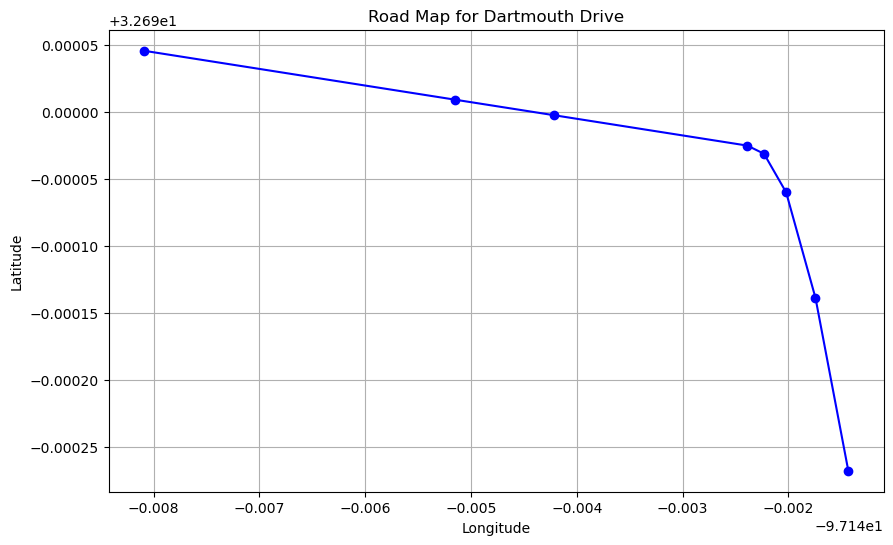

In [ ]:
# plot roads section
import matplotlib.pyplot as plt

road_name = res1[0]
coords = res1[1]
# Extracting latitude and longitude
latitudes, longitudes = zip(*coords)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(longitudes, latitudes, marker='o', color='b', linestyle='-')
plt.title(f'Road Map for {road_name}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [ ]:
road_name = res1[0]
coords = res1[1]

In [ ]:
i = 1
start = coords[i]
end = coords[i + 1]

In [ ]:
print(start, end)

(32.6898611, -97.1417442) (32.68994, -97.1420216)


In [ ]:
interval_km = 0.2
interpolated_points, distance = interpolate_points(start, end, interval_km)  # Set your distance_interval
print(interpolated_points, distance)

0.027402158031744592
1
[(32.6898611, -97.1417442)] 0.027402158031744592


In [ ]:
enumerate(interpolated_points)

In [ ]:
for idx, point in enumerate(interpolated_points):
    lat, lon = point
    # Snap the point to the nearest road
    snapped_lat, snapped_lon = snap_to_road(lat, lon)
    print(snapped_lat, snapped_lon)
    # Calculate orientation for this segment
    if 0 < len(coords) - 2:
        next_point = coords[0 + 2]
    else:
        next_point = end

    orientation = calculate_orientation(lat, lon, *next_point)
    sidewalk_orientation = get_sidewalk_orientation(orientation)

32.68985747507945 -97.1417461389077


In [ ]:
image_index = i
# Download the image
file_name = f"{road_name}_{image_index}"
GetStreetLL(snapped_lat, snapped_lon, sidewalk_orientation, file_name, DownLoc)

['2022-07', 'C3NZJfIskTYCas9z22MI2Q', 'Dartmouth Drive_1.jpg']

In [ ]:
road_name

[(32.689732, -97.141434),
 (32.6898611, -97.1417442),
 (32.68994, -97.1420216),
 (32.6899688, -97.1422306),
 (32.6899749, -97.1423877),
 (32.6899976, -97.1442141),
 (32.6900092, -97.1451495),
 (32.6900458, -97.1480937)]

0.032384750530690946
1
0.032384750530690946
0.027402158031744592
1
0.027402158031744592
0.01981912978630308
1
0.01981912978630308
0.014717408906071745
1
0.014717408906071745


KeyboardInterrupt: 

In [ ]:
import sys
print(sys.version)

3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


In [ ]:
snapped_lat, snapped_lon = snap_to_road(lat, lon)

In [ ]:
            # Calculate orientation for this segment
            if i < len(coords) - 2:
                next_point = coords[i + 2]
            else:
                next_point = end

            orientation = calculate_orientation(lat, lon, *next_point)
            sidewalk_orientation = get_sidewalk_orientation(orientation)

            # Download the image
            file_name = f"{road_name}_{image_index}"
            GetStreetLL(snapped_lat, snapped_lon, sidewalk_orientation, file_name, DownLoc)
            image_index += 1

In [ ]:
# Elapsed time:  1163.7170201857884 minutes for one district: cd_frames[city].loc[0]['geometry']
# Now iterate through ALL district
# loc[1], loc[2], loc[3] belongs to the same district (?) or entire Arlington TX area
# Create a dictionary of roads and coordinates
polygon = cd_frames[city].loc[5]['geometry']
transformed_polygon = transform_shapely_polygon(polygon)
roads_gdf = fetch_roads_in_polygon(transformed_polygon,visualization=True)

In [ ]:
len(roads_gdf)

In [ ]:
import time
import math

#key is a global for use in the functions
key = "&key=" + "???"

# for second district
DownLoc = r"C:\\DataAnalyticsProjects\\UrbanDecay\\ExampleStreetView5"

# start timer
start = time.time()

for roads in roads_gdf.keys():
    coords = roads_gdf[roads]
    snapped_points = []
    # Snap each point to the nearest road
    for lat, lon in coords:
        result = snap_to_road(lat, lon)
        if result:
            snapped_points.append(result)
        else:
            continue
    # Iterate over each pair of consecutive points to determine the sidewalk orientation
    for idx in range(len(snapped_points) - 1):
        lat1, lon1 = snapped_points[idx]
        lat2, lon2 = snapped_points[idx + 1]

        # Calculate orientation
        orientation = calculate_orientation(lat1, lon1, lat2, lon2)
#         sidewalk_orientation = get_sidewalk_orientation(orientation)

        # Download the image
        file_name = f"{roads}_{idx}"
        GetStreetLL(lat1, lon1, orientation, file_name, DownLoc)

# compute emapsed time
elapsed_time = (time.time() - start) / 60
print("Elapsed time: ", elapsed_time, "minutes")

In [ ]:
# read in crime activily map
import os
from PIL import Image
import matplotlib.pyplot as plt

def read_images_from_folder(folder_path):
    files = os.listdir(folder_path)
    image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff'))]

    images = []
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        try:
            image = Image.open(image_path)
            images.append(image)
            print(f"Successfully read {image_path}")
        except Exception as e:
            print(f"Error reading {image_path}: {e}")

    return images

def display_images(images):
    fig = plt.figure(figsize=(10, 10))

    for idx, image in enumerate(images, 1):
        ax = fig.add_subplot(1, len(images), idx)
        ax.imshow(image)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

folder_path = "/Users/yao-chiyu/UrbanDecay/KD Robbery Victims 2019 Final Maps (JPEG)"
images = read_images_from_folder(folder_path)
print(f"Read {len(images)} images from the folder.")

if images:
    display_images(images)


In [ ]:
import cv2
import numpy as np

def label_subbox(sub_box, original_bounding_box, map_image2):
    """
    Check the region specified by the sub_box in map_image2 for specific colors.

    Parameters:
    - sub_box: The specific sub_box as a dictionary with keys 'north', 'south', 'east', and 'west'.
    - original_bounding_box: The original bounding box as a dictionary with keys 'north', 'south', 'east', and 'west'.
    - map_image2: The second map image (as a numpy array).

    Returns:
    - Label (1 or 0) for the specific sub_box.
    """

    # Calculate the pixel per degree for both latitude and longitude
    height, width, _ = map_image2.shape
    lat_pixel_per_degree = height / (original_bounding_box['north'] - original_bounding_box['south'])
    lon_pixel_per_degree = width / (original_bounding_box['east'] - original_bounding_box['west'])

    # Calculate the pixel coordinates of the sub_box within map_image2
    sub_box_pixel_coords = {
        'north': int((original_bounding_box['north'] - sub_box['north']) * lat_pixel_per_degree),
        'south': int((original_bounding_box['north'] - sub_box['south']) * lat_pixel_per_degree),
        'west': int((sub_box['west'] - original_bounding_box['west']) * lon_pixel_per_degree),
        'east': int((sub_box['east'] - original_bounding_box['west']) * lon_pixel_per_degree)
    }

    # Extract the region of interest from map_image2
    roi = map_image2[sub_box_pixel_coords['north']:sub_box_pixel_coords['south'],
                     sub_box_pixel_coords['west']:sub_box_pixel_coords['east']]

    # Define color ranges for green, yellow, and red
    green_lower = np.array([35, 43, 46])
    green_upper = np.array([77, 255, 255])

    yellow_lower = np.array([22, 93, 0])
    yellow_upper = np.array([45, 255, 255])

    red_lower1 = np.array([0, 43, 46])
    red_upper1 = np.array([10, 255, 255])

    red_lower2 = np.array([156, 43, 46])
    red_upper2 = np.array([180, 255, 255])

    # Convert ROI to HSV for better color segmentation
    hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

    # Create masks for each color
    green_mask = cv2.inRange(hsv, green_lower, green_upper)
    yellow_mask = cv2.inRange(hsv, yellow_lower, yellow_upper)
    red_mask1 = cv2.inRange(hsv, red_lower1, red_upper1)
    red_mask2 = cv2.inRange(hsv, red_lower2, red_upper2)
    red_mask = cv2.bitwise_or(red_mask1, red_mask2)

    # Check if any of the colors are present in the ROI
    if np.any(green_mask) or np.any(yellow_mask) or np.any(red_mask):
        return 1
    else:
        return 0

# Example usage:
sub_box = {
    "south": 40.725,
    "north": 40.750,
    "west": -74.005,
    "east": -73.965
}

original_bounding_box = {
    "south": 40.700,
    "north": 40.800,
    "west": -74.020,
    "east": -73.910
}

image_path = "/Users/yao-chiyu/UrbanDecay/KD Robbery Victims 2019 Final Maps (JPEG)"
onlyfiles = [f for f in listdir(image_path) if isfile(join(image_path, f))]

image_path1 = onlyfiles[0]

map_image2 = cv2.imread(image_path1)
label = label_subbox(sub_box, original_bounding_box, map_image2)
print(label)



In [ ]:
image_path1

In [ ]:
from os import listdir
from os.path import isfile, join
image_path = "/Users/yao-chiyu/UrbanDecay/KD Robbery Victims 2019 Final Maps (JPEG)"
onlyfiles = [f for f in listdir(image_path) if isfile(join(image_path, f))]

image_path1 = onlyfiles[0]


# Example usage:
image_path = "/Users/yao-chiyu/UrbanDecay/KD Robbery Victims 2019 Final Maps (JPEG)"
road_coords = extract_roads_from_map_images(sub_boxes, image_path)


for i in range(1,len(onlyfiles)):
    image_path2 = onlyfiles[i]
    output_path = 'overlay_result_' + str(i) + '.jpg'
    display(output_path)
    overlay_images(image_path + '/' + image_path1,
                   image_path + '/' + image_path2,
                   output_path)
    road_coords = extract_roads_from_map_images(sub_boxes, image_path + '/' + image_path1)


In [ ]:
# Overlaying two map images based on corresponding map features (like roads or rivers)

import cv2
import numpy as np

def overlay_images(image_path1, image_path2, output_path):
    # Read the images
    img1 = cv2.imread(image_path1, cv2.IMREAD_COLOR)
    img2 = cv2.imread(image_path2, cv2.IMREAD_COLOR)

    # Convert images to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Detect ORB keypoints and descriptors in both images
    orb = cv2.ORB_create()
    keypoints1, descriptors1 = orb.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(gray2, None)

    # Use the BFMatcher to find the best matches between the descriptors
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(descriptors1, descriptors2)

    # Sort matches based on their distances
    matches = sorted(matches, key=lambda x: x.distance)

    # Use the top matches to estimate the transformation
    # This part may need refinement based on the quality of matches and images
    if len(matches) > 10:
        src_pts = np.float32([keypoints1[m.queryIdx].pt for m in matches[:10]]).reshape(-1, 1, 2)
        dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in matches[:10]]).reshape(-1, 1, 2)

        matrix, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
        display(matrix)
        result = cv2.warpPerspective(img1, matrix, (img2.shape[1], img2.shape[0]))

        # Overlay the images
        result[0:img2.shape[0], 0:img2.shape[1]] = img2

        cv2.imwrite(output_path, result)
    else:
        print("Not enough matches found to overlay images.")

In [ ]:
from os import listdir
from os.path import isfile, join
image_path = "/Users/yao-chiyu/UrbanDecay/KD Robbery Victims 2019 Final Maps (JPEG)"
onlyfiles = [f for f in listdir(image_path) if isfile(join(image_path, f))]

image_path1 = onlyfiles[0]
for i in range(1,len(onlyfiles)):
    image_path2 = onlyfiles[i]
    output_path = 'overlay_result_' + str(i) + '.jpg'
    display(output_path)
    overlay_images(image_path + '/' + image_path1,
                   image_path + '/' + image_path2,
                   output_path)


In [ ]:
onlyfiles

In [ ]:
image_path + '/' + image_path1

In [ ]:
#This code draws images running along a street in Google street view
#Need to submit lat-lon and orientation (can calculate those in a GIS from street centerline files)
#For grabbing sidewalk, found that 40 feet between photos was a good distance to prevent repeats

import urllib, os, json
import urllib.request
import math

#see https://andrewpwheeler.wordpress.com/2015/12/28/using-python-to-grab-google-street-view-imagery/
#key is a global for use in the functions
key = "&key=" + "???"
DownLoc = r'/Users/yao-chiyu/UrbanDecay/ExampleStreetView'

#set the path that you want to download the images into

def MetaParse(MetaUrl):
    response = urllib.request.urlopen(MetaUrl)
    jsonRaw = response.read()
    jsonData = json.loads(jsonRaw)
    #return jsonData
    if jsonData['status'] == "OK":
        if 'date' in jsonData:
            return (jsonData['date'],jsonData['pano_id']) #sometimes it does not have a date!
        else:
            return (None,jsonData['pano_id'])
    else:
        return (None,None)

PrevImage = [] #Global list that has previous images sampled, memoization kindof
def get_street_ll(lat, lon, head, file_name, save_loc):
    base = r"https://maps.googleapis.com/maps/api/streetview"
    size = r"?size=1200x800&fov=60&location="
    end = f"{lat},{lon}&heading={head}&key={'???'}"
    image_url = base + size + end
    file_path = os.path.join(save_loc, file_name + ".jpg")
    urllib.request.urlretrieve(image_url, file_path)


def GetStreetLL(Lat, Lon, Head, File, SaveLoc):
    # Adjust the heading to make the camera face sideways
    SidewaysHead = (Head + 90) % 360  # This will make the view perpendicular

    base = r"https://maps.googleapis.com/maps/api/streetview"
    size = r"?size=1200x800&fov=60&location="
    end = str(Lat) + "," + str(Lon) + "&heading=" + str(SidewaysHead) + key
    MyUrl = base + size + end
    fi = File + ".jpg"
    MetaUrl = base + r"/metadata" + size + end
    met_lis = list(MetaParse(MetaUrl))
    if (met_lis[1], SidewaysHead) not in PrevImage and met_lis[0] is not None:
        urllib.request.urlretrieve(MyUrl, os.path.join(SaveLoc,fi))
        met_lis.append(fi)
        PrevImage.append((met_lis[1],SidewaysHead))
    else:
        met_lis.append(None)
    return met_lis


#Make an example list of tuples of lat,lon's and orientation
#Pointed toward the sidewalk - plus or minus 90 degrees to face forward/backward on street


#DataList = [(40.7036043470179800,-74.0143908501053400,97.00),
#            (40.7037139540670900,-74.0143727485309500,97.00),
#            (40.7038235569946140,-74.0143546472568100,97.00),
#            (40.7039329592712600,-74.0143365794219800,97.00),
#            (40.7040422704154500,-74.0143185262956300,97.00),
#            (40.7041517813782500,-74.0143004403322000,97.00),
#            (40.7042611636045350,-74.0142823755611700,97.00),
#            (40.7043707615693800,-74.0142642750708300,97.00)]

DataList = [(32.744331, -97.138940,97.00),
            (32.744362, -97.138525,97.00),
            (32.744393, -97.137860,97.00)
            ]
data_list = [
    (32.744331, -97.138940),
    (32.744362, -97.138525),
    (32.744393, -97.137860)
]

data_list = [
    (32.739539, -97.145050),
    (32.739569, -97.144550),
    (32.739599, -97.144050)
]

# Snap each point to the nearest road
snapped_points = [snap_to_road(lat, lon) for lat, lon in data_list]

# Iterate over each pair of consecutive points to determine the sidewalk orientation
for idx in range(len(snapped_points) - 1):
    lat1, lon1 = snapped_points[idx]
    lat2, lon2 = snapped_points[idx + 1]

    orientation = calculate_orientation(lat1, lon1, lat2, lon2)
    sidewalk_orientation = get_sidewalk_orientation(orientation)

    file_name = f"Image_{idx + 1}"
    get_street_ll(lat1, lon1, sidewalk_orientation, file_name, DownLoc)

# Get image for the last point
lat_last, lon_last = snapped_points[-1]
# For the last image, we can use the orientation of the last segment
file_name_last = f"Image_{len(snapped_points)}"
get_street_ll(lat_last, lon_last, sidewalk_orientation, file_name_last, DownLoc)

#image_list = [] #to stuff the resulting meta-data for images
#ct = 0
#for i in DataList:
#    ct += 1
#    fi = "Image_" + str(ct)
#    print(fi)
#    temp = GetStreetLL(Lat=i[0],Lon=i[1],Head=i[2],File=fi,SaveLoc=DownLoc)
#    print(temp)
#    if temp[2] is not None:
#       image_list.append(temp)
#print(image_list)

#If you want to see what example images might look like
#See https://photos.app.goo.gl/ip9qPZJ0DZMnERus2

In [ ]:
Tests = ["917 South Second Ave, Stephenville, Texas 76401",
         "1520 West Philadelphia, Detroit, Michigan 48206",
         "2292 Grand, Detroit, Michigan 48238",
         "15414 Wabash Street, Detroit, Michigan 48238",
         "15867 Log Cabin, Detroit, Michigan 48238",
         "3317 Cody Street, Detroit, Michigan 48212",
         "14214 Arlington Street, Detroit, Michigan 48212"]

for i in Tests:
  GetStreet(Add=i,SaveLoc=myloc)

In [ ]:
#Code to scrape Google places data
#All you need is a
#1 - lat/lon bounding box
#2 - a place type you are interested in
#3 - an API key

import math, pyproj, urllib, json, time

#function to figure out UTM zone based on lat/lon
#see https://gis.stackexchange.com/a/13292/751
def coord_to_UTM(Lat,LongTemp):
    ZoneNumber = math.floor((LongTemp + 180)/6.0) + 1
    if ( Lat >= 56.0 and Lat < 64.0 and LongTemp >= 3.0 and LongTemp < 12.0 ):
        ZoneNumber = 32
    #Special zones for Svalbard
    if ( Lat >= 72.0 and Lat < 84.0 ):
        if  ( LongTemp >= 0.0 and LongTemp <  9.0 ):
            ZoneNumber = 31
        elif ( LongTemp >= 9.0 and LongTemp < 21.0):
            ZoneNumber = 33
        elif (LongTemp >= 21.0 and LongTemp < 33.0 ):
            ZoneNumber = 35
        elif (LongTemp >= 33.0 and LongTemp < 42.0 ):
            ZoneNumber = 37
    return int(ZoneNumber)

#lat,lon = 32.749914, -96.833551
#print coord_to_UTM(32.749914, -96.833551 - 7)

#Function to create grid given ll [lower left]
#and ur [upper right], each should be lat/lon format
#steps are in meters, and start from lower left,
#so will spill over upper right
def build_grid(ll,ur,meters):
  #convert to a local projection based on lat/lon of middle
  mid_lat = (ll[0] + ur[0])/2.0
  mid_lon = (ll[1] + ur[1])/2.0
  utmz = coord_to_UTM(mid_lat,mid_lon)
  #do not think north/south equator matters
  p1 = pyproj.Proj(proj='latlong',datum='WGS84')
  p2 = pyproj.Proj(proj="utm",zone=utmz,datum='WGS84')
  # old:
  #lx,ly = pyproj.transform(p1, p2, ll[1], ll[0])
  #ux,uy = pyproj.transform(p1, p2, ur[1], ur[0])
  transformer = pyproj.Transformer.from_proj(p1, p2)
  lx,ly = transformer.transform(ll[1], ll[0])
  ux,uy = transformer.transform(ur[1], ur[0])

  #now with projected coordinates in meters can generate grid
  difx = ux - lx
  dify = uy - ly
  nx = int( math.ceil( difx/meters ) )
  ny = int( math.ceil( dify/meters ) )
  grid_latlon = []
  for i in range(nx+1):
      for j in range(ny+1):
          tx = lx + i*meters
          ty = ly + j*meters
          tlon, tlat = transformer.transform(tx, ty, direction='INVERSE')
          grid_latlon.append( (tlat,tlon) )
  return grid_latlon

#ll = [32.749914, -96.833551]
#ur = [32.819148, -96.746914]
#res = build_grid(ll,ur,1000)
#print res

#Function to scrape google data
#if you want more than one type, it should be a comman separated string
#see supported types, https://developers.google.com/places/web-service/supported_types

def GoogPlac(lat,lng,radius,type,key):
  #making the url
  AUTH_KEY = key
  LOCATION = str(lat) + "," + str(lng)
  RADIUS = radius
  TYPE = type
  MyUrl = ('https://maps.googleapis.com/maps/api/place/nearbysearch/json'
           '?location=%s'
           '&radius=%s'
           '&types=%s'
           '&sensor=false&key=%s') % (LOCATION, RADIUS, TYPE, AUTH_KEY)
  #grabbing the JSON result
  response = urllib.request.urlopen(MyUrl)
  jsonRaw = response.read()
  jsonData = json.loads(jsonRaw)
  return jsonData

#can make grid finer to make sure you are not missing any

#This is a helper to grab the Json data that I want in a list
def IterJson(place):
  x = ( place['name'], place['reference'], place['geometry']['location']['lat'],
         place['geometry']['location']['lng'], place['vicinity'] )
  return x
#Might want to add in open/close times
#Pretty sure can use PlaceID to look back up other info


#So now we have all we need to loop over google results

MyKey = "???" #you need to replace this with a string of your own Maps API key
MyType = 'atm'
ll = [32.615782, -97.013317] #covering Dallas
ur = [33.025225, -96.539880] #if you want to be more efficient, do point in poly
meters = 3000
#this is to figure out the necessary radius for the circles
#to slightly overlap in my grid search
overlap = ( math.sqrt( 2.0 * math.pow(meters,2)  ) / 2 ) * 1.05
print(overlap)

#1 generate grid

res_grid = build_grid(ll,ur,meters)
print(len(res_grid))

#2 loop over grid and stuff results in a vector

atms = []
place_ids = []
for i in res_grid:
    search = GoogPlac(lat=i[0],lng=i[1],radius=overlap,type=MyType,key=MyKey)
    if search['status'] == 'OK':
        for place in search['results']:
            x = IterJson(place)
            #only append places that are not duplicates
            if x[1] not in place_ids:
                atms.append(x)
                place_ids.append(x[1])
    #time.sleep(3) #delay in seconds so dont spam servers

#atms

#3 save results to csv file

import csv, os

save_loc = r'/Users/yao-chiyu/UrbanDecay/ExampleStreetView'
field_names = ('Name','PlaceID','Lat','Lon','Address')

csv_loc = os.path.join(save_loc,'Atms_Dallas.csv')
with open(csv_loc, 'w') as af:
    writer = csv.writer(af)
    writer.writerow(field_names)
    for line in atms:
        print(line)
        writer.writerow(line)

In [ ]:
field_names

In [ ]:
def MetaParse(MetaUrl):
    response = urllib.urlopen(MetaUrl)
    jsonRaw = response.read()
    jsonData = json.loads(jsonRaw)
    #return jsonData
    if jsonData['status'] == "OK":
        if 'date' in jsonData:
            return (jsonData['date'],jsonData['pano_id']) #sometimes it does not have a date!
        else:
            return (None,jsonData['pano_id'])
    else:
        return (None,None)

PrevImage = [] #Global list that has previous images sampled, memoization kindof

def GetStreetLL(Lat,Lon,Head,File,SaveLoc):
    base = r"https://maps.googleapis.com/maps/api/streetview"
    size = r"?size=1200x800&fov=60&location="
    end = str(Lat) + "," + str(Lon) + "&heading=" + str(Head) + key
    MyUrl = base + size + end
    fi = File + ".jpg"
    MetaUrl = base + r"/metadata" + size + end
    #print MyUrl, MetaUrl #can check out image in browser to adjust size, fov to needs
    met_lis = list(MetaParse(MetaUrl))                           #does not grab image if no date
    if (met_lis[1],Head) not in PrevImage and met_lis[0] is not None:   #PrevImage is global list
        urllib.urlretrieve(MyUrl, os.path.join(SaveLoc,fi))
        met_lis.append(fi)
        PrevImage.append((met_lis[1],Head)) #append new Pano ID to list of images
    else:
        met_lis.append(None)
    return met_lis